#### Controlling the width of cells of notebook

In [2]:
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

In [6]:
import warnings
warnings.filterwarnings('ignore')

#### Loading important libraries.....

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Setting options to display maximum number of rows and columns of a DataFrame

In [8]:
pd.set_option('display.max_columns', None)

In [9]:
pd.set_option('display.max_rows', 500)

#### Loading Training and Test data......

In [10]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

## EXPLORATORY DATA ANALYSIS

### We will first observe different features and target variable in the training data and their datatypes

In [4]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
train_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [7]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [14]:
train_df.shape

(1460, 81)

In [15]:
test_df.shape

(1459, 80)

In [87]:
len(train_df)

1460

### Lets's find out the missing values in our training data

In [11]:
def missing_data(train_df):
    total = train_df.isnull().sum().sort_values(ascending=False)
    total = total[total != 0]

    percent = round(total / len(train_df)*100, 2)
    percent = percent[percent !=0]

    df = pd.concat([total, percent], axis=1, keys=['TOTAL', 'PERCENT'])
    return df

In [89]:
missing_data(train_df)

TOTAL  PERCENT
PoolQC         1453    99.52
MiscFeature    1406    96.30
Alley          1369    93.77
Fence          1179    80.75
FireplaceQu     690    47.26
LotFrontage     259    17.74
GarageCond       81     5.55
GarageType       81     5.55
GarageYrBlt      81     5.55
GarageFinish     81     5.55
GarageQual       81     5.55
BsmtExposure     38     2.60
BsmtFinType2     38     2.60
BsmtFinType1     37     2.53
BsmtCond         37     2.53
BsmtQual         37     2.53
MasVnrArea        8     0.55
MasVnrType        8     0.55
Electrical        1     0.07

#### Plotting the missing data

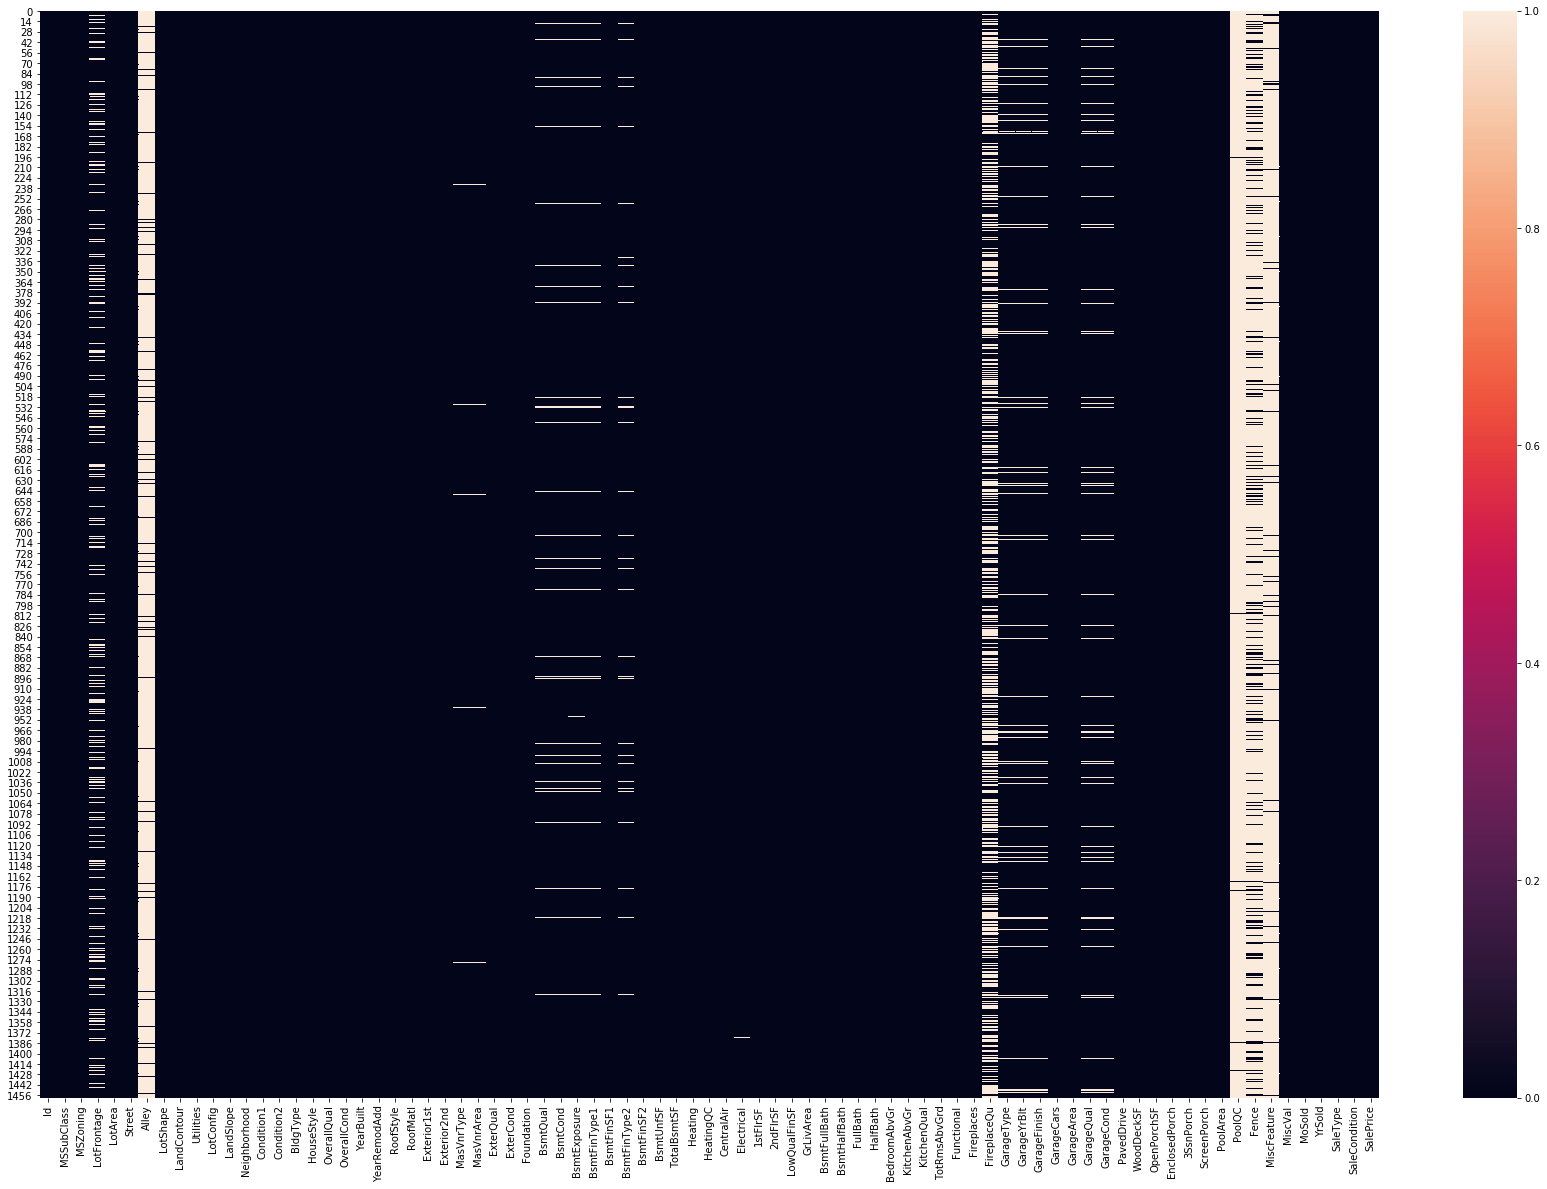

In [94]:
plt.subplots(figsize=(30,20))
sns.heatmap(train_df.isnull())

We create a concatenated dataframe(train+test) for feature engineering

In [19]:
concat_df = pd.concat([train_df, test_df])
concat_df.shape

(2919, 81)

#### Separating Numerical and Categorical features from training data

In [31]:
train_num = train_df.select_dtypes(include=['int', 'float'])
train_cat = train_df.select_dtypes(include=['object'])
print("train_num.shape :",train_num.shape)
print("train_cat.shape :",train_cat.shape)

train_num.shape : (1460, 38)
train_cat.shape : (1460, 43)


In [32]:
train_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
MasVnrArea       1452 non-null float64
BsmtFinSF1       1460 non-null int64
BsmtFinSF2       1460 non-null int64
BsmtUnfSF        1460 non-null int64
TotalBsmtSF      1460 non-null int64
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
LowQualFinSF     1460 non-null int64
GrLivArea        1460 non-null int64
BsmtFullBath     1460 non-null int64
BsmtHalfBath     1460 non-null int64
FullBath         1460 non-null int64
HalfBath         1460 non-null int64
BedroomAbvGr     1460 non-null int64
KitchenAbvGr     1460 non-null int64
TotRmsAbvGrd     1460 non-null int64
F

#### Plotting correlation matrix for numerical features

In [ ]:
plt.subplots(figsize=(30,30))
mask = np.zeros_like(train_num.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(train_num.corr(), annot=True, mask=mask, center=0)
plt.savefig('train_num_corr.png')

#### MSSubClass has data type as integer but it is a nominal feature and we must change its type to object

In [62]:
train_df['MSSubClass'].unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
       180,  40])

In [119]:
concat_df['MSSubClass'] = concat_df['MSSubClass'].astype('str')

#### OverallCond and OverallQual are ordinal variables. Displaying their unique values - 

In [68]:
for i in ['OverallCond','OverallQual']:
    print(i + " -> "+str(train_df[i].unique()))

OverallCond -> [5 8 6 7 4 2 3 9 1]
OverallQual -> [ 7  6  8  5  9  4 10  3  1  2]


In [75]:
train_num = train_num.drop(['Id'], axis=1)

#### Let's see the correlation of SalesPrice with the numerical features -

In [81]:
train_num.corr()['SalePrice'].abs().sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
KitchenAbvGr     0.135907
EnclosedPorch    0.128578
ScreenPorch      0.111447
PoolArea         0.092404
MSSubClass       0.084284
OverallCond      0.077856
MoSold           0.046432
3SsnPorch        0.044584
YrSold           0.028923
LowQualFinSF     0.025606
MiscVal          0.021190
BsmtHalfBath     0.016844
BsmtFinSF2       0.011378
Name: SalePrice, dtype: float64

In [84]:
Top10_correlated_numerical_features = list(train_num.corr()['SalePrice'].abs().sort_values(ascending=False)[:10].index)
print(Top10_correlated_numerical_features)

['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']


#### We will visualize the plot of SalePrice vs Top10 correlated features

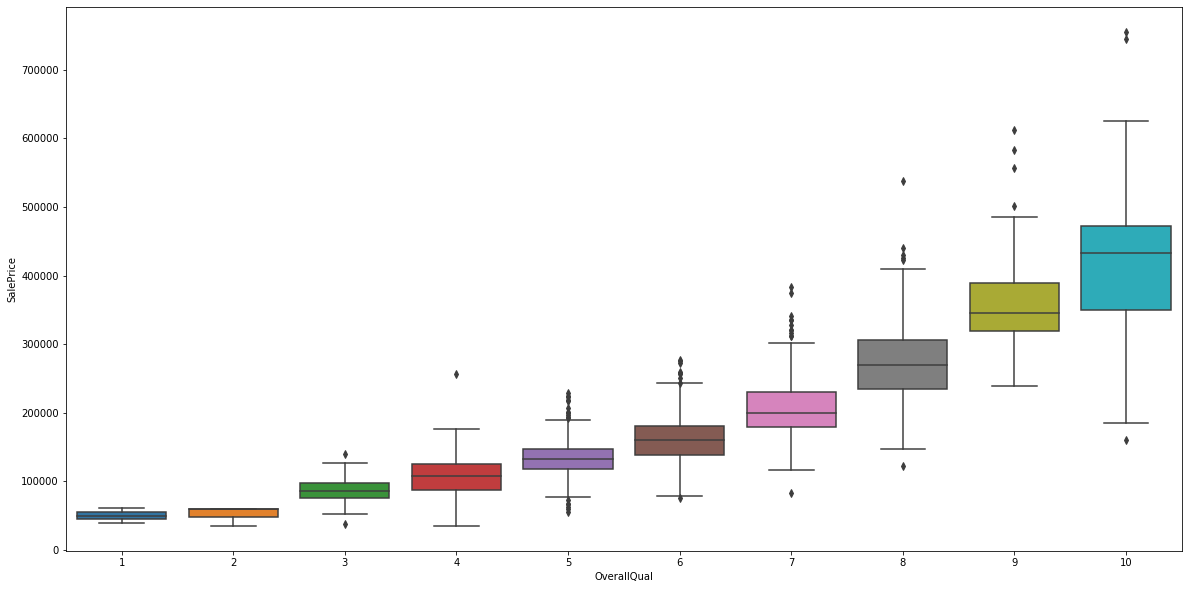

In [96]:
plt.subplots(figsize=(20,10))
sns.boxplot(x='OverallQual', y='SalePrice', data=train_num)

#### SalePrice vs GrLivArea

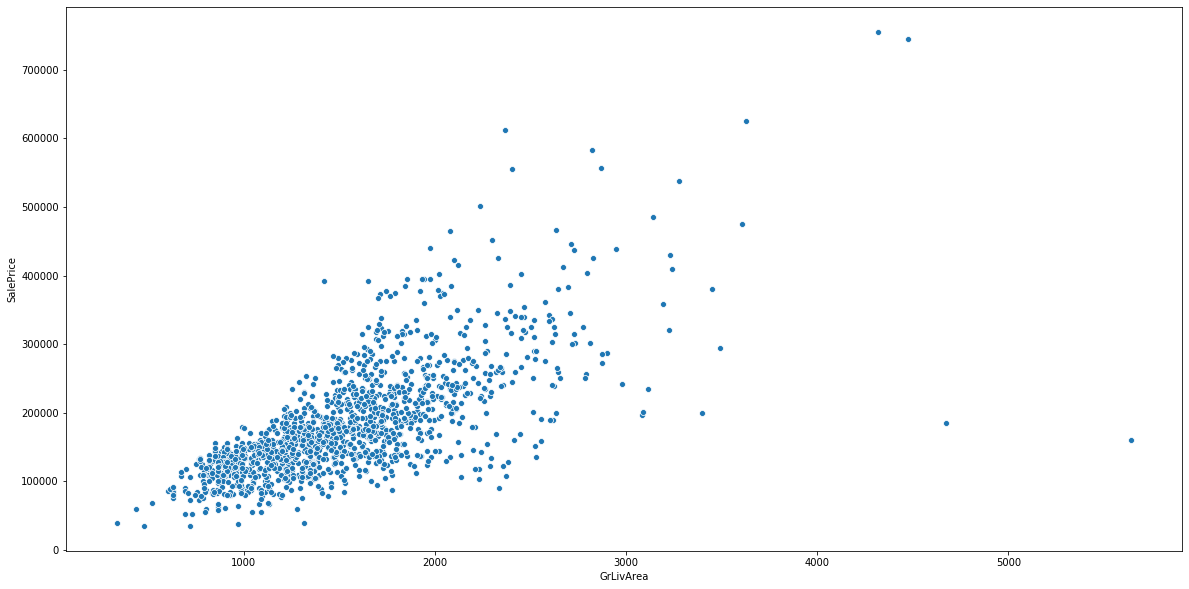

In [98]:
plt.subplots(figsize=(20,10))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train_num)

#### We can spot there are two outliers where GrLivArea > 4500 but price is very less.

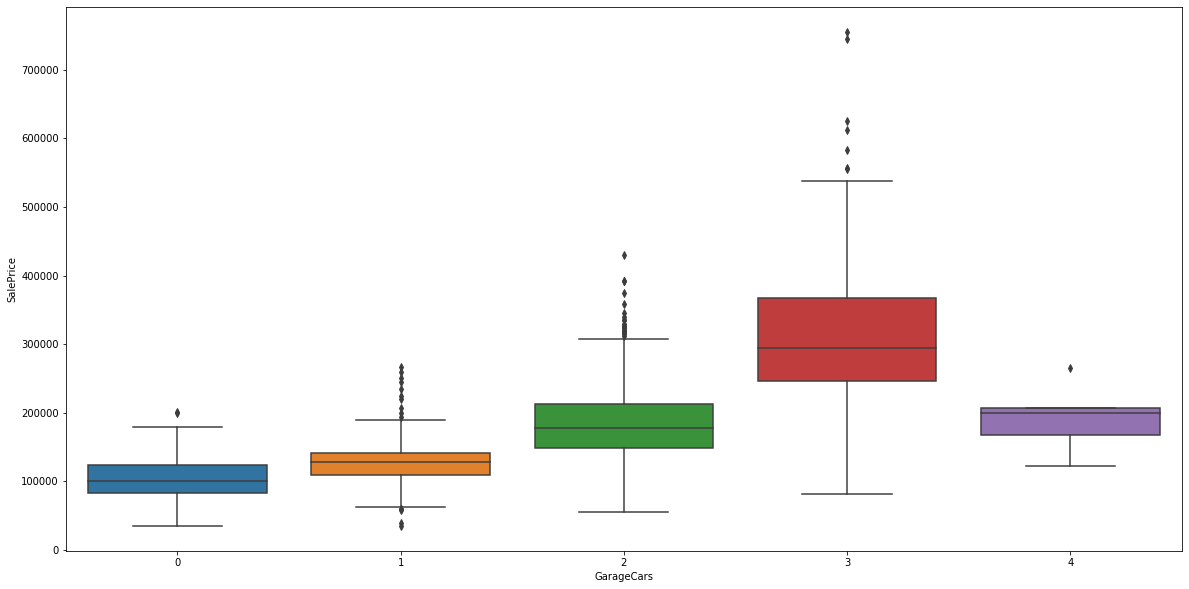

In [102]:
plt.subplots(figsize=(20,10))
sns.boxplot(x='GarageCars', y='SalePrice', data=train_num)

#### We observe an increasing trend between No. of Garage Cars capacity and SalePrice but there are five houses with GarageCars capacity 5 but lower SalesPrice

In [103]:
train_num[train_num.GarageCars == 4]

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
420           90         78.0     7060            7            5       1997   
747           70         65.0    11700            7            7       1880   
1190         190          NaN    32463            4            4       1961   
1340          20         70.0     8294            4            5       1971   
1350          90         91.0    11643            5            5       1969   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  WoodDeckSF  \
420           1998       200.0        1309           0  ...           0   
747           2003         0.0           0           0  ...         181   
1190          1975       149.0        1159           0  ...         439   
1340          1971         0.0           0           0  ...           0   
1350          1969       368.0         500           0  ...           0   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
420             0              0          0            0         0        0   
747             0            386          0            0         0        0   
1190            0              0          0            0         0        0   
1340            0              0          0            0         0        0   
1350            0              0          0            0         0        0   

      MoSold  YrSold  SalePrice  
420       11    2008     206300  
747        5    2009     265979  
1190       3    2007     168000  
1340       6    2007     123000  
1350       8    2009     200000  

[5 rows x 37 columns]

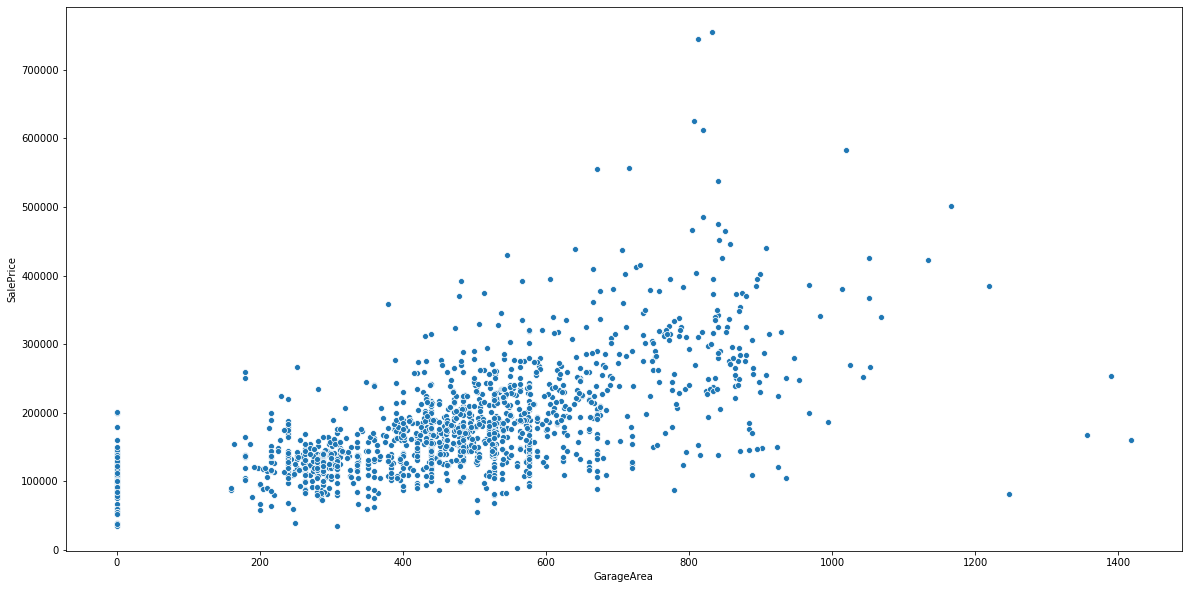

In [105]:
plt.subplots(figsize=(20,10))
sns.scatterplot(x='GarageArea', y='SalePrice', data=train_num)

In [ ]:
plt.subplots(figsize=(20,10))
sns.scatterplot(x='GarageArea', y='SalePrice', data=train_num)

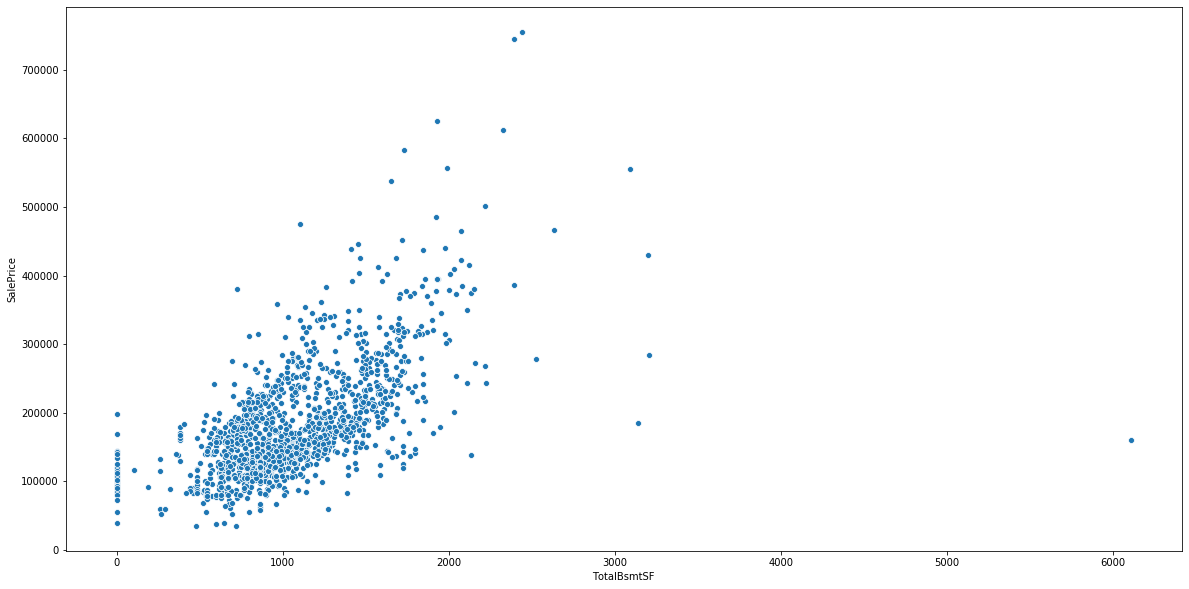

In [106]:
plt.subplots(figsize=(20,10))
sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=train_num)


####  We can observe an increasing trend between SalePrice and Total Basement Surface Area. There is an one instance where TotalBsmtSF > 6000 but SalePrice is very less

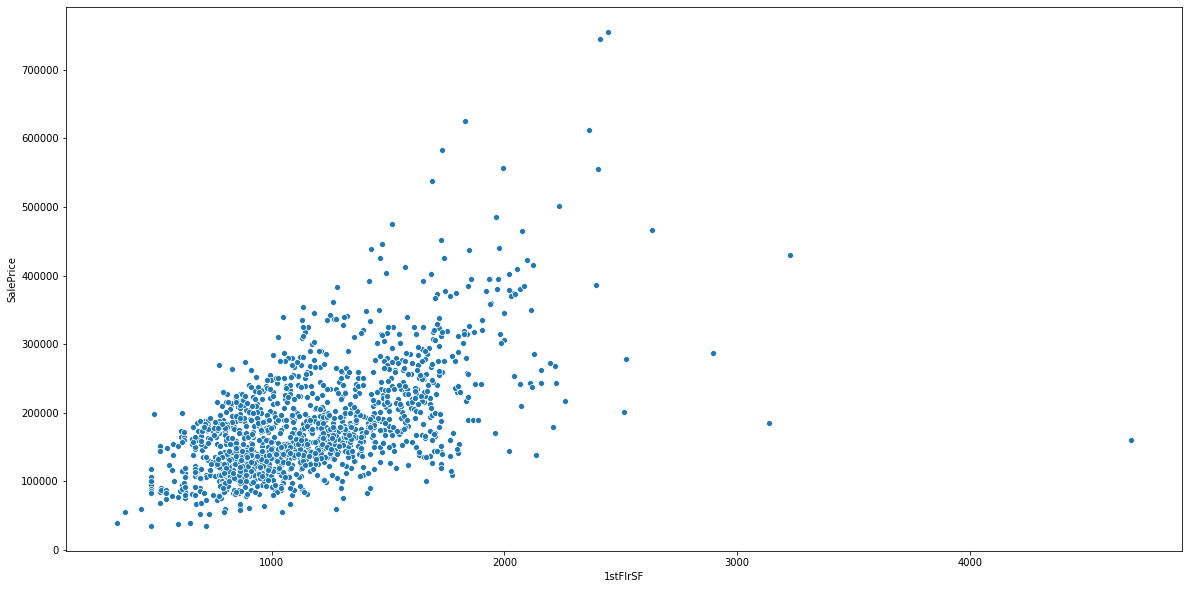

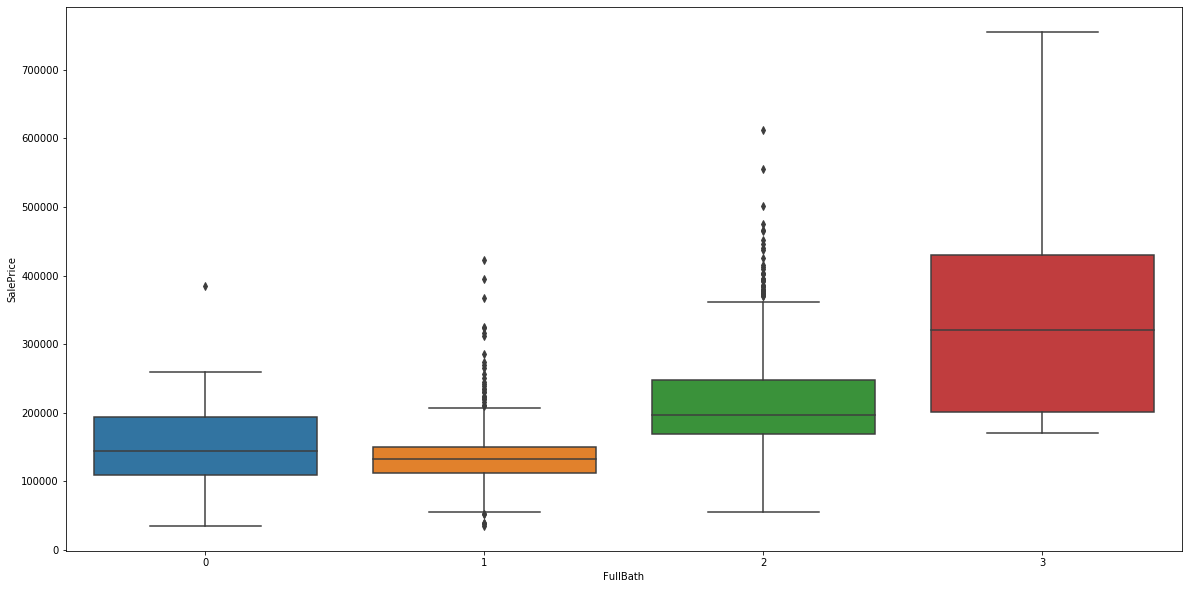

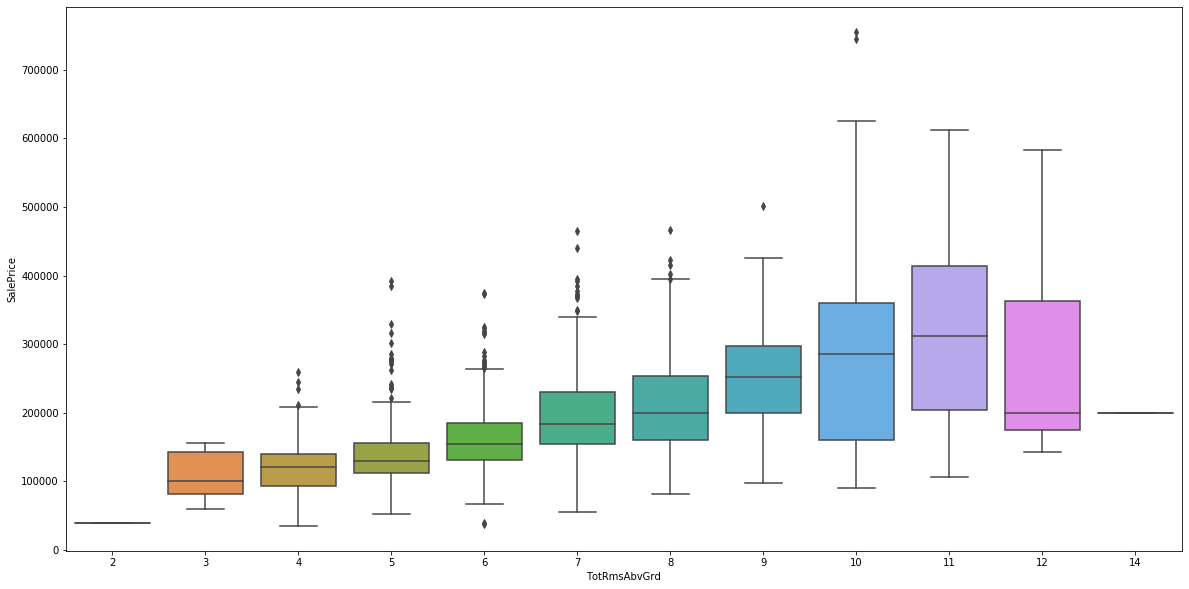

In [109]:
#for i in ['1stFlrSF', 'FullBath', 'TotRmsAbvGrd']:
plt.subplots(figsize=(20,10))
sns.scatterplot(x='1stFlrSF', y='SalePrice', data=train_num)
plt.subplots(figsize=(20,10))
sns.boxplot(x='FullBath', y='SalePrice', data=train_num)
plt.subplots(figsize=(20,10))
sns.boxplot(x='TotRmsAbvGrd', y='SalePrice', data=train_num)


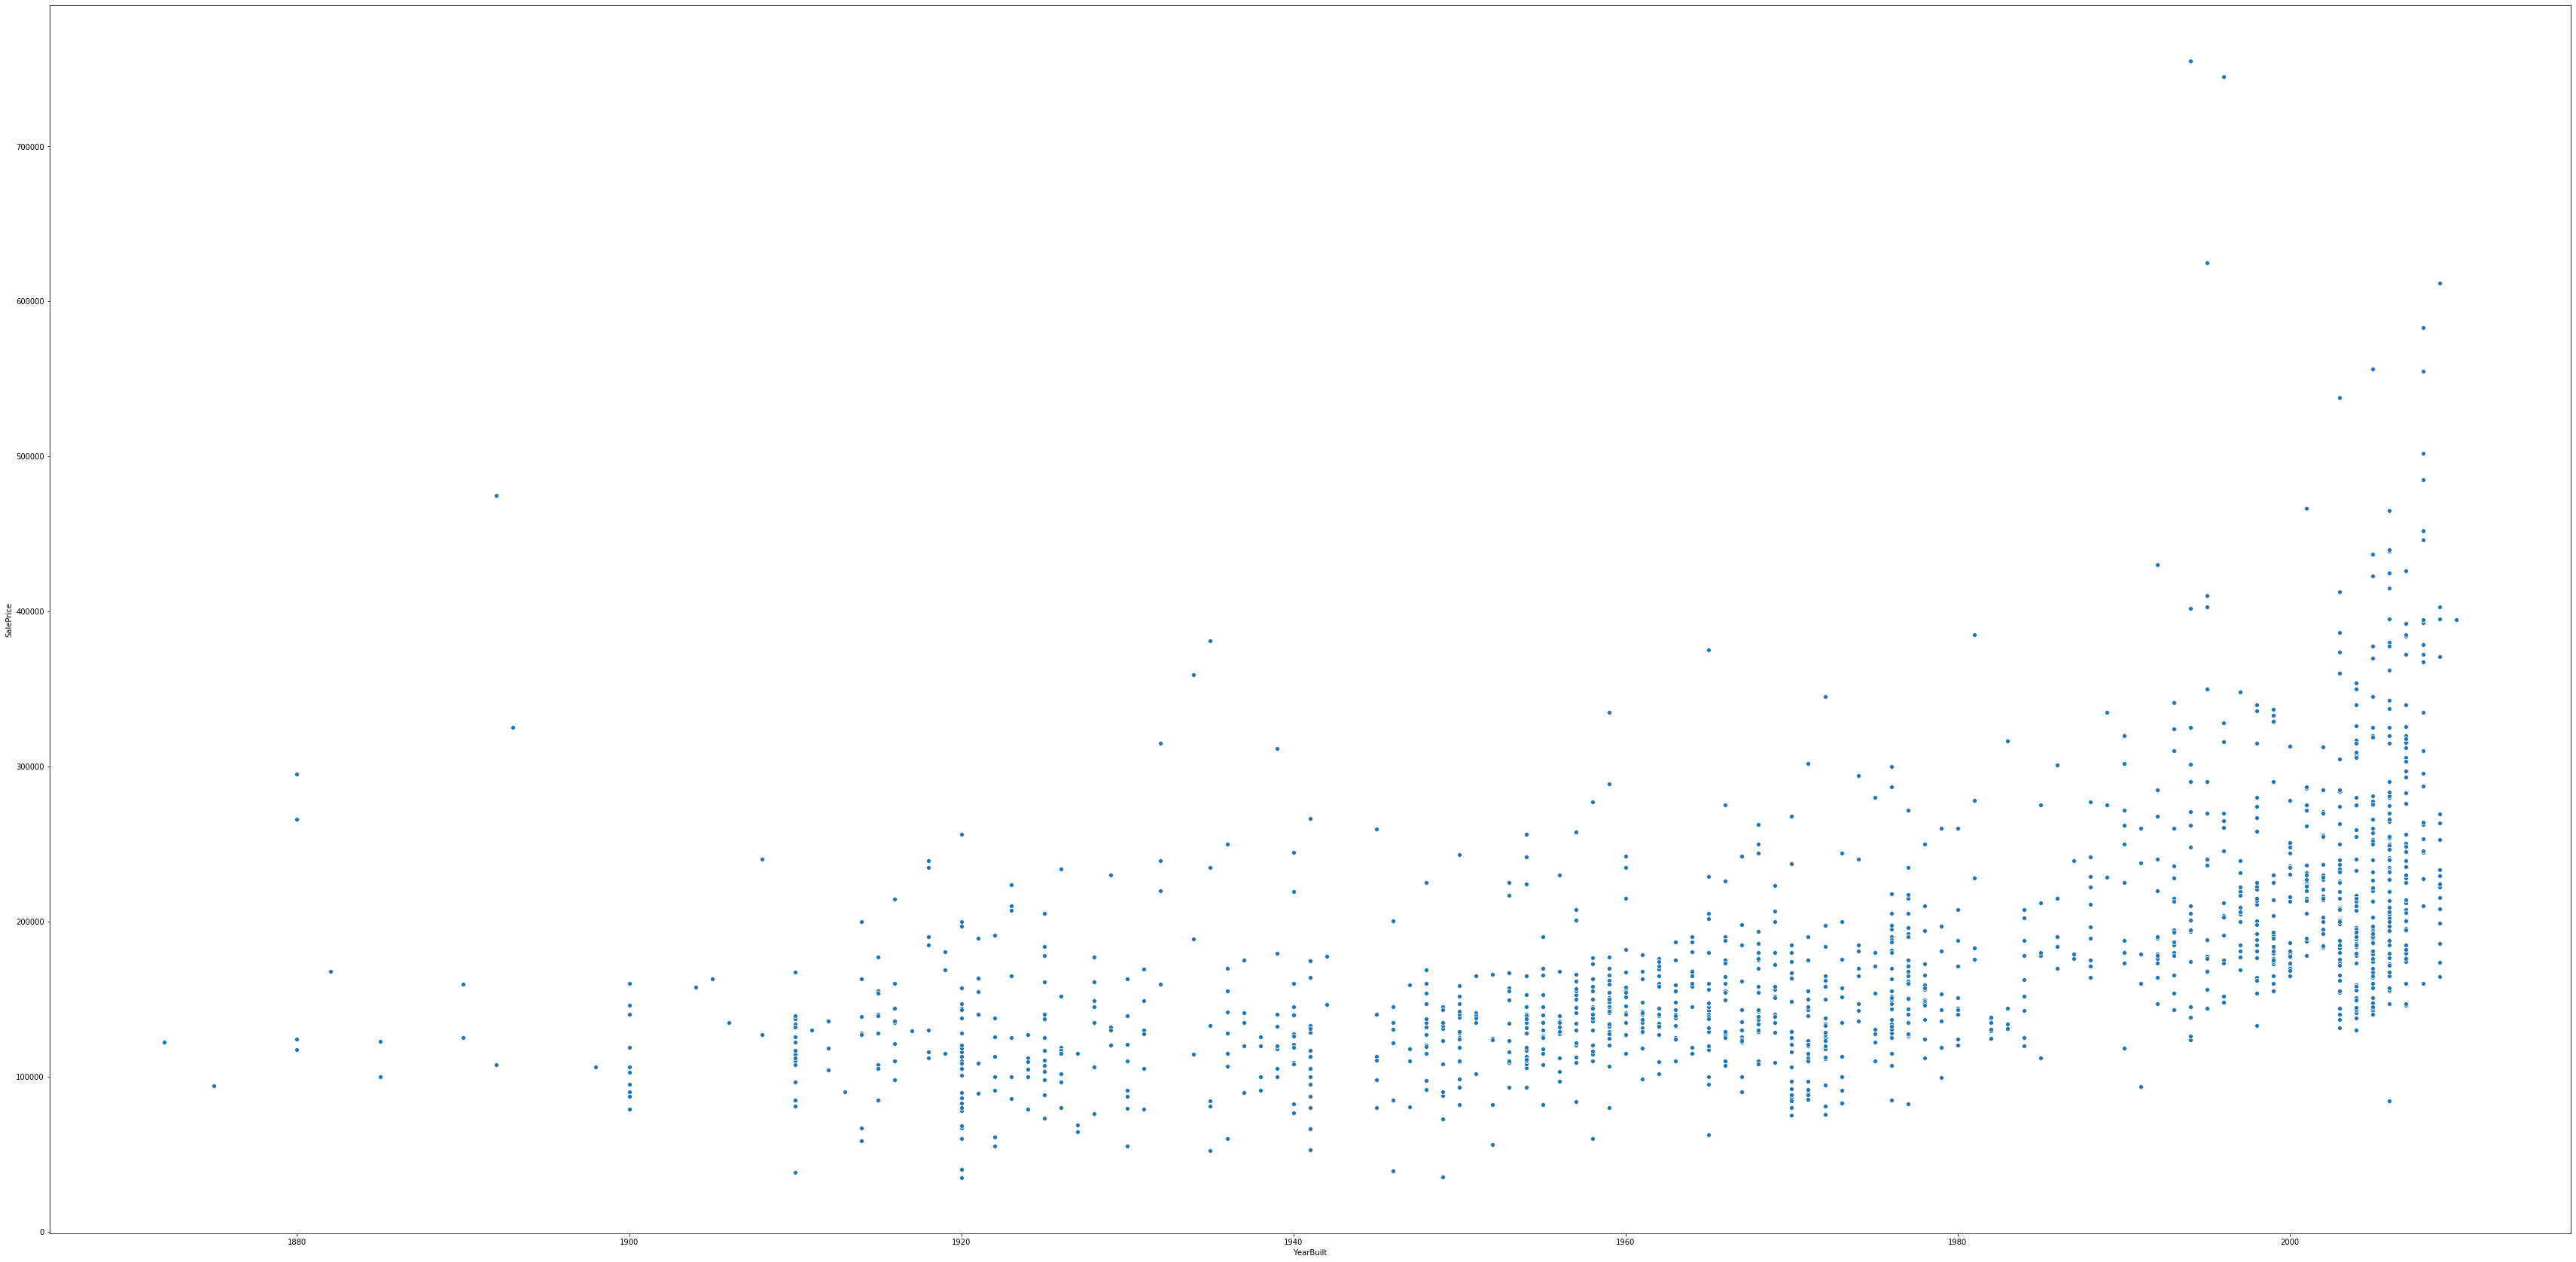

In [116]:
plt.subplots(figsize=(60,30))
sns.scatterplot(x='YearBuilt', y='SalePrice', data=train_num)

#### YearBuilt, YearRemodAdd, GarageYrBlt, MoSold, YrSold should be considered as categorical features since numerical strength of year don't contribute to the SalePrice. We will convert it later when we will use them to create new features

### Plotting the Target Variable

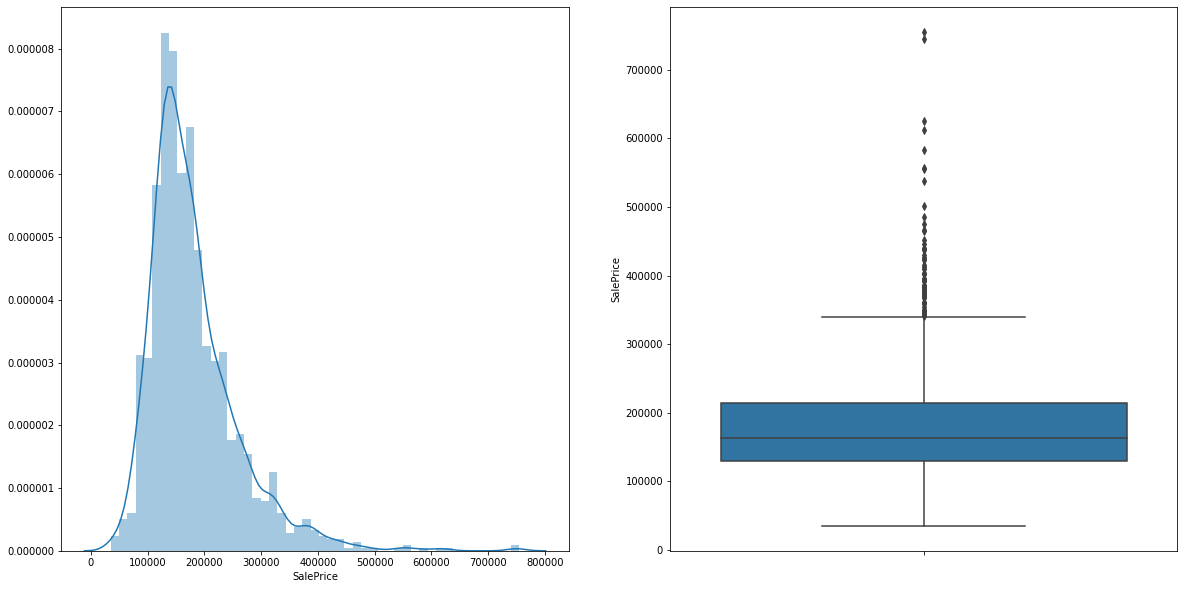

In [609]:
fig, axs = plt.subplots(1, 2, figsize=(20,10))
sns.distplot(train_df['SalePrice'], ax = axs[0])
sns.boxplot(train_df['SalePrice'], orient='v', ax=axs[1])

#### Clearly the SalePrice is rightly skewed.

# MISSING DATA IMPUTATION

#### Observing missing data in training and test dataset

In [282]:
missing_data(train_df)

TOTAL  PERCENT
PoolQC         1453    99.52
MiscFeature    1406    96.30
Alley          1369    93.77
Fence          1179    80.75
FireplaceQu     690    47.26
LotFrontage     259    17.74
GarageCond       81     5.55
GarageType       81     5.55
GarageYrBlt      81     5.55
GarageFinish     81     5.55
GarageQual       81     5.55
BsmtExposure     38     2.60
BsmtFinType2     38     2.60
BsmtFinType1     37     2.53
BsmtCond         37     2.53
BsmtQual         37     2.53
MasVnrArea        8     0.55
MasVnrType        8     0.55
Electrical        1     0.07

In [118]:
missing_data(test_df)

TOTAL  PERCENT
PoolQC         1456    99.79
MiscFeature    1408    96.50
Alley          1352    92.67
Fence          1169    80.12
FireplaceQu     730    50.03
LotFrontage     227    15.56
GarageCond       78     5.35
GarageQual       78     5.35
GarageYrBlt      78     5.35
GarageFinish     78     5.35
GarageType       76     5.21
BsmtCond         45     3.08
BsmtQual         44     3.02
BsmtExposure     44     3.02
BsmtFinType1     42     2.88
BsmtFinType2     42     2.88
MasVnrType       16     1.10
MasVnrArea       15     1.03
MSZoning          4     0.27
BsmtHalfBath      2     0.14
Utilities         2     0.14
Functional        2     0.14
BsmtFullBath      2     0.14
BsmtFinSF2        1     0.07
BsmtFinSF1        1     0.07
Exterior2nd       1     0.07
BsmtUnfSF         1     0.07
TotalBsmtSF       1     0.07
SaleType          1     0.07
Exterior1st       1     0.07
KitchenQual       1     0.07
GarageArea        1     0.07
GarageCars        1     0.07

#### Segregating the variables into numerical and categorical with further division into whether they can be replaced by 'NA' or  some other possible value. Garage and Basement variables are also handled separately.

In [453]:
concat_df2 = pd.concat([train_df, test_df], ignore_index=True)

In [454]:
fill_NA_cat_vars = ['PoolQC', 'Fence', 'MiscFeature', 'Alley',  'MasVnrType', 'FireplaceQu']
fill_cat_vars = ['Electrical', 'MSZoning', 'Functional', 'Exterior1st', 'Exterior2nd', 'SaleType', 'Utilities', 'KitchenQual']
fill_num_vars = ['MasVnrArea', 'LotFrontage']

garage_cat_vars = ['GarageFinish', 'GarageType', 'GarageCond', 'GarageQual']
garage_num_vars = [ 'GarageArea', 'GarageCars', 'GarageYrBlt']

Bsmt_cat_vars = ['BsmtQual', 'BsmtCond', 'BsmtExposure','BsmtFinType1', 'BsmtFinType2']
Bsmt_num_cars = ['BsmtHalfBath', 'BsmtFullBath', 'TotalBsmtSF', 'BsmtUnfSF', 'BsmtFinSF2', 'BsmtFinSF1']

#### PoolQC

In [458]:
concat_df2[concat_df2.PoolQC.isnull() & concat_df2.PoolArea!=0]

Empty DataFrame
Columns: [1stFlrSF, 2ndFlrSF, 3SsnPorch, Alley, BedroomAbvGr, BldgType, BsmtCond, BsmtExposure, BsmtFinSF1, BsmtFinSF2, BsmtFinType1, BsmtFinType2, BsmtFullBath, BsmtHalfBath, BsmtQual, BsmtUnfSF, CentralAir, Condition1, Condition2, Electrical, EnclosedPorch, ExterCond, ExterQual, Exterior1st, Exterior2nd, Fence, FireplaceQu, Fireplaces, Foundation, FullBath, Functional, GarageArea, GarageCars, GarageCond, GarageFinish, GarageQual, GarageType, GarageYrBlt, GrLivArea, HalfBath, Heating, HeatingQC, HouseStyle, Id, KitchenAbvGr, KitchenQual, LandContour, LandSlope, LotArea, LotConfig, LotFrontage, LotShape, LowQualFinSF, MSSubClass, MSZoning, MasVnrArea, MasVnrType, MiscFeature, MiscVal, MoSold, Neighborhood, OpenPorchSF, OverallCond, OverallQual, PavedDrive, PoolArea, PoolQC, RoofMatl, RoofStyle, SaleCondition, SalePrice, SaleType, ScreenPorch, Street, TotRmsAbvGrd, TotalBsmtSF, Utilities, WoodDeckSF, YearBuilt, YearRemodAdd, YrSold]
Index: []

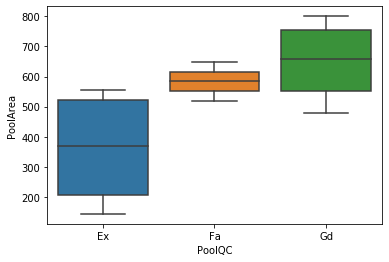

In [288]:
sns.boxplot(x='PoolQC', y='PoolArea', data=concat_df2)

PoolArea of 561 is highly likely to belong to Fa PoolQC

In [457]:
concat_df2.loc[concat_df2.PoolQC.isnull() & concat_df2.PoolArea!=0, 'PoolQC'] = 'Fa'

In [459]:
concat_df2['PoolQC'] = concat_df2['PoolQC'].fillna('NA')

#### Fence

In [460]:
concat_df2['Fence'] = concat_df2['Fence'].fillna('NA')

#### MiscFeature

In [461]:
concat_df2[concat_df2.MiscFeature.isnull() & concat_df2.MiscVal!=0]

Empty DataFrame
Columns: [1stFlrSF, 2ndFlrSF, 3SsnPorch, Alley, BedroomAbvGr, BldgType, BsmtCond, BsmtExposure, BsmtFinSF1, BsmtFinSF2, BsmtFinType1, BsmtFinType2, BsmtFullBath, BsmtHalfBath, BsmtQual, BsmtUnfSF, CentralAir, Condition1, Condition2, Electrical, EnclosedPorch, ExterCond, ExterQual, Exterior1st, Exterior2nd, Fence, FireplaceQu, Fireplaces, Foundation, FullBath, Functional, GarageArea, GarageCars, GarageCond, GarageFinish, GarageQual, GarageType, GarageYrBlt, GrLivArea, HalfBath, Heating, HeatingQC, HouseStyle, Id, KitchenAbvGr, KitchenQual, LandContour, LandSlope, LotArea, LotConfig, LotFrontage, LotShape, LowQualFinSF, MSSubClass, MSZoning, MasVnrArea, MasVnrType, MiscFeature, MiscVal, MoSold, Neighborhood, OpenPorchSF, OverallCond, OverallQual, PavedDrive, PoolArea, PoolQC, RoofMatl, RoofStyle, SaleCondition, SalePrice, SaleType, ScreenPorch, Street, TotRmsAbvGrd, TotalBsmtSF, Utilities, WoodDeckSF, YearBuilt, YearRemodAdd, YrSold]
Index: []

In [462]:
concat_df2['MiscFeature'] = concat_df2['MiscFeature'].fillna('NA')

#### Alley

In [463]:
concat_df2['Alley'] = concat_df2['Alley'].fillna('NA')

#### MasVnrType and MasVnrArea

In [ ]:
checking the rows where Masonary veneer is present but 

In [464]:
concat_df2[concat_df2.MasVnrType.isnull() & concat_df2.MasVnrArea!=0]

1stFlrSF  2ndFlrSF  3SsnPorch Alley  BedroomAbvGr BldgType BsmtCond  \
2610      1608         0          0    NA             3     1Fam       TA   

     BsmtExposure  BsmtFinSF1  BsmtFinSF2 BsmtFinType1 BsmtFinType2  \
2610           No       811.0         0.0          BLQ          Unf   

      BsmtFullBath  BsmtHalfBath BsmtQual  BsmtUnfSF CentralAir Condition1  \
2610           0.0           0.0       TA      585.0          N       Norm   

     Condition2 Electrical  EnclosedPorch ExterCond ExterQual Exterior1st  \
2610       Norm      SBrkr              0        TA        TA     Plywood   

     Exterior2nd Fence FireplaceQu  Fireplaces Foundation  FullBath  \
2610     Plywood    NA         NaN           0     CBlock         1   

     Functional  GarageArea  GarageCars GarageCond GarageFinish GarageQual  \
2610        Typ       444.0         1.0         Fa          Unf         TA   

     GarageType  GarageYrBlt  GrLivArea  HalfBath Heating HeatingQC  \
2610     Attchd       1961.0       1608         0    GasA        TA   

     HouseStyle    Id  KitchenAbvGr KitchenQual LandContour LandSlope  \
2610     1Story  2611             1          TA         Lvl       Gtl   

      LotArea LotConfig  LotFrontage LotShape  LowQualFinSF MSSubClass  \
2610    27697    Inside        124.0      Reg             0         20   

     MSZoning  MasVnrArea MasVnrType MiscFeature  MiscVal  MoSold  \
2610       RL       198.0        NaN          NA        0      11   

     Neighborhood  OpenPorchSF  OverallCond  OverallQual PavedDrive  PoolArea  \
2610      Mitchel           38            3            4          Y         0   

     PoolQC RoofMatl RoofStyle SaleCondition  SalePrice SaleType  ScreenPorch  \
2610     NA  CompShg      Shed       Abnorml        NaN      COD            0   

     Street  TotRmsAbvGrd  TotalBsmtSF Utilities  WoodDeckSF  YearBuilt  \
2610   Pave             6       1396.0    AllPub         152       1961   

      YearRemodAdd  YrSold  
2610          1961    2007

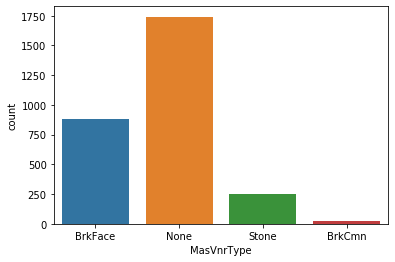

In [305]:
sns.countplot(x='MasVnrType', data=concat_df2)

In [465]:
concat_df2.loc[concat_df2.MasVnrType.isnull() & concat_df2.MasVnrArea!=0, 'MasVnrType'] = 'BrkFace'

In [467]:
concat_df2['MasVnrType'] = concat_df2['MasVnrType'].fillna('NA')
concat_df2['MasVnrArea'] = concat_df2['MasVnrArea'].fillna(0)

#### FireplaceQu

In [468]:
concat_df2[concat_df2.FireplaceQu.isnull() & concat_df2.Fireplaces!=0]

Empty DataFrame
Columns: [1stFlrSF, 2ndFlrSF, 3SsnPorch, Alley, BedroomAbvGr, BldgType, BsmtCond, BsmtExposure, BsmtFinSF1, BsmtFinSF2, BsmtFinType1, BsmtFinType2, BsmtFullBath, BsmtHalfBath, BsmtQual, BsmtUnfSF, CentralAir, Condition1, Condition2, Electrical, EnclosedPorch, ExterCond, ExterQual, Exterior1st, Exterior2nd, Fence, FireplaceQu, Fireplaces, Foundation, FullBath, Functional, GarageArea, GarageCars, GarageCond, GarageFinish, GarageQual, GarageType, GarageYrBlt, GrLivArea, HalfBath, Heating, HeatingQC, HouseStyle, Id, KitchenAbvGr, KitchenQual, LandContour, LandSlope, LotArea, LotConfig, LotFrontage, LotShape, LowQualFinSF, MSSubClass, MSZoning, MasVnrArea, MasVnrType, MiscFeature, MiscVal, MoSold, Neighborhood, OpenPorchSF, OverallCond, OverallQual, PavedDrive, PoolArea, PoolQC, RoofMatl, RoofStyle, SaleCondition, SalePrice, SaleType, ScreenPorch, Street, TotRmsAbvGrd, TotalBsmtSF, Utilities, WoodDeckSF, YearBuilt, YearRemodAdd, YrSold]
Index: []

In [469]:
concat_df2['FireplaceQu'] = concat_df2['FireplaceQu'].fillna('NA')

#### Garage Variables - 'GarageFinish', 'GarageType', 'GarageCond', 'GarageQual', 'GarageArea', 'GarageCars', 'GarageYrBlt'

#### GarageArea

In [470]:
concat_df2[concat_df2.GarageArea.isnull()]

1stFlrSF  2ndFlrSF  3SsnPorch Alley  BedroomAbvGr BldgType BsmtCond  \
2576       942       886          0    NA             3     1Fam       TA   

     BsmtExposure  BsmtFinSF1  BsmtFinSF2 BsmtFinType1 BsmtFinType2  \
2576           No       548.0         0.0          ALQ          Unf   

      BsmtFullBath  BsmtHalfBath BsmtQual  BsmtUnfSF CentralAir Condition1  \
2576           0.0           0.0       Gd      311.0          Y       Norm   

     Condition2 Electrical  EnclosedPorch ExterCond ExterQual Exterior1st  \
2576       Norm      SBrkr            212        TA        TA     Wd Sdng   

     Exterior2nd  Fence FireplaceQu  Fireplaces Foundation  FullBath  \
2576     Plywood  MnPrv          NA           0     BrkTil         2   

     Functional  GarageArea  GarageCars GarageCond GarageFinish GarageQual  \
2576        Typ         NaN         NaN        NaN          NaN        NaN   

     GarageType  GarageYrBlt  GrLivArea  HalfBath Heating HeatingQC  \
2576     Detchd          NaN       1828         0    GasA        Ex   

     HouseStyle    Id  KitchenAbvGr KitchenQual LandContour LandSlope  \
2576     2Story  2577             1          Gd         Lvl       Gtl   

      LotArea LotConfig  LotFrontage LotShape  LowQualFinSF MSSubClass  \
2576     9060    Inside         50.0      Reg             0         70   

     MSZoning  MasVnrArea MasVnrType MiscFeature  MiscVal  MoSold  \
2576       RM         0.0       None          NA        0       3   

     Neighborhood  OpenPorchSF  OverallCond  OverallQual PavedDrive  PoolArea  \
2576       IDOTRR            0            6            5          Y         0   

     PoolQC RoofMatl RoofStyle SaleCondition  SalePrice SaleType  ScreenPorch  \
2576     NA  CompShg     Gable        Alloca        NaN       WD            0   

     Street  TotRmsAbvGrd  TotalBsmtSF Utilities  WoodDeckSF  YearBuilt  \
2576   Pave             6        859.0    AllPub         174       1923   

      YearRemodAdd  YrSold  
2576          1999    2007

In [471]:
concat_df2.loc[concat_df2.GarageArea.isnull(), 'GarageArea'] = 0

#### GarageCars

In [472]:
concat_df2[concat_df2.GarageCars.isnull()]

1stFlrSF  2ndFlrSF  3SsnPorch Alley  BedroomAbvGr BldgType BsmtCond  \
2576       942       886          0    NA             3     1Fam       TA   

     BsmtExposure  BsmtFinSF1  BsmtFinSF2 BsmtFinType1 BsmtFinType2  \
2576           No       548.0         0.0          ALQ          Unf   

      BsmtFullBath  BsmtHalfBath BsmtQual  BsmtUnfSF CentralAir Condition1  \
2576           0.0           0.0       Gd      311.0          Y       Norm   

     Condition2 Electrical  EnclosedPorch ExterCond ExterQual Exterior1st  \
2576       Norm      SBrkr            212        TA        TA     Wd Sdng   

     Exterior2nd  Fence FireplaceQu  Fireplaces Foundation  FullBath  \
2576     Plywood  MnPrv          NA           0     BrkTil         2   

     Functional  GarageArea  GarageCars GarageCond GarageFinish GarageQual  \
2576        Typ         0.0         NaN        NaN          NaN        NaN   

     GarageType  GarageYrBlt  GrLivArea  HalfBath Heating HeatingQC  \
2576     Detchd          NaN       1828         0    GasA        Ex   

     HouseStyle    Id  KitchenAbvGr KitchenQual LandContour LandSlope  \
2576     2Story  2577             1          Gd         Lvl       Gtl   

      LotArea LotConfig  LotFrontage LotShape  LowQualFinSF MSSubClass  \
2576     9060    Inside         50.0      Reg             0         70   

     MSZoning  MasVnrArea MasVnrType MiscFeature  MiscVal  MoSold  \
2576       RM         0.0       None          NA        0       3   

     Neighborhood  OpenPorchSF  OverallCond  OverallQual PavedDrive  PoolArea  \
2576       IDOTRR            0            6            5          Y         0   

     PoolQC RoofMatl RoofStyle SaleCondition  SalePrice SaleType  ScreenPorch  \
2576     NA  CompShg     Gable        Alloca        NaN       WD            0   

     Street  TotRmsAbvGrd  TotalBsmtSF Utilities  WoodDeckSF  YearBuilt  \
2576   Pave             6        859.0    AllPub         174       1923   

      YearRemodAdd  YrSold  
2576          1999    2007

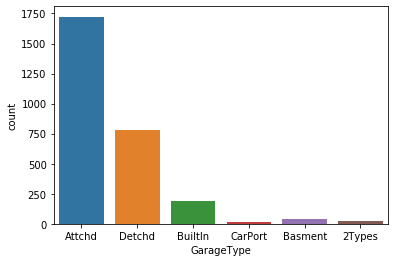

In [360]:
sns.countplot(x='GarageType', data=concat_df2)

In [473]:
concat_df2.loc[concat_df2.GarageCars.isnull(), 'GarageCars'] = 0

#### GarageType GarageQual GarageYrBlt GarageFinish 

In [478]:
c = concat_df2.GarageType.isnull()

In [479]:
len(concat_df2[c])

157

In [480]:
concat_df2.loc[c, 'GarageQual'] = 'NA'
concat_df2.loc[c, 'GarageFinish'] = 'NA'
concat_df2.loc[c, 'GarageYrBlt'] = 0
concat_df2.loc[c, 'GarageType'] = 'NA'

In [492]:
c = concat_df2.GarageQual.isnull()
concat_df2[c]

1stFlrSF  2ndFlrSF  3SsnPorch Alley  BedroomAbvGr BldgType BsmtCond  \
2126      1242       742          0  Grvl             5   2fmCon       TA   
2576       942       886          0    NA             3     1Fam       TA   

     BsmtExposure  BsmtFinSF1  BsmtFinSF2 BsmtFinType1 BsmtFinType2  \
2126           Mn       196.0         0.0          Rec          Unf   
2576           No       548.0         0.0          ALQ          Unf   

      BsmtFullBath  BsmtHalfBath BsmtQual  BsmtUnfSF CentralAir Condition1  \
2126           0.0           0.0       TA     1046.0          Y       Norm   
2576           0.0           0.0       Gd      311.0          Y       Norm   

     Condition2 Electrical  EnclosedPorch ExterCond ExterQual Exterior1st  \
2126       Norm      SBrkr            180        TA        TA     Wd Sdng   
2576       Norm      SBrkr            212        TA        TA     Wd Sdng   

     Exterior2nd  Fence FireplaceQu  Fireplaces Foundation  FullBath  \
2126     Wd Sdng  MnPrv          NA           0      PConc         2   
2576     Plywood  MnPrv          NA           0     BrkTil         2   

     Functional  GarageArea  GarageCars GarageCond GarageFinish GarageQual  \
2126        Typ       360.0         1.0        NaN          NaN        NaN   
2576        Typ         0.0         0.0        NaN          NaN        NaN   

     GarageType  GarageYrBlt  GrLivArea  HalfBath Heating HeatingQC  \
2126     Detchd          NaN       1984         0    GasA        Gd   
2576     Detchd          NaN       1828         0    GasA        Ex   

     HouseStyle    Id  KitchenAbvGr KitchenQual LandContour LandSlope  \
2126     2.5Unf  2127             1          TA         Lvl       Gtl   
2576     2Story  2577             1          Gd         Lvl       Gtl   

      LotArea LotConfig  LotFrontage LotShape  LowQualFinSF MSSubClass  \
2126     8094    Inside         57.0      Reg             0         60   
2576     9060    Inside         50.0      Reg             0         70   

     MSZoning  MasVnrArea MasVnrType MiscFeature  MiscVal  MoSold  \
2126       RM         0.0       None        Shed     1000       9   
2576       RM         0.0       None          NA        0       3   

     Neighborhood  OpenPorchSF  OverallCond  OverallQual PavedDrive  PoolArea  \
2126      OldTown            0            8            6          Y         0   
2576       IDOTRR            0            6            5          Y         0   

     PoolQC RoofMatl RoofStyle SaleCondition  SalePrice SaleType  ScreenPorch  \
2126     NA  CompShg     Gable        Normal        NaN       WD            0   
2576     NA  CompShg     Gable        Alloca        NaN       WD            0   

     Street  TotRmsAbvGrd  TotalBsmtSF Utilities  WoodDeckSF  YearBuilt  \
2126   Pave             8       1242.0    AllPub          64       1910   
2576   Pave             6        859.0    AllPub         174       1923   

      YearRemodAdd  YrSold  
2126          1983    2008  
2576          1999    2007

In [484]:
concat_df2[concat_df2.GarageType == 'Detchd']

1stFlrSF  2ndFlrSF  3SsnPorch Alley  BedroomAbvGr BldgType BsmtCond  \
3          961       756          0    NA             3     1Fam       Gd   
8         1022       752          0    NA             2     1Fam       TA   
10        1040         0          0    NA             3     1Fam       TA   
12         912         0          0    NA             2     1Fam       TA   
15         854         0          0    NA             2     1Fam       TA   
18        1114         0          0    NA             3     1Fam       TA   
26         900         0          0    NA             3     1Fam       TA   
29         520         0          0    NA             1     1Fam       TA   
30         649       668          0  Pave             3     1Fam       TA   
38        1057         0          0    NA             3     1Fam       TA   
43         938         0          0    NA             3     1Fam       TA   
51         816         0          0    NA             3     1Fam       TA   
54        1360         0          0    NA             3     1Fam       TA   
59         780         0          0    NA             2     1Fam       TA   
60        1158         0          0    NA             3     1Fam       TA   
61         581       530          0    NA             3     1Fam       Fa   
63         902       808          0    NA             3     1Fam       TA   
71         845         0          0    NA             2     1Fam       TA   
74         840       765          0    NA             3     1Fam       TA   
76         952         0          0    NA             2     1Fam       TA   
77        1072       213          0    NA             2     1Fam       TA   
79         682       548          0  Grvl             2     1Fam       TA   
83        1065         0          0    NA             3     1Fam       TA   
87         612       612          0  Pave             2   TwnhsE       TA   
90        1040         0          0    NA             2     1Fam      NaN   
92         964         0          0  Grvl             2     1Fam       TA   
93        1260      1031          0    NA             4   2fmCon       Fa   
104       1226       592          0    NA             4     1Fam       TA   
106       1047         0          0  Grvl             2     1Fam       TA   
107        789         0          0    NA             2     1Fam       TA   
...        ...       ...        ...   ...           ...      ...      ...   
2798       665       665          0    NA             3     1Fam       Fa   
2800       984         0          0    NA             3     1Fam       TA   
2801      1081       341          0    NA             3     1Fam       TA   
2802      1921         0          0    NA             4   Duplex       TA   
2804      1032         0          0    NA             2     1Fam      NaN   
2805       879         0          0    NA             2     1Fam       TA   
2806      1073         0          0    NA             2     1Fam       Gd   
2811      1040         0          0    NA             3     1Fam       Gd   
2814       872         0          0    NA             2     1Fam       TA   
2817       810         0          0    NA             2     1Fam       TA   
2822      1836      1836          0    NA             5     1Fam       TA   
2843      1282         0          0    NA             3     1Fam       Gd   
2844       864         0          0    NA             3     1Fam       TA   
2865       970       739          0    NA             3    Twnhs       TA   
2867       846       492          0    NA             3     1Fam       Fa   
2871       498         0          0  Grvl             1     1Fam       TA   
2872      1055       218          0    NA             3     1Fam       TA   
2873      1058       493          0    NA             3     1Fam       TA   
2875       743       736          0    NA             3     1Fam       TA   
2876       755       755          0    NA             3     1Fam       TA   
28

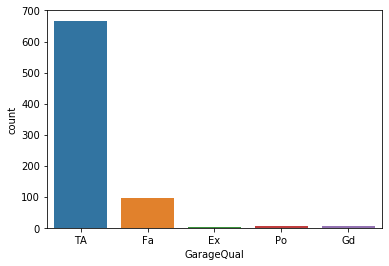

In [486]:
sns.countplot(x='GarageQual', data = concat_df2[concat_df2.GarageType == 'Detchd'])

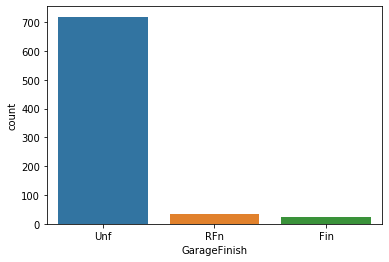

In [487]:
sns.countplot(x='GarageFinish', data = concat_df2[concat_df2.GarageType == 'Detchd'])

In [490]:
concat_df2[concat_df2.GarageType == 'Detchd']['GarageYrBlt'].describe()

count     777.000000
mean     1961.213642
std        27.090830
min      1895.000000
25%      1939.000000
50%      1962.000000
75%      1981.000000
max      2009.000000
Name: GarageYrBlt, dtype: float64

In [493]:
concat_df2.loc[c, 'GarageQual'] = 'TA'
concat_df2.loc[c, 'GarageFinish']  = 'Unf'
concat_df2.loc[c, 'GarageYrBlt'] = 1962

#### GarageCond

In [502]:
c = (concat_df2.GarageArea==0.0) & (concat_df2.GarageCars==0.0)  & (concat_df2.GarageType=='NA') & (concat_df2.GarageFinish=='NA')  

In [506]:
concat_df2[c]['GarageCond'].unique()

array([nan], dtype=object)

In [507]:
concat_df2.loc[c, 'GarageCond'] = 'NA'

In [508]:
concat_df2[concat_df2.GarageCond.isnull()]

1stFlrSF  2ndFlrSF  3SsnPorch Alley  BedroomAbvGr BldgType BsmtCond  \
2126      1242       742          0  Grvl             5   2fmCon       TA   
2576       942       886          0    NA             3     1Fam       TA   

     BsmtExposure  BsmtFinSF1  BsmtFinSF2 BsmtFinType1 BsmtFinType2  \
2126           Mn       196.0         0.0          Rec          Unf   
2576           No       548.0         0.0          ALQ          Unf   

      BsmtFullBath  BsmtHalfBath BsmtQual  BsmtUnfSF CentralAir Condition1  \
2126           0.0           0.0       TA     1046.0          Y       Norm   
2576           0.0           0.0       Gd      311.0          Y       Norm   

     Condition2 Electrical  EnclosedPorch ExterCond ExterQual Exterior1st  \
2126       Norm      SBrkr            180        TA        TA     Wd Sdng   
2576       Norm      SBrkr            212        TA        TA     Wd Sdng   

     Exterior2nd  Fence FireplaceQu  Fireplaces Foundation  FullBath  \
2126     Wd Sdng  MnPrv          NA           0      PConc         2   
2576     Plywood  MnPrv          NA           0     BrkTil         2   

     Functional  GarageArea  GarageCars GarageCond GarageFinish GarageQual  \
2126        Typ       360.0         1.0        NaN          Unf         TA   
2576        Typ         0.0         0.0        NaN          Unf         TA   

     GarageType  GarageYrBlt  GrLivArea  HalfBath Heating HeatingQC  \
2126     Detchd       1962.0       1984         0    GasA        Gd   
2576     Detchd       1962.0       1828         0    GasA        Ex   

     HouseStyle    Id  KitchenAbvGr KitchenQual LandContour LandSlope  \
2126     2.5Unf  2127             1          TA         Lvl       Gtl   
2576     2Story  2577             1          Gd         Lvl       Gtl   

      LotArea LotConfig  LotFrontage LotShape  LowQualFinSF MSSubClass  \
2126     8094    Inside         57.0      Reg             0         60   
2576     9060    Inside         50.0      Reg             0         70   

     MSZoning  MasVnrArea MasVnrType MiscFeature  MiscVal  MoSold  \
2126       RM         0.0       None        Shed     1000       9   
2576       RM         0.0       None          NA        0       3   

     Neighborhood  OpenPorchSF  OverallCond  OverallQual PavedDrive  PoolArea  \
2126      OldTown            0            8            6          Y         0   
2576       IDOTRR            0            6            5          Y         0   

     PoolQC RoofMatl RoofStyle SaleCondition  SalePrice SaleType  ScreenPorch  \
2126     NA  CompShg     Gable        Normal        NaN       WD            0   
2576     NA  CompShg     Gable        Alloca        NaN       WD            0   

     Street  TotRmsAbvGrd  TotalBsmtSF Utilities  WoodDeckSF  YearBuilt  \
2126   Pave             8       1242.0    AllPub          64       1910   
2576   Pave             6        859.0    AllPub         174       1923   

      YearRemodAdd  YrSold  
2126          1983    2008  
2576          1999    2007

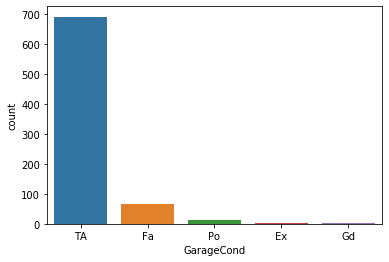

In [509]:
sns.countplot(x='GarageCond', data=concat_df2[concat_df2.GarageType == 'Detchd'])

In [510]:
concat_df2.loc[concat_df2.GarageCond.isnull(), 'GarageCond'] = 'TA'

#### Basement Variables - 'BsmtQual', 'BsmtCond', 'BsmtExposure','BsmtFinType1', 'BsmtFinType2', 'BsmtHalfBath', 'BsmtFullBath', 'TotalBsmtSF', 'BsmtUnfSF', 'BsmtFinSF2', 'BsmtFinSF1'


In [516]:
c = concat_df2['BsmtFinSF1'].isnull()
concat_df2[c]

1stFlrSF  2ndFlrSF  3SsnPorch Alley  BedroomAbvGr BldgType BsmtCond  \
2120       896         0          0    NA             2     1Fam      NaN   

     BsmtExposure  BsmtFinSF1  BsmtFinSF2 BsmtFinType1 BsmtFinType2  \
2120          NaN         NaN         NaN          NaN          NaN   

      BsmtFullBath  BsmtHalfBath BsmtQual  BsmtUnfSF CentralAir Condition1  \
2120           NaN           NaN      NaN        NaN          Y      Feedr   

     Condition2 Electrical  EnclosedPorch ExterCond ExterQual Exterior1st  \
2120       Norm      FuseA              0        TA        TA     MetalSd   

     Exterior2nd  Fence FireplaceQu  Fireplaces Foundation  FullBath  \
2120      CBlock  MnPrv          NA           0      PConc         1   

     Functional  GarageArea  GarageCars GarageCond GarageFinish GarageQual  \
2120        Typ       280.0         1.0         TA          Unf         TA   

     GarageType  GarageYrBlt  GrLivArea  HalfBath Heating HeatingQC  \
2120     Detchd       1946.0        896         0    GasA        TA   

     HouseStyle    Id  KitchenAbvGr KitchenQual LandContour LandSlope  \
2120     1Story  2121             1          TA         Lvl       Gtl   

      LotArea LotConfig  LotFrontage LotShape  LowQualFinSF MSSubClass  \
2120     5940       FR3         99.0      IR1             0         20   

     MSZoning  MasVnrArea MasVnrType MiscFeature  MiscVal  MoSold  \
2120       RM         0.0       None          NA        0       4   

     Neighborhood  OpenPorchSF  OverallCond  OverallQual PavedDrive  PoolArea  \
2120      BrkSide            0            7            4          Y         0   

     PoolQC RoofMatl RoofStyle SaleCondition  SalePrice SaleType  ScreenPorch  \
2120     NA  CompShg     Gable       Abnorml        NaN    ConLD            0   

     Street  TotRmsAbvGrd  TotalBsmtSF Utilities  WoodDeckSF  YearBuilt  \
2120   Pave             4          NaN    AllPub           0       1946   

      YearRemodAdd  YrSold  
2120          1950    2008

In [519]:
concat_df2.loc[c, 'TotalBsmtSF'] = 0
concat_df2.loc[c, 'BsmtFinSF2'] = 0
concat_df2.loc[c, 'BsmtUnfSF'] = 0
concat_df2.loc[c, 'BsmtFinSF1'] = 0

In [521]:
c = concat_df2['BsmtHalfBath'].isnull()
concat_df2[c]

1stFlrSF  2ndFlrSF  3SsnPorch Alley  BedroomAbvGr BldgType BsmtCond  \
2120       896         0          0    NA             2     1Fam      NaN   
2188      3820         0          0    NA             5     1Fam      NaN   

     BsmtExposure  BsmtFinSF1  BsmtFinSF2 BsmtFinType1 BsmtFinType2  \
2120          NaN         0.0         0.0          NaN          NaN   
2188          NaN         0.0         0.0          NaN          NaN   

      BsmtFullBath  BsmtHalfBath BsmtQual  BsmtUnfSF CentralAir Condition1  \
2120           NaN           NaN      NaN        0.0          Y      Feedr   
2188           NaN           NaN      NaN        0.0          Y       Norm   

     Condition2 Electrical  EnclosedPorch ExterCond ExterQual Exterior1st  \
2120       Norm      FuseA              0        TA        TA     MetalSd   
2188       Norm      SBrkr              0        TA        TA     Plywood   

     Exterior2nd  Fence FireplaceQu  Fireplaces Foundation  FullBath  \
2120      CBlock  MnPrv          NA           0      PConc         1   
2188     Plywood     NA          Gd           2       Slab         3   

     Functional  GarageArea  GarageCars GarageCond GarageFinish GarageQual  \
2120        Typ       280.0         1.0         TA          Unf         TA   
2188        Typ       624.0         2.0         TA          Unf         TA   

     GarageType  GarageYrBlt  GrLivArea  HalfBath Heating HeatingQC  \
2120     Detchd       1946.0        896         0    GasA        TA   
2188     Attchd       1959.0       3820         1    GasA        TA   

     HouseStyle    Id  KitchenAbvGr KitchenQual LandContour LandSlope  \
2120     1Story  2121             1          TA         Lvl       Gtl   
2188     1Story  2189             1          Ex         Lvl       Gtl   

      LotArea LotConfig  LotFrontage LotShape  LowQualFinSF MSSubClass  \
2120     5940       FR3         99.0      IR1             0         20   
2188    47007    Inside        123.0      IR1             0         20   

     MSZoning  MasVnrArea MasVnrType MiscFeature  MiscVal  MoSold  \
2120       RM         0.0       None          NA        0       4   
2188       RL         0.0       None          NA        0       7   

     Neighborhood  OpenPorchSF  OverallCond  OverallQual PavedDrive  PoolArea  \
2120      BrkSide            0            7            4          Y         0   
2188      Edwards          372            7            5          Y         0   

     PoolQC RoofMatl RoofStyle SaleCondition  SalePrice SaleType  ScreenPorch  \
2120     NA  CompShg     Gable       Abnorml        NaN    ConLD            0   
2188     NA  CompShg     Gable        Normal        NaN       WD            0   

     Street  TotRmsAbvGrd  TotalBsmtSF Utilities  WoodDeckSF  YearBuilt  \
2120   Pave             4          0.0    AllPub           0       1946   
2188   Pave            11          0.0    AllPub           0       1959   

      YearRemodAdd  YrSold  
2120          1950    2008  
2188          1996    2008

In [522]:
concat_df2.loc[c, 'BsmtHalfBath'] = 0
concat_df2.loc[c, 'BsmtFullBath'] = 0

In [533]:
c = concat_df2['BsmtFinType2'].isnull()
concat_df2[c]

1stFlrSF  2ndFlrSF  3SsnPorch Alley  BedroomAbvGr BldgType BsmtCond  \
332      1629         0          0    NA             3     1Fam       TA   

    BsmtExposure  BsmtFinSF1  BsmtFinSF2 BsmtFinType1 BsmtFinType2  \
332           No      1124.0       479.0          GLQ          NaN   

     BsmtFullBath  BsmtHalfBath BsmtQual  BsmtUnfSF CentralAir Condition1  \
332           1.0           0.0       Gd     1603.0          Y       Norm   

    Condition2 Electrical  EnclosedPorch ExterCond ExterQual Exterior1st  \
332       Norm      SBrkr              0        TA        Gd     VinylSd   

    Exterior2nd Fence FireplaceQu  Fireplaces Foundation  FullBath Functional  \
332     VinylSd    NA          Gd           1      PConc         2        Typ   

     GarageArea  GarageCars GarageCond GarageFinish GarageQual GarageType  \
332       880.0         3.0         TA          RFn         TA     Attchd   

     GarageYrBlt  GrLivArea  HalfBath Heating HeatingQC HouseStyle   Id  \
332       2003.0       1629         0    GasA        Ex     1Story  333   

     KitchenAbvGr KitchenQual LandContour LandSlope  LotArea LotConfig  \
332             1          Gd         Lvl       Gtl    10655    Inside   

     LotFrontage LotShape  LowQualFinSF MSSubClass MSZoning  MasVnrArea  \
332         85.0      IR1             0         20       RL       296.0   

    MasVnrType MiscFeature  MiscVal  MoSold Neighborhood  OpenPorchSF  \
332    BrkFace          NA        0      10      NridgHt            0   

     OverallCond  OverallQual PavedDrive  PoolArea PoolQC RoofMatl RoofStyle  \
332            5            8          Y         0     NA  CompShg     Gable   

    SaleCondition  SalePrice SaleType  ScreenPorch Street  TotRmsAbvGrd  \
332        Normal   284000.0       WD            0   Pave             7   

     TotalBsmtSF Utilities  WoodDeckSF  YearBuilt  YearRemodAdd  YrSold  
332       3206.0    AllPub           0       2003          2004    2009

In [536]:
c = concat_df2['BsmtQual'].isnull()
concat_df2[c]

1stFlrSF  2ndFlrSF  3SsnPorch Alley  BedroomAbvGr BldgType BsmtCond  \
2217       825       536          0    NA             2     1Fam       Fa   
2218       671       378          0    NA             2     1Fam       TA   

     BsmtExposure  BsmtFinSF1  BsmtFinSF2 BsmtFinType1 BsmtFinType2  \
2217           No         0.0         0.0          Unf          Unf   
2218           No         0.0         0.0          Unf          Unf   

      BsmtFullBath  BsmtHalfBath BsmtQual  BsmtUnfSF CentralAir Condition1  \
2217           0.0           0.0      NaN      173.0          N      Feedr   
2218           0.0           0.0      NaN      356.0          N      Feedr   

     Condition2 Electrical  EnclosedPorch ExterCond ExterQual Exterior1st  \
2217       Norm      SBrkr              0        TA        TA     Wd Sdng   
2218       Norm      FuseA              0        TA        TA     Plywood   

     Exterior2nd Fence FireplaceQu  Fireplaces Foundation  FullBath  \
2217     Wd Sdng    NA          NA           0      Stone         1   
2218     Plywood    NA          NA           0      PConc         1   

     Functional  GarageArea  GarageCars GarageCond GarageFinish GarageQual  \
2217        Typ       185.0         1.0         TA          Unf         Fa   
2218        Typ       195.0         1.0         Fa          Unf         Po   

     GarageType  GarageYrBlt  GrLivArea  HalfBath Heating HeatingQC  \
2217     Detchd       1895.0       1361         0    GasA        Ex   
2218     Detchd       1910.0       1049         0    GasA        TA   

     HouseStyle    Id  KitchenAbvGr KitchenQual LandContour LandSlope  \
2217     2Story  2218             1          TA         Lvl       Gtl   
2218     1.5Fin  2219             1          TA         Lvl       Gtl   

      LotArea LotConfig  LotFrontage LotShape  LowQualFinSF MSSubClass  \
2217     5280    Corner         60.0      Reg             0         70   
2218     5150    Corner         52.0      Reg             0         50   

     MSZoning  MasVnrArea MasVnrType MiscFeature  MiscVal  MoSold  \
2217  C (all)         0.0       None          NA        0       7   
2218  C (all)         0.0       None          NA        0       5   

     Neighborhood  OpenPorchSF  OverallCond  OverallQual PavedDrive  PoolArea  \
2217       IDOTRR          123            7            4          Y         0   
2218       IDOTRR            0            7            4          N         0   

     PoolQC RoofMatl RoofStyle SaleCondition  SalePrice SaleType  ScreenPorch  \
2217     NA  CompShg     Gable        Normal        NaN       WD            0   
2218     NA  CompShg     Gable        Normal        NaN       WD            0   

     Street  TotRmsAbvGrd  TotalBsmtSF Utilities  WoodDeckSF  YearBuilt  \
2217   Pave             6        173.0    AllPub           0       1895   
2218   Pave             5        356.0    AllPub           0       1910   

      YearRemodAdd  YrSold  
2217          1950    2008  
2218          2000    2008

In [531]:
concat_df2.loc[c, 'BsmtCond'] = 'NA'
concat_df2.loc[c, 'BsmtExposure'] = 'NA'
concat_df2.loc[c, 'BsmtQual'] = 'NA'
concat_df2.loc[c, 'BsmtFinType2'] = 'NA'
concat_df2.loc[c, 'BsmtFinType1'] = 'NA'

In [537]:
c = concat_df2['BsmtQual'].isnull()
concat_df2[c]

1stFlrSF  2ndFlrSF  3SsnPorch Alley  BedroomAbvGr BldgType BsmtCond  \
2217       825       536          0    NA             2     1Fam       Fa   
2218       671       378          0    NA             2     1Fam       TA   

     BsmtExposure  BsmtFinSF1  BsmtFinSF2 BsmtFinType1 BsmtFinType2  \
2217           No         0.0         0.0          Unf          Unf   
2218           No         0.0         0.0          Unf          Unf   

      BsmtFullBath  BsmtHalfBath BsmtQual  BsmtUnfSF CentralAir Condition1  \
2217           0.0           0.0      NaN      173.0          N      Feedr   
2218           0.0           0.0      NaN      356.0          N      Feedr   

     Condition2 Electrical  EnclosedPorch ExterCond ExterQual Exterior1st  \
2217       Norm      SBrkr              0        TA        TA     Wd Sdng   
2218       Norm      FuseA              0        TA        TA     Plywood   

     Exterior2nd Fence FireplaceQu  Fireplaces Foundation  FullBath  \
2217     Wd Sdng    NA          NA           0      Stone         1   
2218     Plywood    NA          NA           0      PConc         1   

     Functional  GarageArea  GarageCars GarageCond GarageFinish GarageQual  \
2217        Typ       185.0         1.0         TA          Unf         Fa   
2218        Typ       195.0         1.0         Fa          Unf         Po   

     GarageType  GarageYrBlt  GrLivArea  HalfBath Heating HeatingQC  \
2217     Detchd       1895.0       1361         0    GasA        Ex   
2218     Detchd       1910.0       1049         0    GasA        TA   

     HouseStyle    Id  KitchenAbvGr KitchenQual LandContour LandSlope  \
2217     2Story  2218             1          TA         Lvl       Gtl   
2218     1.5Fin  2219             1          TA         Lvl       Gtl   

      LotArea LotConfig  LotFrontage LotShape  LowQualFinSF MSSubClass  \
2217     5280    Corner         60.0      Reg             0         70   
2218     5150    Corner         52.0      Reg             0         50   

     MSZoning  MasVnrArea MasVnrType MiscFeature  MiscVal  MoSold  \
2217  C (all)         0.0       None          NA        0       7   
2218  C (all)         0.0       None          NA        0       5   

     Neighborhood  OpenPorchSF  OverallCond  OverallQual PavedDrive  PoolArea  \
2217       IDOTRR          123            7            4          Y         0   
2218       IDOTRR            0            7            4          N         0   

     PoolQC RoofMatl RoofStyle SaleCondition  SalePrice SaleType  ScreenPorch  \
2217     NA  CompShg     Gable        Normal        NaN       WD            0   
2218     NA  CompShg     Gable        Normal        NaN       WD            0   

     Street  TotRmsAbvGrd  TotalBsmtSF Utilities  WoodDeckSF  YearBuilt  \
2217   Pave             6        173.0    AllPub           0       1895   
2218   Pave             5        356.0    AllPub           0       1910   

      YearRemodAdd  YrSold  
2217          1950    2008  
2218          2000    2008

In [538]:
concat_df2['BsmtQual'] = concat_df2['BsmtQual'].fillna('NA')

In [539]:
c = concat_df2['BsmtFinType2'].isnull()
concat_df2[c]

1stFlrSF  2ndFlrSF  3SsnPorch Alley  BedroomAbvGr BldgType BsmtCond  \
332      1629         0          0    NA             3     1Fam       TA   

    BsmtExposure  BsmtFinSF1  BsmtFinSF2 BsmtFinType1 BsmtFinType2  \
332           No      1124.0       479.0          GLQ          NaN   

     BsmtFullBath  BsmtHalfBath BsmtQual  BsmtUnfSF CentralAir Condition1  \
332           1.0           0.0       Gd     1603.0          Y       Norm   

    Condition2 Electrical  EnclosedPorch ExterCond ExterQual Exterior1st  \
332       Norm      SBrkr              0        TA        Gd     VinylSd   

    Exterior2nd Fence FireplaceQu  Fireplaces Foundation  FullBath Functional  \
332     VinylSd    NA          Gd           1      PConc         2        Typ   

     GarageArea  GarageCars GarageCond GarageFinish GarageQual GarageType  \
332       880.0         3.0         TA          RFn         TA     Attchd   

     GarageYrBlt  GrLivArea  HalfBath Heating HeatingQC HouseStyle   Id  \
332       2003.0       1629         0    GasA        Ex     1Story  333   

     KitchenAbvGr KitchenQual LandContour LandSlope  LotArea LotConfig  \
332             1          Gd         Lvl       Gtl    10655    Inside   

     LotFrontage LotShape  LowQualFinSF MSSubClass MSZoning  MasVnrArea  \
332         85.0      IR1             0         20       RL       296.0   

    MasVnrType MiscFeature  MiscVal  MoSold Neighborhood  OpenPorchSF  \
332    BrkFace          NA        0      10      NridgHt            0   

     OverallCond  OverallQual PavedDrive  PoolArea PoolQC RoofMatl RoofStyle  \
332            5            8          Y         0     NA  CompShg     Gable   

    SaleCondition  SalePrice SaleType  ScreenPorch Street  TotRmsAbvGrd  \
332        Normal   284000.0       WD            0   Pave             7   

     TotalBsmtSF Utilities  WoodDeckSF  YearBuilt  YearRemodAdd  YrSold  
332       3206.0    AllPub           0       2003          2004    2009

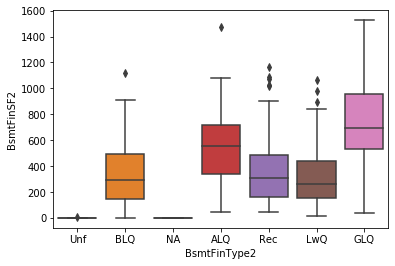

In [540]:
sns.boxplot(x='BsmtFinType2', y='BsmtFinSF2', data=concat_df2)

In [541]:
concat_df2.loc[c, 'BsmtFinType2'] = 'ALQ'

In [543]:
c = concat_df2['BsmtExposure'].isnull()
concat_df2[c]

1stFlrSF  2ndFlrSF  3SsnPorch Alley  BedroomAbvGr BldgType BsmtCond  \
948        936       840          0    NA             3     1Fam       TA   
1487      1595         0          0    NA             2     1Fam       TA   
2348       725       863          0    NA             3     1Fam       TA   

     BsmtExposure  BsmtFinSF1  BsmtFinSF2 BsmtFinType1 BsmtFinType2  \
948           NaN         0.0         0.0          Unf          Unf   
1487          NaN         0.0         0.0          Unf          Unf   
2348          NaN         0.0         0.0          Unf          Unf   

      BsmtFullBath  BsmtHalfBath BsmtQual  BsmtUnfSF CentralAir Condition1  \
948            0.0           0.0       Gd      936.0          Y       Norm   
1487           0.0           0.0       Gd     1595.0          Y       Norm   
2348           0.0           0.0       Gd      725.0          Y       Norm   

     Condition2 Electrical  EnclosedPorch ExterCond ExterQual Exterior1st  \
948        Norm      SBrkr              0        TA        Gd     VinylSd   
1487       Norm      SBrkr              0        TA        Gd     VinylSd   
2348       Norm      SBrkr              0        TA        Gd     VinylSd   

     Exterior2nd Fence FireplaceQu  Fireplaces Foundation  FullBath  \
948      VinylSd    NA          TA           1      PConc         2   
1487     VinylSd    NA          Gd           1      PConc         2   
2348     VinylSd    NA          NA           0     CBlock         3   

     Functional  GarageArea  GarageCars GarageCond GarageFinish GarageQual  \
948         Typ       474.0         2.0         TA          RFn         TA   
1487        Typ       880.0         3.0         TA          RFn         TA   
2348        Typ       561.0         2.0         TA          Unf         TA   

     GarageType  GarageYrBlt  GrLivArea  HalfBath Heating HeatingQC  \
948      Attchd       2002.0       1776         1    GasA        Ex   
1487     Attchd       2005.0       1595         0    GasA        Ex   
2348     Attchd       2007.0       1588         0    GasA        Ex   

     HouseStyle    Id  KitchenAbvGr KitchenQual LandContour LandSlope  \
948      2Story   949             1          Gd         Lvl       Gtl   
1487     1Story  1488             1          Gd         Lvl       Gtl   
2348     2Story  2349             1          Gd         Lvl       Gtl   

      LotArea LotConfig  LotFrontage LotShape  LowQualFinSF MSSubClass  \
948     14006    Inside         65.0      IR1             0         60   
1487     8987    Inside         73.0      Reg             0         20   
2348    10411    Corner         81.0      Reg             0         60   

     MSZoning  MasVnrArea MasVnrType MiscFeature  MiscVal  MoSold  \
948        RL       144.0    BrkFace          NA        0       2   
1487       RL       226.0    BrkFace          NA        0       5   
2348       FV         0.0       None          NA        0       7   

     Neighborhood  OpenPorchSF  OverallCond  OverallQual PavedDrive  PoolArea  \
948       CollgCr           96            5            7          Y         0   
1487      Somerst            0            5            8          Y         0   
2348      Somerst            0            5            5          Y         0   

     PoolQC RoofMatl RoofStyle SaleCondition  SalePrice SaleType  ScreenPorch  \
948      NA  CompShg     Gable        Normal   192500.0       WD            0   
1487     NA  CompShg     Gable        Normal        NaN       WD            0   
2348     NA  CompShg     Gable       Partial        NaN      New            0   

     Street  TotRmsAbvGrd  TotalBsmtSF Utilities  WoodDeckSF  YearBuilt  \
948    Pave             7        936.0    AllPub         144       2002   
1487   Pave             6       1595.0    AllPub         144       2005   
2348   Pave             8        725.0    AllPub           0       2007   

      YearRemodAdd  YrSold  
948           2002    2006  
1487          2006    2010  
23

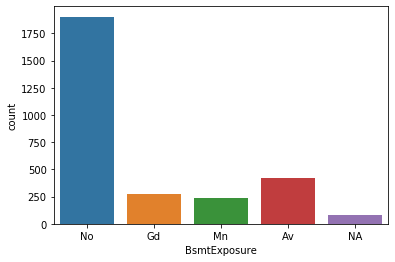

In [545]:
sns.countplot(x='BsmtExposure', data=concat_df2)

In [546]:
concat_df2.loc[c, 'BsmtExposure'] = 'No'

In [548]:
c = concat_df2['BsmtCond'].isnull()
concat_df2[c]

1stFlrSF  2ndFlrSF  3SsnPorch Alley  BedroomAbvGr BldgType BsmtCond  \
2040      1671         0          0    NA             3     1Fam      NaN   
2185      1127         0          0    NA             3     1Fam      NaN   
2524      1009         0          0    NA             3     1Fam      NaN   

     BsmtExposure  BsmtFinSF1  BsmtFinSF2 BsmtFinType1 BsmtFinType2  \
2040           Mn      1044.0       382.0          GLQ          Rec   
2185           No      1033.0         0.0          BLQ          Unf   
2524           Av       755.0         0.0          ALQ          Unf   

      BsmtFullBath  BsmtHalfBath BsmtQual  BsmtUnfSF CentralAir Condition1  \
2040           1.0           0.0       Gd        0.0          Y       Norm   
2185           0.0           1.0       TA       94.0          Y       Norm   
2524           0.0           0.0       TA      240.0          Y       Norm   

     Condition2 Electrical  EnclosedPorch ExterCond ExterQual Exterior1st  \
2040       Norm      SBrkr              0        Ex        Ex     VinylSd   
2185       Norm      SBrkr            138        TA        TA     HdBoard   
2524       Norm      SBrkr              0        TA        TA     Plywood   

     Exterior2nd  Fence FireplaceQu  Fireplaces Foundation  FullBath  \
2040     VinylSd   GdWo          Gd           1     CBlock         3   
2185     Plywood     NA          Po           1     CBlock         1   
2524     VinylSd  MnPrv          Fa           1     CBlock         2   

     Functional  GarageArea  GarageCars GarageCond GarageFinish GarageQual  \
2040        Typ       550.0         2.0         TA          RFn         TA   
2185        Typ       480.0         2.0         TA          Unf         TA   
2524        Typ       576.0         2.0         TA          Unf         TA   

     GarageType  GarageYrBlt  GrLivArea  HalfBath Heating HeatingQC  \
2040     Attchd       1976.0       1671         0    GasA        Ex   
2185     Detchd       1991.0       1127         1    GasA        TA   
2524     Detchd       1977.0       1009         0    GasA        TA   

     HouseStyle    Id  KitchenAbvGr KitchenQual LandContour LandSlope  \
2040     1Story  2041             1          Ex         Lvl       Gtl   
2185     1Story  2186             1          TA         Lvl       Gtl   
2524       SLvl  2525             1          TA         Lvl       Gtl   

      LotArea LotConfig  LotFrontage LotShape  LowQualFinSF MSSubClass  \
2040    16280    Inside        103.0      Reg             0         20   
2185     6500    Inside         65.0      Reg             0         20   
2524     9720    Inside         72.0      Reg             0         80   

     MSZoning  MasVnrArea MasVnrType MiscFeature  MiscVal  MoSold  \
2040       RL         0.0       None          NA        0       5   
2185       RL        84.0    BrkFace          NA        0       5   
2524       RL        51.0    BrkFace          NA        0       6   

     Neighborhood  OpenPorchSF  OverallCond  OverallQual PavedDrive  PoolArea  \
2040      Veenker           90            9            8          Y         0   
2185      Edwards            0            6            6          Y         0   
2524      CollgCr            0            7            5          Y         0   

     PoolQC RoofMatl RoofStyle SaleCondition  SalePrice SaleType  ScreenPorch  \
2040     NA  CompShg     Gable        Normal        NaN       WD            0   
2185     NA  CompShg       Hip        Normal        NaN       WD            0   
2524     NA  CompShg     Gable        Normal        NaN       WD            0   

     Street  TotRmsAbvGrd  TotalBsmtSF Utilities  WoodDeckSF  YearBuilt  \
2040   Pave             6       1426.0    AllPub         280       1976   
2185   Pave             6       1127.0    AllPub           0       1976   
2524   Pave             6        995.0    AllPub           0       1977   

      YearRemodAdd  YrSold  
2040          2007    2008  
2185          1976    2008 

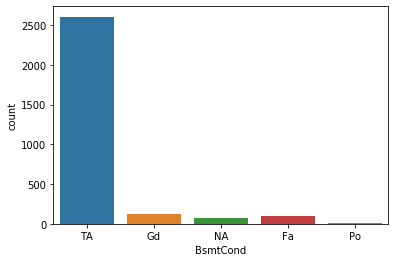

In [549]:
sns.countplot(x='BsmtCond', data=concat_df2)

In [550]:
concat_df2.loc[c, 'BsmtCond'] = 'No'

#### Replacing the NULL values with mode

#### Electrical

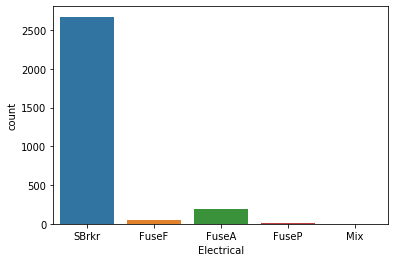

In [552]:
sns.countplot(concat_df2['Electrical'])

In [553]:
concat_df2['Electrical'] = concat_df2['Electrical'].fillna('SBrkr')

#### MSZoning

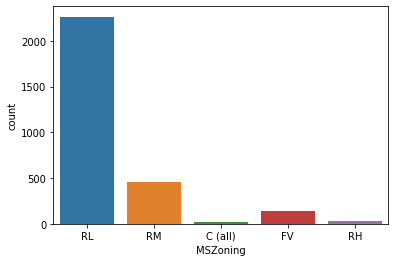

In [554]:
sns.countplot(concat_df2['MSZoning'])

In [555]:
concat_df2['MSZoning'] = concat_df2['MSZoning'].fillna('RL')

#### Functional

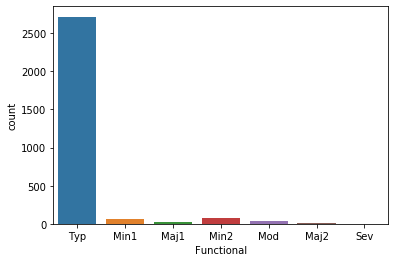

In [557]:
sns.countplot(concat_df2['Functional'])

In [558]:
concat_df2['Functional'] = concat_df2['Functional'].fillna('Typ')

#### 'Exterior1st', 'Exterior2nd' If there are more than one material then we have different values for exterior1st and exterior2nd otherwise they take same values

In [560]:
a = concat_df2.groupby(['Exterior1st', 'Exterior2nd']).agg({'MSZoning':['count']})
a.columns = ['Count']
a = a.reset_index()

In [561]:
a[a.Count == a.Count.max()].reset_index(drop=True).iloc[0]

Exterior1st    VinylSd
Exterior2nd    VinylSd
Count             1005
Name: 0, dtype: object

In [562]:
concat_df2['Exterior1st'] = concat_df2['Exterior1st'].fillna('VinylSd')
concat_df2['Exterior2nd'] = concat_df2['Exterior2nd'].fillna('VinylSd')

#### KitchenQual

In [564]:
concat_df2[concat_df2.KitchenQual.isnull()]

1stFlrSF  2ndFlrSF  3SsnPorch Alley  BedroomAbvGr BldgType BsmtCond  \
1555       725       499          0    NA             3     1Fam       Fa   

     BsmtExposure  BsmtFinSF1  BsmtFinSF2 BsmtFinType1 BsmtFinType2  \
1555           No         0.0         0.0          Unf          Unf   

      BsmtFullBath  BsmtHalfBath BsmtQual  BsmtUnfSF CentralAir Condition1  \
1555           0.0           0.0       Gd      689.0          N       Norm   

     Condition2 Electrical  EnclosedPorch ExterCond ExterQual Exterior1st  \
1555       Norm      SBrkr            248        TA        TA     Wd Sdng   

     Exterior2nd Fence FireplaceQu  Fireplaces Foundation  FullBath  \
1555     Wd Sdng    NA          NA           0     BrkTil         1   

     Functional  GarageArea  GarageCars GarageCond GarageFinish GarageQual  \
1555        Mod       180.0         1.0         Fa          Unf         Fa   

     GarageType  GarageYrBlt  GrLivArea  HalfBath Heating HeatingQC  \
1555     Detchd       1917.0       1224         1    GasA        Gd   

     HouseStyle    Id  KitchenAbvGr KitchenQual LandContour LandSlope  \
1555     1.5Fin  1556             1         NaN         Lvl       Gtl   

      LotArea LotConfig  LotFrontage LotShape  LowQualFinSF MSSubClass  \
1555    10632    Inside         72.0      IR1             0         50   

     MSZoning  MasVnrArea MasVnrType MiscFeature  MiscVal  MoSold  \
1555       RL         0.0       None          NA        0       1   

     Neighborhood  OpenPorchSF  OverallCond  OverallQual PavedDrive  PoolArea  \
1555      ClearCr            0            3            5          N         0   

     PoolQC RoofMatl RoofStyle SaleCondition  SalePrice SaleType  ScreenPorch  \
1555     NA  CompShg     Gable        Normal        NaN      COD            0   

     Street  TotRmsAbvGrd  TotalBsmtSF Utilities  WoodDeckSF  YearBuilt  \
1555   Pave             6        689.0    AllPub           0       1917   

      YearRemodAdd  YrSold  
1555          1950    2010

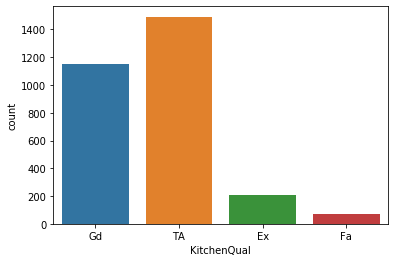

In [567]:
sns.countplot(x='KitchenQual', data=concat_df2)

In [568]:
concat_df2['KitchenQual'] = concat_df2['KitchenQual'].fillna('TA')

#### SaleType

In [571]:
concat_df2[concat_df2.SaleType.isnull()]

1stFlrSF  2ndFlrSF  3SsnPorch Alley  BedroomAbvGr BldgType BsmtCond  \
2489      1176         0          0    NA             3     1Fam       TA   

     BsmtExposure  BsmtFinSF1  BsmtFinSF2 BsmtFinType1 BsmtFinType2  \
2489           Mn       190.0       873.0          Rec          BLQ   

      BsmtFullBath  BsmtHalfBath BsmtQual  BsmtUnfSF CentralAir Condition1  \
2489           1.0           0.0       TA       95.0          Y      Feedr   

     Condition2 Electrical  EnclosedPorch ExterCond ExterQual Exterior1st  \
2489       Norm      SBrkr              0        TA        TA     Plywood   

     Exterior2nd Fence FireplaceQu  Fireplaces Foundation  FullBath  \
2489     Plywood    NA          Gd           2     CBlock         1   

     Functional  GarageArea  GarageCars GarageCond GarageFinish GarageQual  \
2489        Typ       303.0         1.0         TA          Unf         TA   

     GarageType  GarageYrBlt  GrLivArea  HalfBath Heating HeatingQC  \
2489     Attchd       1958.0       1176         0    GasA        TA   

     HouseStyle    Id  KitchenAbvGr KitchenQual LandContour LandSlope  \
2489     1Story  2490             1          TA         Lvl       Gtl   

      LotArea LotConfig  LotFrontage LotShape  LowQualFinSF MSSubClass  \
2489    13770    Corner         85.0      Reg             0         20   

     MSZoning  MasVnrArea MasVnrType MiscFeature  MiscVal  MoSold  \
2489       RL       340.0    BrkFace          NA        0      10   

     Neighborhood  OpenPorchSF  OverallCond  OverallQual PavedDrive  PoolArea  \
2489       Sawyer            0            6            5          Y         0   

     PoolQC RoofMatl RoofStyle SaleCondition  SalePrice SaleType  ScreenPorch  \
2489     NA  CompShg     Gable        Normal        NaN      NaN            0   

     Street  TotRmsAbvGrd  TotalBsmtSF Utilities  WoodDeckSF  YearBuilt  \
2489   Pave             6       1158.0    AllPub           0       1958   

      YearRemodAdd  YrSold  
2489          1998    2007

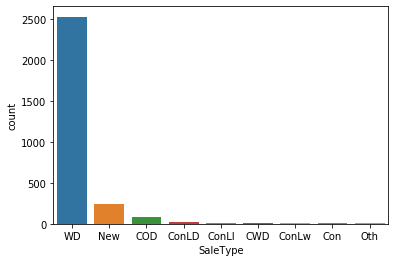

In [572]:
sns.countplot(x='SaleType', data=concat_df2)

In [573]:
concat_df2['SaleType'] = concat_df2['SaleType'].fillna('WD')

#### Utilities

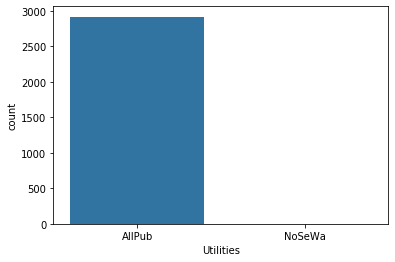

In [575]:
sns.countplot(x='Utilities', data=concat_df2)

In [577]:
concat_df2['Utilities'] = concat_df2['Utilities'].fillna('AllPub')

#### LotFrontage

#### We will estimate the LotFrontage by grouping w.r.t neighbourhood and calculating the mean

In [590]:
concat_df2['LotFrontage'] = pd.concat([train_df['LotFrontage'], test_df['LotFrontage']], ignore_index=True)

In [591]:
concat_df2['LotFrontage'].describe()

count    2433.000000
mean       69.305795
std        23.344905
min        21.000000
25%        59.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [592]:
concat_df2.groupby(['Neighborhood'])['LotFrontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    66.910112
Gilbert    74.207207
IDOTRR     62.241379
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.157895
Veenker    72.000000
Name: LotFrontage, dtype: float64

In [594]:
a = concat_df2.groupby(['Neighborhood'])['LotFrontage'].mean()

In [599]:
concat_df2.loc[concat_df2.LotFrontage.isnull(), 'LotFrontage'] = concat_df2.loc[concat_df2.LotFrontage.isnull(), 'Neighborhood'].map(a)

In [600]:
missing_data(concat_df2)

TOTAL  PERCENT
SalePrice   1459    49.98

In [942]:
concat_df2.to_pickle('concat_df2.pkl')

# FEATURE ENGINEERING

In [833]:
concat_df3 = concat_df2.copy()

## Year variables

In [ ]:
year_vars = ['YearBuilt','YearRemodAdd', 'MoSold', 'YrSold', 'GarageYrBlt']

In [616]:
concat_df3['YearBuilt'].describe()

count    2919.000000
mean     1971.312778
std        30.291442
min      1872.000000
25%      1953.500000
50%      1973.000000
75%      2001.000000
max      2010.000000
Name: YearBuilt, dtype: float64

In [664]:
concat_df3['YearRemodAdd'].describe()

count    2919.000000
mean     1984.264474
std        20.894344
min      1950.000000
25%      1965.000000
50%      1993.000000
75%      2004.000000
max      2010.000000
Name: YearRemodAdd, dtype: float64

In [646]:
concat_df3['YearRemodAdd'].value_counts()[:10]

1950    361
2006    202
2007    164
2005    141
2004    111
2000    104
2003     99
2002     82
2008     81
1998     77
Name: YearRemodAdd, dtype: int64

In [626]:
concat_df3['MoSold'].value_counts()[:10]

6     503
7     446
5     394
4     279
8     233
3     232
10    173
9     158
11    142
2     133
Name: MoSold, dtype: int64

In [628]:
concat_df3['YrSold'].value_counts()

2007    692
2009    647
2008    622
2006    619
2010    339
Name: YrSold, dtype: int64

In [649]:
concat_df3['GarageYrBlt'].value_counts().iloc[:20]

0.0       157
2005.0    142
2006.0    115
2007.0    115
2004.0     99
2003.0     92
1977.0     66
2008.0     61
1998.0     58
2000.0     55
1999.0     54
2002.0     53
1950.0     51
1976.0     50
1993.0     49
1968.0     48
1997.0     44
1958.0     42
1956.0     41
1978.0     41
Name: GarageYrBlt, dtype: int64

##### Creating new Features - House_Age, Renewal_Age, Garage_Age, IsRemodAdd

In [834]:
concat_df3['House_Age'] = concat_df3['YrSold'] - concat_df3['YearBuilt']
concat_df3['House_Age'] = concat_df3['House_Age'].map(lambda x: max(0, x))

In [835]:
concat_df3['RemodAdd_Age'] = concat_df3['YrSold'] - concat_df3['YearRemodAdd']
concat_df3['RemodAdd_Age'] = concat_df3['RemodAdd_Age'].map(lambda x: max(x, 0))

In [836]:
concat_df3.loc[concat_df3.YearBuilt != concat_df3.YearRemodAdd, 'IsRemodAdd'] = '1'
concat_df3.loc[concat_df3.YearBuilt == concat_df3.YearRemodAdd, 'IsRemodAdd'] = '0'

#### converting YrSold and MoSold to categorical since number of unique values in these features are very less

In [837]:
concat_df3['MoSold'] = concat_df3['MoSold'].astype('str')
concat_df3['YrSold'] = concat_df3['YrSold'].astype('str')

#### Using the top 10 most occuring values as categories and rest of the years are marked as other for variables 'YearBuilt', 'YearRemodAdd'  and 'GarageYrBlt'

In [838]:
for j in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    l1 = list(concat_df3[j].value_counts().iloc[:20].index)
    year_dict1 = {i:str(i) for i in l1}
    l2 = list(concat_df3[j].value_counts().iloc[20:].index)
    year_dict2 = {i:'other' for i in l2}
    concat_df3[j] = concat_df3[j].map({**year_dict1, **year_dict2})

In [941]:
concat_df3.to_pickle('concat_df3.pkl')

## Let's create some new numerical features

In [841]:
concat_df4 = concat_df3.copy()

#### TotalPorchSF by adding all Porch areas

In [842]:
concat_df4['TotalPorchSF'] = concat_df4['3SsnPorch'] + concat_df4['ScreenPorch'] + concat_df4['EnclosedPorch'] + concat_df4['OpenPorchSF']

#### Total Bathrooms in a house as a weighted sum of Full and Half Bathrooms; Full Bathroom is weighted as 1 and Half Bathroom is weighted as 0.5

In [843]:
concat_df4['TotalBath'] = concat_df4['FullBath'] + concat_df4['HalfBath']*0.5 + concat_df4['BsmtFullBath'] + concat_df4['BsmtHalfBath']*0.5

#### Total Area in Square feet

In [845]:
concat_df4['TotalArea'] = concat_df4['1stFlrSF'] + concat_df4['2ndFlrSF'] + concat_df4['TotalBsmtSF']

#### High Quality Finished area in Square Feet (all floors)

In [846]:
concat_df4['HighQualFinSF'] = concat_df4['1stFlrSF'] + concat_df4['2ndFlrSF'] - concat_df4['LowQualFinSF']

In [848]:
concat_df4.head(100)

1stFlrSF  2ndFlrSF  3SsnPorch Alley  BedroomAbvGr BldgType BsmtCond  \
0        856       854          0    NA             3     1Fam       TA   
1       1262         0          0    NA             3     1Fam       TA   
2        920       866          0    NA             3     1Fam       TA   
3        961       756          0    NA             3     1Fam       Gd   
4       1145      1053          0    NA             4     1Fam       TA   
5        796       566        320    NA             1     1Fam       TA   
6       1694         0          0    NA             3     1Fam       TA   
7       1107       983          0    NA             3     1Fam       TA   
8       1022       752          0    NA             2     1Fam       TA   
9       1077         0          0    NA             2   2fmCon       TA   
10      1040         0          0    NA             3     1Fam       TA   
11      1182      1142          0    NA             4     1Fam       TA   
12       912         0          0    NA             2     1Fam       TA   
13      1494         0          0    NA             3     1Fam       TA   
14      1253         0          0    NA             2     1Fam       TA   
15       854         0          0    NA             2     1Fam       TA   
16      1004         0          0    NA             2     1Fam       TA   
17      1296         0          0    NA             2   Duplex       NA   
18      1114         0          0    NA             3     1Fam       TA   
19      1339         0          0    NA             3     1Fam       TA   
20      1158      1218          0    NA             4     1Fam       TA   
21      1108         0          0  Grvl             3     1Fam       TA   
22      1795         0          0    NA             3     1Fam       TA   
23      1060         0          0    NA             3   TwnhsE       TA   
24      1060         0          0    NA             3     1Fam       TA   
25      1600         0          0    NA             3     1Fam       TA   
26       900         0          0    NA             3     1Fam       TA   
27      1704         0          0    NA             3     1Fam       TA   
28      1600         0          0    NA             2     1Fam       TA   
29       520         0          0    NA             1     1Fam       TA   
30       649       668          0  Pave             3     1Fam       TA   
31      1228         0          0    NA             3     1Fam       TA   
32      1234         0          0    NA             3     1Fam       TA   
33      1700         0          0    NA             4     1Fam       TA   
34      1561         0          0    NA             2   TwnhsE       TA   
35      1132      1320          0    NA             4     1Fam       TA   
36      1097         0          0    NA             3     1Fam       TA   
37      1297         0          0    NA             3     1Fam       TA   
38      1057         0          0    NA             3     1Fam       TA   
39      1152         0          0    NA             2   Duplex       NA   
40      1324         0          0    NA             3     1Fam       TA   
41      1328         0          0    NA             2     1Fam       TA   
42       884         0          0    NA             2     1Fam       TA   
43       938         0          0    NA             3     1Fam       TA   
44      1150         0          0    NA             3     1Fam       TA   
45      1752         0          0    NA             2   TwnhsE       TA   
46      1518       631          0    NA             1     1Fam       TA   
47      1656         0          0    NA             3     1Fam       TA   
48       736       716          0    NA             2   2fmCon       TA   
49       955         0          0    NA             3     1Fam       TA   
50       794       676          0    NA             3     1Fam       TA   
51       816         0          0    NA             3     1Fam       TA   
52       816         0       

In [940]:
concat_df4.to_pickle('concat_df4.pkl')

## Let's create some new categorical indicator features

In [847]:
concat_df5 = concat_df4.copy()

#### hasGarage - Does it have a garage

In [849]:
concat_df5.loc[concat_df5.GarageType == 'NA', 'hasGarage'] = '0'
concat_df5.loc[concat_df5.GarageType != 'NA', 'hasGarage'] = '1'

#### hasPool - is there a pool

In [850]:
concat_df5.loc[concat_df5.PoolQC == 'NA', 'hasPool'] = '0'
concat_df5.loc[concat_df5.PoolQC != 'NA', 'hasPool'] = '1'

#### hasFence

In [851]:
concat_df5.loc[concat_df5.Fence == 'NA', 'hasFence'] = '0'
concat_df5.loc[concat_df5.Fence != 'NA', 'hasFence'] = '1'

#### hasMisc

In [852]:
concat_df5.loc[concat_df5.MiscFeature == 'NA', 'hasMisc'] = '0'
concat_df5.loc[concat_df5.MiscFeature != 'NA', 'hasMisc'] = '1'

#### hasFireplace

In [853]:
concat_df5.loc[concat_df5.FireplaceQu == 'NA', 'hasFireplace'] = '0'
concat_df5.loc[concat_df5.FireplaceQu != 'NA', 'hasFireplace'] = '1'

#### hasBasement

In [854]:
concat_df5.loc[concat_df5.BsmtCond == 'NA', 'hasBasement'] = '0'
concat_df5.loc[concat_df5.BsmtCond != 'NA', 'hasBasement'] = '1'

#### hasCondition2

In [855]:
concat_df5.loc[concat_df5.Condition2 == concat_df5.Condition1, 'hasCondition2'] = '0'
concat_df5.loc[concat_df5.Condition2 != concat_df5.Condition1, 'hasCondition2'] = '1'

#### hasExterior2nd

In [856]:
concat_df5.loc[concat_df5.Exterior2nd == concat_df5.Exterior1st, 'hasExterior2nd'] = '0'
concat_df5.loc[concat_df5.Exterior2nd != concat_df5.Exterior1st, 'hasExterior2nd'] = '1'

In [857]:
concat_df5.head(100)

1stFlrSF  2ndFlrSF  3SsnPorch Alley  BedroomAbvGr BldgType BsmtCond  \
0        856       854          0    NA             3     1Fam       TA   
1       1262         0          0    NA             3     1Fam       TA   
2        920       866          0    NA             3     1Fam       TA   
3        961       756          0    NA             3     1Fam       Gd   
4       1145      1053          0    NA             4     1Fam       TA   
5        796       566        320    NA             1     1Fam       TA   
6       1694         0          0    NA             3     1Fam       TA   
7       1107       983          0    NA             3     1Fam       TA   
8       1022       752          0    NA             2     1Fam       TA   
9       1077         0          0    NA             2   2fmCon       TA   
10      1040         0          0    NA             3     1Fam       TA   
11      1182      1142          0    NA             4     1Fam       TA   
12       912         0          0    NA             2     1Fam       TA   
13      1494         0          0    NA             3     1Fam       TA   
14      1253         0          0    NA             2     1Fam       TA   
15       854         0          0    NA             2     1Fam       TA   
16      1004         0          0    NA             2     1Fam       TA   
17      1296         0          0    NA             2   Duplex       NA   
18      1114         0          0    NA             3     1Fam       TA   
19      1339         0          0    NA             3     1Fam       TA   
20      1158      1218          0    NA             4     1Fam       TA   
21      1108         0          0  Grvl             3     1Fam       TA   
22      1795         0          0    NA             3     1Fam       TA   
23      1060         0          0    NA             3   TwnhsE       TA   
24      1060         0          0    NA             3     1Fam       TA   
25      1600         0          0    NA             3     1Fam       TA   
26       900         0          0    NA             3     1Fam       TA   
27      1704         0          0    NA             3     1Fam       TA   
28      1600         0          0    NA             2     1Fam       TA   
29       520         0          0    NA             1     1Fam       TA   
30       649       668          0  Pave             3     1Fam       TA   
31      1228         0          0    NA             3     1Fam       TA   
32      1234         0          0    NA             3     1Fam       TA   
33      1700         0          0    NA             4     1Fam       TA   
34      1561         0          0    NA             2   TwnhsE       TA   
35      1132      1320          0    NA             4     1Fam       TA   
36      1097         0          0    NA             3     1Fam       TA   
37      1297         0          0    NA             3     1Fam       TA   
38      1057         0          0    NA             3     1Fam       TA   
39      1152         0          0    NA             2   Duplex       NA   
40      1324         0          0    NA             3     1Fam       TA   
41      1328         0          0    NA             2     1Fam       TA   
42       884         0          0    NA             2     1Fam       TA   
43       938         0          0    NA             3     1Fam       TA   
44      1150         0          0    NA             3     1Fam       TA   
45      1752         0          0    NA             2   TwnhsE       TA   
46      1518       631          0    NA             1     1Fam       TA   
47      1656         0          0    NA             3     1Fam       TA   
48       736       716          0    NA             2   2fmCon       TA   
49       955         0          0    NA             3     1Fam       TA   
50       794       676          0    NA             3     1Fam       TA   
51       816         0          0    NA             3     1Fam       TA   
52       816         0       

In [939]:
concat_df5.to_pickle('concat_df5.pkl')

## Correcting skewness

In [858]:
concat_df6 = concat_df5.copy()

#### Clearly the SalePrice is rightly skewed. To fix this, we will take log transformation of SalePrice

In EDA section we saw the salePrice is positively skewed. For regression algorithms to work properly, the numerical data needs to be close to Normal Distribution. We will take the lop transformation of SalePrice to remove its positive skewness 

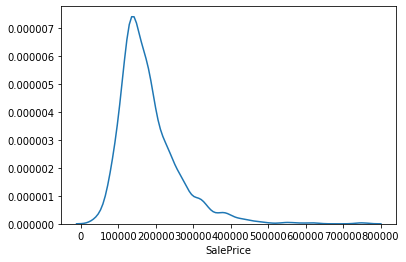

In [859]:
sns.distplot(concat_df6['SalePrice'], hist=False)

In [860]:
concat_df6.loc[~concat_df6.SalePrice.isnull(), 'SalePrice'] = np.log1p(concat_df6.loc[~concat_df6.SalePrice.isnull(), 'SalePrice'])

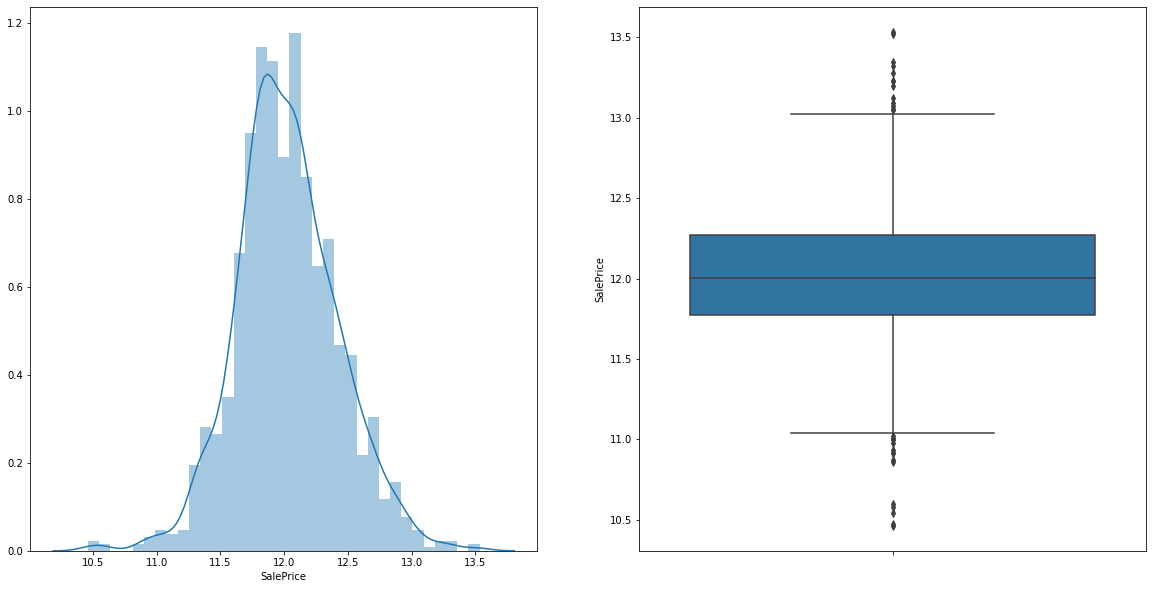

In [861]:
fig, axs = plt.subplots(1, 2, figsize=(20,10))
sns.distplot(concat_df6.loc[~concat_df6.SalePrice.isnull(), 'SalePrice'], ax = axs[0])
sns.boxplot(concat_df6.loc[~concat_df6.SalePrice.isnull(), 'SalePrice'], orient='v', ax=axs[1])

#### Let us now fix the skewness of other numeric variables
We begin by converting MSSubClass to string since it is not a numeric variable

In [871]:
concat_df6['MSSubClass'] = concat_df6['MSSubClass'].astype('str')

In [880]:
numeric_vars = concat_df6.select_dtypes(include=['int64', 'float64'])

In [881]:
numeric_vars = list(numeric_vars.columns)

In [882]:
numeric_vars

['1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'BedroomAbvGr',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtUnfSF',
 'EnclosedPorch',
 'Fireplaces',
 'FullBath',
 'GarageArea',
 'GarageCars',
 'GrLivArea',
 'HalfBath',
 'Id',
 'KitchenAbvGr',
 'LotArea',
 'LotFrontage',
 'LowQualFinSF',
 'MasVnrArea',
 'MiscVal',
 'OpenPorchSF',
 'OverallCond',
 'OverallQual',
 'PoolArea',
 'SalePrice',
 'ScreenPorch',
 'TotRmsAbvGrd',
 'TotalBsmtSF',
 'WoodDeckSF',
 'House_Age',
 'RemodAdd_Age',
 'TotalPorchSF',
 'TotalBath',
 'TotalArea',
 'HighQualFinSF']

##### OverallQual and OverallCond are ordinal varibales, so their skew won't be computed

In [883]:
numeric_vars.remove('Id')
numeric_vars.remove('SalePrice')
numeric_vars.remove('OverallQual')
numeric_vars.remove('OverallCond')

In [884]:
numeric_vars

['1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'BedroomAbvGr',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtUnfSF',
 'EnclosedPorch',
 'Fireplaces',
 'FullBath',
 'GarageArea',
 'GarageCars',
 'GrLivArea',
 'HalfBath',
 'KitchenAbvGr',
 'LotArea',
 'LotFrontage',
 'LowQualFinSF',
 'MasVnrArea',
 'MiscVal',
 'OpenPorchSF',
 'PoolArea',
 'ScreenPorch',
 'TotRmsAbvGrd',
 'TotalBsmtSF',
 'WoodDeckSF',
 'House_Age',
 'RemodAdd_Age',
 'TotalPorchSF',
 'TotalBath',
 'TotalArea',
 'HighQualFinSF']

In [885]:
from scipy import stats, special

In [886]:
skewdict = {'VarName':[], 'skew':[]}
for i in numeric_vars:
    skewdict['VarName'].append(i)
    skewdict['skew'].append(stats.skew(concat_df6[i]))
skew_df = pd.DataFrame(skewdict)
skew_df.sort_values(ascending=False, by='skew')

VarName       skew
21        MiscVal  21.947195
23       PoolArea  16.898328
17        LotArea  12.822431
19   LowQualFinSF  12.088761
2       3SsnPorch  11.376065
16   KitchenAbvGr   4.302254
5      BsmtFinSF2   4.146143
9   EnclosedPorch   4.003891
24    ScreenPorch   3.946694
7    BsmtHalfBath   3.931594
20     MasVnrArea   2.613592
22    OpenPorchSF   2.535114
30   TotalPorchSF   2.237266
27     WoodDeckSF   1.842433
32      TotalArea   1.511479
0        1stFlrSF   1.469604
18    LotFrontage   1.460429
4      BsmtFinSF1   1.425230
14      GrLivArea   1.269358
33  HighQualFinSF   1.206405
26    TotalBsmtSF   1.156894
8       BsmtUnfSF   0.919339
1        2ndFlrSF   0.861675
25   TotRmsAbvGrd   0.758367
10     Fireplaces   0.733495
15       HalfBath   0.694566
6    BsmtFullBath   0.624832
28      House_Age   0.598651
31      TotalBath   0.492247
29   RemodAdd_Age   0.450398
3    BedroomAbvGr   0.326324
12     GarageArea   0.239257
11       FullBath   0.167606
13     GarageCars  -0.219581

In [887]:
skew_df = skew_df.set_index('VarName')

In [888]:
skew_df = skew_df.astype('float64')

In [889]:
skew_df

skew
VarName                 
1stFlrSF        1.469604
2ndFlrSF        0.861675
3SsnPorch      11.376065
BedroomAbvGr    0.326324
BsmtFinSF1      1.425230
BsmtFinSF2      4.146143
BsmtFullBath    0.624832
BsmtHalfBath    3.931594
BsmtUnfSF       0.919339
EnclosedPorch   4.003891
Fireplaces      0.733495
FullBath        0.167606
GarageArea      0.239257
GarageCars     -0.219581
GrLivArea       1.269358
HalfBath        0.694566
KitchenAbvGr    4.302254
LotArea        12.822431
LotFrontage     1.460429
LowQualFinSF   12.088761
MasVnrArea      2.613592
MiscVal        21.947195
OpenPorchSF     2.535114
PoolArea       16.898328
ScreenPorch     3.946694
TotRmsAbvGrd    0.758367
TotalBsmtSF     1.156894
WoodDeckSF      1.842433
House_Age       0.598651
RemodAdd_Age    0.450398
TotalPorchSF    2.237266
TotalBath       0.492247
TotalArea       1.511479
HighQualFinSF   1.206405

##### For all the numerical features with skew>0.5, we will apply boxcox1p transformation

In [890]:
high_skew = skew_df[abs(skew_df['skew']) > 0.5]

In [891]:
for i in high_skew.index:
    concat_df6[i] = special.boxcox1p(concat_df6[i], stats.boxcox_normmax(concat_df6[i]+1))

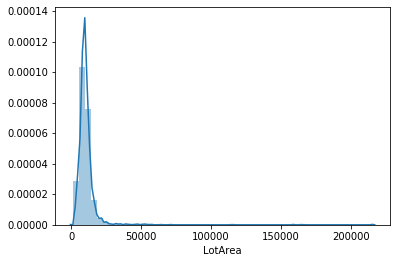

In [892]:
sns.distplot(concat_df5['LotArea'])

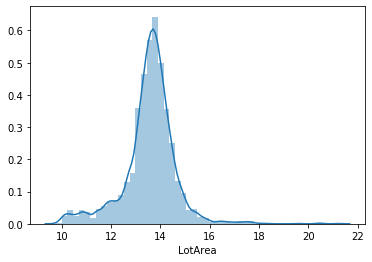

In [893]:
sns.distplot(concat_df6['LotArea'])

In [894]:
concat_df6

1stFlrSF     2ndFlrSF  3SsnPorch Alley  BedroomAbvGr BldgType BsmtCond  \
0     5.318379  1019.540733   0.000000    NA             3     1Fam       TA   
1     5.550627     0.000000   0.000000    NA             3     1Fam       TA   
2     5.362015  1034.306417   0.000000    NA             3     1Fam       TA   
3     5.388291   899.200533   0.000000    NA             3     1Fam       Gd   
4     5.493032  1265.167706   0.000000    NA             4     1Fam       TA   
5     5.274167   667.312466   7.112852    NA             1     1Fam       TA   
6     5.722430     0.000000   0.000000    NA             3     1Fam       TA   
7     5.472956  1178.588526   0.000000    NA             3     1Fam       TA   
8     5.425239   894.298442   0.000000    NA             2     1Fam       TA   
9     5.456578     0.000000   0.000000    NA             2   2fmCon       TA   
10    5.435690     0.000000   0.000000    NA             3     1Fam       TA   
11    5.511903  1375.500773   0.000000    NA             4     1Fam       TA   
12    5.356742     0.000000   0.000000    NA             2     1Fam       TA   
13    5.649563     0.000000   0.000000    NA             3     1Fam       TA   
14    5.546404     0.000000   0.000000    NA             2     1Fam       TA   
15    5.316959     0.000000   0.000000    NA             2     1Fam       TA   
16    5.414588     0.000000   0.000000    NA             2     1Fam       TA   
17    5.566293     0.000000   0.000000    NA             2   Duplex       NA   
18    5.476709     0.000000   0.000000    NA             3     1Fam       TA   
19    5.585487     0.000000   0.000000    NA             3     1Fam       TA   
20    5.499736  1469.927677   0.000000    NA             4     1Fam       TA   
21    5.473494     0.000000   0.000000  Grvl             3     1Fam       TA   
22    5.755794     0.000000   0.000000    NA             3     1Fam       TA   
23    5.447078     0.000000   0.000000    NA             3   TwnhsE       TA   
24    5.447078     0.000000   0.000000    NA             3     1Fam       TA   
25    5.689402     0.000000   0.000000    NA             3     1Fam       TA   
26    5.348738     0.000000   0.000000    NA             3     1Fam       TA   
27    5.725828     0.000000   0.000000    NA             3     1Fam       TA   
28    5.689402     0.000000   0.000000    NA             2     1Fam       TA   
29    5.010419     0.000000   0.000000    NA             1     1Fam       TA   
30    5.148705   791.545824   0.000000  Pave             3     1Fam       TA   
31    5.534501     0.000000   0.000000    NA             3     1Fam       TA   
32    5.537381     0.000000   0.000000    NA             3     1Fam       TA   
33    5.724471     0.000000   0.000000    NA             4     1Fam       TA   
34    5.675083     0.000000   0.000000    NA             2   TwnhsE       TA   
35    5.486245  1596.941048   0.000000    NA             4     1Fam       TA   
36    5.467550     0.000000   0.000000    NA             3     1Fam       TA   
37    5.566747     0.000000   0.000000    NA             3     1Fam       TA   
38    5.445385     0.000000   0.000000    NA             3     1Fam       TA   
39    5.496652     0.000000   0.000000    NA             2   Duplex       NA   
40    5.578868     0.000000   0.000000    NA             3     1Fam       TA   
41    5.580641     0.000000   0.000000    NA             2     1Fam       TA   
42    5.337886     0.000000   0.000000    NA             2     1Fam       TA   
43    5.373703     0.000000   0.000000    NA             3     1Fam       TA   
44    5.495620     0.000000   0.000000    NA             3     1Fam       TA   
45    5.741842     0.000000   0.000000    NA             2   TwnhsE       TA   
46    5.658844   746.408498   0.000000    NA             1     1Fam       TA   
47    5.709321     0.000000   0.000000    NA             3     1Fam       TA   
48    5.226227   850.216085   0.000000    NA             2   2fmCon       TA   
49    

In [938]:
concat_df6.to_pickle('concat_df6.pkl')

### Analyzing the overfitted categorical variables

##### In this section we will analyze different categorical variables and see for which of them has large number of values are taken up by single category

In [895]:
concat_df7 = concat_df6.copy()

In [896]:
cat_vars = concat_df7.select_dtypes(include=['object'])

In [926]:
cat_vars.columns

Index(['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd',
       'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'Heating',
       'HeatingQC', 'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope',
       'LotConfig', 'LotShape', 'MSSubClass', 'MSZoning', 'MasVnrType',
       'MiscFeature', 'MoSold', 'Neighborhood', 'PavedDrive', 'PoolQC',
       'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'Street',
       'Utilities', 'YearBuilt', 'YearRemodAdd', 'YrSold', 'IsRemodAdd',
       'hasGarage', 'hasPool', 'hasFence', 'hasMisc', 'hasFireplace',
       'hasBasement', 'hasCondition2', 'hasExterior2nd'],
      dtype='object')

##### Function to return category statistics

In [928]:
def return_cat_stats(lst, df):
    cat_dict = {'Var':[], 'Name':[], 'Percent':[]}
    n = len(df)
    for i in lst:
        cat_dict['Var'].append(i)
        cat_dict['Name'].append(df[i].value_counts().index[0])
        cat_dict['Percent'].append((df[i].value_counts().values[0] / n) * 100)
    cat_dict = pd.DataFrame(cat_dict)
    cat_dict = cat_dict.sort_values(ascending=False, by='Percent')
    cat_dict = cat_dict.set_index('Var')
    return cat_dict

##### category stats for combined dataset

In [929]:
cat_dict = return_cat_stats(cat_vars, concat_df7.loc[~concat_df7.SalePrice.isnull()])

###### category stats for Training dataset

In [932]:
cat_dict2 = return_cat_stats(cat_vars, concat_df7)

In [931]:
cat_dict[cat_dict.Percent > 99]

Name    Percent
Var                         
Utilities  AllPub  99.931507
Street       Pave  99.589041
hasPool         0  99.520548
PoolQC         NA  99.520548

In [933]:
cat_dict2[cat_dict2.Percent > 99]

Name    Percent
Var                         
Utilities  AllPub  99.965742
hasPool         0  99.623159
PoolQC         NA  99.623159
Street       Pave  99.588900

###### We will remove the features - Utilities, Street and PoolQC

In [952]:
concat_df7 = concat_df7.drop(['Utilities', 'Street', 'PoolQC'], axis = 1)

In [953]:
concat_df7.to_pickle('concat_df7.pkl')

In [1034]:
concat_df7_2 = pd.read_pickle('concat_df7.pkl')

### Label Encoding of Ordinal Variables

In [1035]:
concat_df8 = concat_df7_2.copy()

In [1036]:
def display_cat(lst):
    for i in lst:
        if i in concat_df8.columns:
            print('{0} -> {1}'.format(i, concat_df8[i].value_counts().index))

###### Quality and Conditional Variables

In [1037]:
qual_cat_vars = ['GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'ExterQual', 'ExterCond', 'FireplaceQu', 'PoolQC']

In [1038]:
qual_map = {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}

In [1039]:
for i in qual_cat_vars:
    if i in concat_df8.columns:
        concat_df8[i] = concat_df8[i].map(qual_map)

In [1018]:
display_cat(qual_cat_vars)

GarageQual -> Int64Index([3, 0, 2, 4, 1, 5], dtype='int64')
GarageCond -> Int64Index([3, 0, 2, 4, 1, 5], dtype='int64')
BsmtQual -> Int64Index([3, 4, 5, 2, 0], dtype='int64')
BsmtCond -> Int64Index([3, 4, 2, 0, 1], dtype='int64')
HeatingQC -> Int64Index([5, 3, 4, 2, 1], dtype='int64')
KitchenQual -> Int64Index([3, 4, 5, 2], dtype='int64')
ExterQual -> Int64Index([3, 4, 5, 2], dtype='int64')
ExterCond -> Int64Index([3, 4, 2, 5, 1], dtype='int64')
FireplaceQu -> Int64Index([0, 4, 3, 2, 1, 5], dtype='int64')


###### BsmtFinType1 and BsmtFinType2

In [1040]:
bsmt_fin_type_vars = ['BsmtFinType1', 'BsmtFinType2']

In [1041]:
bsmt_fin_type_map = {'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}

In [1042]:
for i in bsmt_fin_type_vars:
    concat_df8[i] = concat_df8[i].map(bsmt_fin_type_map)

In [1022]:
display_cat(bsmt_fin_type_vars)

BsmtFinType1 -> Float64Index([1.0, 6.0, 5.0, 3.0, 4.0, 2.0, 0.0], dtype='float64')
BsmtFinType2 -> Float64Index([1.0, 3.0, 2.0, 0.0, 4.0, 5.0, 6.0], dtype='float64')


###### GarageFinish

In [1043]:
GarageFinishMap = {'NA':0, 'Unf':1, 'RFn':2, 'Fin':3}

In [1044]:
concat_df8['GarageFinish'] = concat_df8['GarageFinish'].map(GarageFinishMap)

In [1025]:
display_cat(['GarageFinish'])

GarageFinish -> Float64Index([1.0, 2.0, 3.0, 0.0], dtype='float64')


###### Utilities

In [ ]:
utilities_map = {'AllPub':4, 'NoSewr':3, 'NoSeWa':2, 'ELO':1}
Utilities

###### LandSlope

In [1045]:
land_slope_map = {'Gtl':1, 'Mod':2, 'Sev':3}

In [1046]:
concat_df8['LandSlope'] = concat_df8['LandSlope'].map(land_slope_map)

###### LotShape

In [1047]:
LotShapeMap = {'IR3':4, 'IR2':3, 'IR1':2, 'Reg':1}

In [1048]:
concat_df8['LotShape'] = concat_df8['LotShape'].map(LotShapeMap)

In [1049]:
concat_df8.head(100)

1stFlrSF     2ndFlrSF  3SsnPorch Alley  BedroomAbvGr BldgType  BsmtCond  \
0   5.318379  1019.540733   0.000000    NA             3     1Fam       3.0   
1   5.550627     0.000000   0.000000    NA             3     1Fam       3.0   
2   5.362015  1034.306417   0.000000    NA             3     1Fam       3.0   
3   5.388291   899.200533   0.000000    NA             3     1Fam       4.0   
4   5.493032  1265.167706   0.000000    NA             4     1Fam       3.0   
5   5.274167   667.312466   7.112852    NA             1     1Fam       3.0   
6   5.722430     0.000000   0.000000    NA             3     1Fam       3.0   
7   5.472956  1178.588526   0.000000    NA             3     1Fam       3.0   
8   5.425239   894.298442   0.000000    NA             2     1Fam       3.0   
9   5.456578     0.000000   0.000000    NA             2   2fmCon       3.0   
10  5.435690     0.000000   0.000000    NA             3     1Fam       3.0   
11  5.511903  1375.500773   0.000000    NA             4     1Fam       3.0   
12  5.356742     0.000000   0.000000    NA             2     1Fam       3.0   
13  5.649563     0.000000   0.000000    NA             3     1Fam       3.0   
14  5.546404     0.000000   0.000000    NA             2     1Fam       3.0   
15  5.316959     0.000000   0.000000    NA             2     1Fam       3.0   
16  5.414588     0.000000   0.000000    NA             2     1Fam       3.0   
17  5.566293     0.000000   0.000000    NA             2   Duplex       0.0   
18  5.476709     0.000000   0.000000    NA             3     1Fam       3.0   
19  5.585487     0.000000   0.000000    NA             3     1Fam       3.0   
20  5.499736  1469.927677   0.000000    NA             4     1Fam       3.0   
21  5.473494     0.000000   0.000000  Grvl             3     1Fam       3.0   
22  5.755794     0.000000   0.000000    NA             3     1Fam       3.0   
23  5.447078     0.000000   0.000000    NA             3   TwnhsE       3.0   
24  5.447078     0.000000   0.000000    NA             3     1Fam       3.0   
25  5.689402     0.000000   0.000000    NA             3     1Fam       3.0   
26  5.348738     0.000000   0.000000    NA             3     1Fam       3.0   
27  5.725828     0.000000   0.000000    NA             3     1Fam       3.0   
28  5.689402     0.000000   0.000000    NA             2     1Fam       3.0   
29  5.010419     0.000000   0.000000    NA             1     1Fam       3.0   
30  5.148705   791.545824   0.000000  Pave             3     1Fam       3.0   
31  5.534501     0.000000   0.000000    NA             3     1Fam       3.0   
32  5.537381     0.000000   0.000000    NA             3     1Fam       3.0   
33  5.724471     0.000000   0.000000    NA             4     1Fam       3.0   
34  5.675083     0.000000   0.000000    NA             2   TwnhsE       3.0   
35  5.486245  1596.941048   0.000000    NA             4     1Fam       3.0   
36  5.467550     0.000000   0.000000    NA             3     1Fam       3.0   
37  5.566747     0.000000   0.000000    NA             3     1Fam       3.0   
38  5.445385     0.000000   0.000000    NA             3     1Fam       3.0   
39  5.496652     0.000000   0.000000    NA             2   Duplex       0.0   
40  5.578868     0.000000   0.000000    NA             3     1Fam       3.0   
41  5.580641     0.000000   0.000000    NA             2     1Fam       3.0   
42  5.337886     0.000000   0.000000    NA             2     1Fam       3.0   
43  5.373703     0.000000   0.000000    NA             3     1Fam       3.0   
44  5.495620     0.000000   0.000000    NA             3     1Fam       3.0   
45  5.741842     0.000000   0.000000    NA             2   TwnhsE       3.0   
46  5.658844   746.408498   0.000000    NA             1     1Fam       3.0   
47  5.709321     0.000000   0.000000    NA             3     1Fam       3.0   
48  5.226227   850.216085   0.000000    NA             2   2fmCon       3.0   
49  5.384522     0.000000   0.000000    NA            

In [1052]:
missing_data(concat_df8)

TOTAL  PERCENT
SalePrice   1459    49.98

In [1051]:
concat_df8.loc[[2040, 2185, 2524], 'BsmtCond'] = 3

In [1053]:
concat_df8.to_pickle('concat_df8.pkl')

In [12]:
concat_df8 = pd.read_pickle('concat_df8.pkl')

### Creating Dummy Variables for Nominal Variables

In [13]:
a = pd.DataFrame({'c':[1,2,3,7], 'd':['a', 'b', 'a', 'c'], 'e':[1.34,2.54,3.987,2]})

In [14]:
pd.get_dummies(a, drop_first=True)

c      e  d_b  d_c
0  1  1.340    0    0
1  2  2.540    1    0
2  3  3.987    0    0
3  7  2.000    0    1

In [15]:
concat_df9 = concat_df8.copy()

In [16]:
concat_df9 = pd.get_dummies(concat_df9, drop_first=True)

In [17]:
concat_df9.shape

(2919, 313)

In [18]:
concat_df8.select_dtypes(include=['object']).columns

Index(['Alley', 'BldgType', 'BsmtExposure', 'CentralAir', 'Condition1',
       'Condition2', 'Electrical', 'Exterior1st', 'Exterior2nd', 'Fence',
       'Foundation', 'Functional', 'GarageType', 'GarageYrBlt', 'Heating',
       'HouseStyle', 'LandContour', 'LotConfig', 'MSSubClass', 'MSZoning',
       'MasVnrType', 'MiscFeature', 'MoSold', 'Neighborhood', 'PavedDrive',
       'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'YearBuilt',
       'YearRemodAdd', 'YrSold', 'IsRemodAdd', 'hasGarage', 'hasPool',
       'hasFence', 'hasMisc', 'hasFireplace', 'hasBasement', 'hasCondition2',
       'hasExterior2nd'],
      dtype='object')

In [19]:
concat_df8.select_dtypes(include=['int', 'float']).columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtCond',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1', 'BsmtFinType2',
       'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'BsmtUnfSF',
       'EnclosedPorch', 'ExterCond', 'ExterQual', 'FireplaceQu', 'Fireplaces',
       'FullBath', 'GarageArea', 'GarageCars', 'GarageCond', 'GarageFinish',
       'GarageQual', 'GrLivArea', 'HalfBath', 'HeatingQC', 'Id',
       'KitchenAbvGr', 'KitchenQual', 'LandSlope', 'LotArea', 'LotFrontage',
       'LotShape', 'LowQualFinSF', 'MasVnrArea', 'MiscVal', 'OpenPorchSF',
       'OverallCond', 'OverallQual', 'PoolArea', 'SalePrice', 'ScreenPorch',
       'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'House_Age',
       'RemodAdd_Age', 'TotalPorchSF', 'TotalBath', 'TotalArea',
       'HighQualFinSF'],
      dtype='object')

In [20]:
concat_df9.select_dtypes(include=['int', 'float']).columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtCond',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1', 'BsmtFinType2',
       'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'BsmtUnfSF',
       'EnclosedPorch', 'ExterCond', 'ExterQual', 'FireplaceQu', 'Fireplaces',
       'FullBath', 'GarageArea', 'GarageCars', 'GarageCond', 'GarageFinish',
       'GarageQual', 'GrLivArea', 'HalfBath', 'HeatingQC', 'Id',
       'KitchenAbvGr', 'KitchenQual', 'LandSlope', 'LotArea', 'LotFrontage',
       'LotShape', 'LowQualFinSF', 'MasVnrArea', 'MiscVal', 'OpenPorchSF',
       'OverallCond', 'OverallQual', 'PoolArea', 'SalePrice', 'ScreenPorch',
       'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'House_Age',
       'RemodAdd_Age', 'TotalPorchSF', 'TotalBath', 'TotalArea',
       'HighQualFinSF'],
      dtype='object')

In [21]:
concat_df9.select_dtypes(include=['object']).columns

Index([], dtype='object')

In [22]:
concat_df9.to_pickle('concat_df9.pkl')

# Model Fitting

#### Preparing data for model fitting

In [23]:
concat_df9 = concat_df9.drop(['Id'], axis=1)

In [24]:
missing_data(concat_df9)

TOTAL  PERCENT
SalePrice   1459    49.98

In [25]:
train = concat_df9.loc[~concat_df9.SalePrice.isnull()]
X_train = train.drop(['SalePrice'], axis=1)
y_train = train['SalePrice']
test = concat_df9.loc[concat_df9.SalePrice.isnull()]
X_test = test.drop(['SalePrice'], axis=1)

## Fitting Simple Linear Regression Model

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold

In [27]:
Lreg = LinearRegression()

#### creating cross-validation obejct

In [28]:
cv = KFold(n_splits=5, shuffle=True, random_state = 10)

In [29]:
scores = cross_val_score(Lreg, X_train, y_train, cv=cv, scoring='neg_mean_squared_error')

In [30]:
scores.mean()

-0.0328744249276592

## Fitting Regularized Regression Models

### Ridge Regression

#### range of values to try for regularization parameter alpha

In [72]:
alphaRidge = [-10, -1, -0.1, -0.01, 1e-5, 1e-4, 1e-3, 1e-2, 0.1, 1, 10, 100]

In [73]:
from sklearn.linear_model import Ridge

In [74]:
ridge_dict = {'alpha':[], 'score':[]}
for i in alphaRidge:
    RidgeReg = Ridge(i, normalize=True)
    scores = cross_val_score(RidgeReg, X_train, y_train, cv=cv, scoring='neg_mean_squared_error')
    #print("{0} -> {1}".format(i, scores.mean()))
    ridge_dict['alpha'].append(i)
    ridge_dict['score'].append(np.sqrt(-scores.mean()))

ridge_df = pd.DataFrame(ridge_dict).sort_values(ascending=True, by='score')
ridge_df = ridge_df.set_index('alpha')

In [75]:
ridge_df

score
alpha                
 0.10000     0.140510
 1.00000     0.141402
 0.01000     0.151469
 0.00100     0.170913
 0.00010     0.178918
 0.00001     0.180402
 10.00000    0.204210
 100.00000   0.348576
-10.00000    0.725603
-0.10000     2.056343
-1.00000     2.584021
-0.01000    23.469354

### Lasso Regression

In [76]:
alphaLasso = [-10, -1, -0.1, -0.01, 1e-5, 1e-4, 1e-3, 1e-2, 0.1, 1, 10, 100]

In [77]:
from sklearn.linear_model import Lasso

In [78]:
lasso_dict = {'alpha':[], 'score':[]}
for i in alphaLasso:
    LassoReg = Lasso(i, normalize=True)
    scores = cross_val_score(LassoReg, X_train, y_train, cv=cv, scoring='neg_mean_squared_error')
    lasso_dict['alpha'].append(i)
    lasso_dict['score'].append(np.sqrt(-scores.mean()))
lasso_df = pd.DataFrame(lasso_dict).sort_values(ascending=True, by='score')
lasso_df = lasso_df.set_index('alpha')

In [79]:
lasso_df

score
alpha                    
 0.00010         0.134438
 0.00100         0.160009
 0.00001         0.161076
 0.01000         0.399416
 0.10000         0.399416
 1.00000         0.399416
 10.00000        0.399416
 100.00000       0.399416
-0.01000       396.055729
-0.10000      4427.216946
-1.00000     44263.155554
-10.00000   442631.976593

### ElasticNet Regression

In [80]:
from sklearn.linear_model import ElasticNet

In [81]:
alphaElastic = [-10, -1, -0.1, -0.01, 1e-5, 1e-4, 1e-3, 1e-2, 0.1, 1, 10, 100]
L1ratio = [1e-4, 1e-3, 1e-2, 0.05, 0.1, 0.5, 0.8]

In [82]:
elastic_dict = {'alpha':[], 'l1':[], 'score':[]}
for i in alphaElastic:
    for j in L1ratio:
        ElasticReg = ElasticNet(alpha = i, l1_ratio=j, normalize=True)
        scores = cross_val_score(ElasticReg, X_train, y_train, cv=cv, scoring='neg_mean_squared_error')
        elastic_dict['alpha'].append(i)
        elastic_dict['l1'].append(j)
        elastic_dict['score'].append(np.sqrt(-scores.mean()))
        #print("alpha: {0}   l1: {1} -> {2}".format(i, j, scores.mean()))
elastic_df = pd.DataFrame(elastic_dict).sort_values(ascending=True, by='score')
elastic_df = elastic_df.set_index(['alpha', 'l1'])

In [83]:
elastic_df

score
alpha      l1               
 0.00010   0.8000   0.135263
           0.5000   0.136379
           0.1000   0.139116
           0.0500   0.139557
           0.0100   0.139986
           0.0010   0.140093
           0.0001   0.140103
 0.00100   0.0500   0.141650
           0.1000   0.141657
           0.0100   0.142265
           0.0010   0.142498
           0.0001   0.142521
           0.5000   0.149301
 0.00001   0.0001   0.150265
           0.0010   0.150265
           0.0100   0.150273
           0.0500   0.150306
           0.1000   0.150361
           0.5000   0.151953
 0.00100   0.8000   0.155398
 0.00001   0.8000   0.155711
 0.01000   0.0001   0.213594
           0.0010   0.213860
           0.0100   0.216547
           0.0500   0.228352
           0.1000   0.242434
           0.5000   0.328541
 0.10000   0.0001   0.354895
           0.0010   0.355838
           0.0100   0.364772
 0.01000   0.8000   0.378653
 0.10000   0.0500   0.389945
 1.00000   0.0001   0.394389
           0.0010   0.395476
 10.00000  0.0001   0.399017
 1.00000   0.0500   0.399416
 100.00000 0.1000   0.399416
           0.0500   0.399416
           0.0100   0.399416
           0.0010   0.399416
           0.0001   0.399416
 10.00000  0.8000   0.399416
           0.5000   0.399416
 1.00000   0.0100   0.399416
 10.00000  0.1000   0.399416
           0.0100   0.399416
 0.10000   0.1000   0.399416
 10.00000  0.0010   0.399416
 0.10000   0.8000   0.399416
 1.00000   0.8000   0.399416
           0.5000   0.399416
           0.1000   0.399416
 10.00000  0.0500   0.399416
 0.10000   0.5000   0.399416
 100.00000 0.8000   0.399416
-0.01000   0.8000   0.399416
           0.5000   0.399416
           0.1000   0.399416
           0.0500   0.399416
           0.0100   0.399416
           0.0010   0.399416
           0.0001   0.399416
 100.00000 0.5000   0.399416
-10.00000  0.0001   0.400073
           0.0010   0.401260
-1.00000   0.0001   0.404889
           0.0010   0.406101
-10.00000  0.0100   0.413298
-1.00000   0.0100   0.418399
-0.10000   0.0001   0.463020
           0.0010   0.464549
-10.00000  0.0500   0.471256
-1.00000   0.0500   0.477609
-0.10000   0.0100   0.480114
-10.00000  0.1000   0.554073
-0.10000   0.0500   0.555089
-1.00000   0.1000   0.562399
-0.10000   0.1000   0.664078
-10.00000  0.5000   1.913951
-1.00000   0.5000   1.971313
-0.10000   0.5000   2.816273
-10.00000  0.8000   6.647093
-1.00000   0.8000   7.163250
-0.10000   0.8000  36.644484

#### So we now know best parameter range for lasso, ridge and elastic net regression models

## Ensemble Regression Techniques

### XGBoost Regresser

In [31]:
import xgboost as xgb

In [39]:
from sklearn.model_selection import RandomizedSearchCV

#### Different parameter values for XGBoost model. Cross-Validation will find out best set of hyperparameter values

In [40]:
params = {
    'min_child_weight':[1, 5, 10],
    'gamma':[0, 0.5, 1, 1.5, 2, 5],
    'subsample':[0.6, 0.8, 1],
    'colsample_bytree':[0.6, 0.8, 1],
    'max_depth':[3,4,5],
    'learning_rate':[1e-4, 1e-3, 1e-2, 0.1, 1, 10],
    'n_estimators':[500, 800, 1200, 3000, 5000],
    'reg_alpha':[3e-5, 3e-4, 3e-3, 3e-2, 3e-1]
}

In [37]:
xgb_model = xgb.XGBRegressor(objective='reg:linear', nthread=-1, scale_pos_weight=1, seed=60)

#### Randomized Search Cross Validation

In [131]:
xgb_random_search = RandomizedSearchCV(xgb_model, param_distributions=params, n_iter=10, verbose=3, random_state=60, scoring='neg_mean_squared_error', cv=cv)

In [132]:
xgb_random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] reg_lambda=0.95, reg_alpha=0.47777777777777775, num_leaves=12, min_data_in_leaf=100, max_depth=5, learning_rate=0.005, feature_fraction=0.4, bagging_freq=4, bagging_fraction=0.9111111111111111 
[06:09:50] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  reg_lambda=0.95, reg_alpha=0.47777777777777775, num_leaves=12, min_data_in_leaf=100, max_depth=5, learning_rate=0.005, feature_fraction=0.4, bagging_freq=4, bagging_fraction=0.9111111111111111, score=-48.732, total=   0.6s
[CV] reg_lambda=0.95, reg_alpha=0.47777777777777775, num_leaves=12, min_data_in_leaf=100, max_depth=5, learning_rate=0.005, feature_fraction=0.4, bagging_freq=4, bagging_fraction=0.9111111111111111 
[06:09:50] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  reg_lambda=0.95, reg_alpha=0.47777777777777775, num_leaves=12, min_data_in_leaf=100, max_depth=5, learning_rate=0.005, feature_fraction=0.4, bagging_freq=4, bagging_fraction=0.9111111111111111, score=-49.099, total=   0.5s
[CV] reg_lambda=0.95, reg_alpha=0.47777777777777775, num_leaves=12, min_data_in_leaf=100, max_depth=5, learning_rate=0.005, feature_fraction=0.4, bagging_freq=4, bagging_fraction=0.9111111111111111 
[06:09:51] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s


[CV]  reg_lambda=0.95, reg_alpha=0.47777777777777775, num_leaves=12, min_data_in_leaf=100, max_depth=5, learning_rate=0.005, feature_fraction=0.4, bagging_freq=4, bagging_fraction=0.9111111111111111, score=-48.711, total=   0.6s
[CV] reg_lambda=0.95, reg_alpha=0.47777777777777775, num_leaves=12, min_data_in_leaf=100, max_depth=5, learning_rate=0.005, feature_fraction=0.4, bagging_freq=4, bagging_fraction=0.9111111111111111 
[06:09:52] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  reg_lambda=0.95, reg_alpha=0.47777777777777775, num_leaves=12, min_data_in_leaf=100, max_depth=5, learning_rate=0.005, feature_fraction=0.4, bagging_freq=4, bagging_fraction=0.9111111111111111, score=-49.020, total=   0.7s
[CV] reg_lambda=0.95, reg_alpha=0.47777777777777775, num_leaves=12, min_data_in_leaf=100, max_depth=5, learning_rate=0.005, feature_fraction=0.4, bagging_freq=4, bagging_fraction=0.9111111111111111 
[06:09:52] WARNIN

[CV]  reg_lambda=0.19444444444444445, reg_alpha=0.3833333333333333, num_leaves=60, min_data_in_leaf=100, max_depth=3, learning_rate=0.005, feature_fraction=0.05, bagging_freq=7, bagging_fraction=0.6777777777777778, score=-48.636, total=   0.8s
[CV] reg_lambda=0.19444444444444445, reg_alpha=0.3833333333333333, num_leaves=60, min_data_in_leaf=100, max_depth=3, learning_rate=0.005, feature_fraction=0.05, bagging_freq=7, bagging_fraction=0.6777777777777778 
[06:10:02] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  reg_lambda=0.19444444444444445, reg_alpha=0.3833333333333333, num_leaves=60, min_data_in_leaf=100, max_depth=3, learning_rate=0.005, feature_fraction=0.05, bagging_freq=7, bagging_fraction=0.6777777777777778, score=-48.915, total=   0.8s
[CV] reg_lambda=0.19444444444444445, reg_alpha=0.3833333333333333, num_leaves=60, min_data_in_leaf=100, max_depth=3, learning_rate=0.005, feature_fraction=0.05, bagging_fr

[CV]  reg_lambda=0.7611111111111111, reg_alpha=0.3833333333333333, num_leaves=72, min_data_in_leaf=60, max_depth=7, learning_rate=0.1, feature_fraction=0.3, bagging_freq=7, bagging_fraction=0.6388888888888888, score=-0.013, total=   2.5s
[CV] reg_lambda=0.7611111111111111, reg_alpha=0.3833333333333333, num_leaves=72, min_data_in_leaf=60, max_depth=7, learning_rate=0.1, feature_fraction=0.3, bagging_freq=7, bagging_fraction=0.6388888888888888 
[06:10:30] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  reg_lambda=0.7611111111111111, reg_alpha=0.3833333333333333, num_leaves=72, min_data_in_leaf=60, max_depth=7, learning_rate=0.1, feature_fraction=0.3, bagging_freq=7, bagging_fraction=0.6388888888888888, score=-0.023, total=   2.5s
[CV] reg_lambda=0.7611111111111111, reg_alpha=0.3833333333333333, num_leaves=72, min_data_in_leaf=60, max_depth=7, learning_rate=0.1, feature_fraction=0.3, bagging_freq=7, bagging_fraction

[CV]  reg_lambda=0.6666666666666666, reg_alpha=0.3833333333333333, num_leaves=56, min_data_in_leaf=20, max_depth=3, learning_rate=0.05, feature_fraction=0.3, bagging_freq=5, bagging_fraction=0.7555555555555555, score=-0.021, total=   0.8s
[CV] reg_lambda=0.6666666666666666, reg_alpha=0.3833333333333333, num_leaves=56, min_data_in_leaf=20, max_depth=3, learning_rate=0.05, feature_fraction=0.3, bagging_freq=5, bagging_fraction=0.7555555555555555 
[06:10:47] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  reg_lambda=0.6666666666666666, reg_alpha=0.3833333333333333, num_leaves=56, min_data_in_leaf=20, max_depth=3, learning_rate=0.05, feature_fraction=0.3, bagging_freq=5, bagging_fraction=0.7555555555555555, score=-0.029, total=   1.2s
[CV] reg_lambda=0.6666666666666666, reg_alpha=0.3833333333333333, num_leaves=56, min_data_in_leaf=20, max_depth=3, learning_rate=0.05, feature_fraction=0.3, bagging_freq=5, bagging_frac

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   60.0s finished


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=True),
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan...
                                        'num_leaves': [8, 12, 16, 20, 24, 28,
                                                       32, 36, 40, 44, 48, 52,
                                                       56, 60, 64, 68, 72, 76,
                                       

In [133]:
xgb_random_search.best_score_

-0.0178663817682915

In [139]:
np.sqrt(-xgb_random_search.best_score_)

0.13366518532621538

### Light Gradient Boosting Machine

In [54]:
from lightgbm.sklearn import LGBMRegressor

In [57]:
params = {
    'num_leaves':list(range(8,92,4)),
    'min_data_in_leaf':[10, 20, 40, 60, 100],
    'max_depth':[3, 4, 5, 6, 7, 12, 16, -1],
    'learning_rate':[0.1, 0.05, 0.01, 0.005],
    'bagging_freq':[3, 4, 5, 6, 7],
    'bagging_fraction': np.linspace(0.6, 0.95, 10),
    'reg_alpha': np.linspace(0.1, 0.95, 10),
    'reg_lambda': np.linspace(0.1, 0.95, 10),
    'feature_fraction': [0.05, 0.1, 0.2, 0.3, 0.4, 0.5],
}

In [62]:
lightgbm = LGBMRegressor(objective='regression', bagging_seed=7, feature_fraction_seed=7)

In [136]:
lightgbm_random_search = RandomizedSearchCV(lightgbm, param_distributions=params, n_iter=100, verbose=3, random_state=7, scoring='neg_mean_squared_error', cv=cv)

In [137]:
lightgbm_random_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] reg_lambda=0.95, reg_alpha=0.5722222222222222, num_leaves=8, min_data_in_leaf=20, max_depth=3, learning_rate=0.01, feature_fraction=0.2, bagging_freq=7, bagging_fraction=0.7944444444444444 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  reg_lambda=0.95, reg_alpha=0.5722222222222222, num_leaves=8, min_data_in_leaf=20, max_depth=3, learning_rate=0.01, feature_fraction=0.2, bagging_freq=7, bagging_fraction=0.7944444444444444, score=-0.158, total=   0.2s
[CV] reg_lambda=0.95, reg_alpha=0.5722222222222222, num_leaves=8, min_data_in_leaf=20, max_depth=3, learning_rate=0.01, feature_fraction=0.2, bagging_freq=7, bagging_fraction=0.7944444444444444 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  reg_lambda=0.95, reg_alpha=0.5722222222222222, num_leaves=8, min_data_in_leaf=20, max_depth=3, learning_rate=0.01, feature_fraction=0.2, bagging_freq=7, bagging_fraction=0.7944444444444444, score=-0.162, total=   0.2s
[CV] reg_lambda=0.95, reg_alpha=0.5722222222222222, num_leaves=8, min_data_in_leaf=20, max_depth=3, learning_rate=0.01, feature_fraction=0.2, bagging_freq=7, bagging_fraction=0.7944444444444444 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV]  reg_lambda=0.95, reg_alpha=0.5722222222222222, num_leaves=8, min_data_in_leaf=20, max_depth=3, learning_rate=0.01, feature_fraction=0.2, bagging_freq=7, bagging_fraction=0.7944444444444444, score=-0.136, total=   0.2s
[CV] reg_lambda=0.95, reg_alpha=0.5722222222222222, num_leaves=8, min_data_in_leaf=20, max_depth=3, learning_rate=0.01, feature_fraction=0.2, bagging_freq=7, bagging_fraction=0.7944444444444444 
[CV]  reg_lambda=0.95, reg_alpha=0.5722222222222222, num_leaves=8, min_data_in_leaf=20, max_depth=3, learning_rate=0.01, feature_fraction=0.2, bagging_freq=7, bagging_fraction=0.7944444444444444, score=-0.132, total=   0.2s
[CV] reg_lambda=0.95, reg_alpha=0.5722222222222222, num_leaves=8, min_data_in_leaf=20, max_depth=3, learning_rate=0.01, feature_fraction=0.2, bagging_freq=7, bagging_fraction=0.7944444444444444 
[CV]  reg_lambda=0.95, reg_alpha=0.5722222222222222, num_leaves=8, min_data_in_leaf=20, max_depth=3, learning_rate=0.01, feature_fraction=0.2, bagging_freq=7, bag

[CV]  reg_lambda=0.95, reg_alpha=0.7611111111111111, num_leaves=20, min_data_in_leaf=100, max_depth=5, learning_rate=0.1, feature_fraction=0.1, bagging_freq=3, bagging_fraction=0.7555555555555555, score=-0.066, total=   0.1s
[CV] reg_lambda=0.95, reg_alpha=0.7611111111111111, num_leaves=20, min_data_in_leaf=100, max_depth=5, learning_rate=0.1, feature_fraction=0.1, bagging_freq=3, bagging_fraction=0.7555555555555555 
[CV]  reg_lambda=0.95, reg_alpha=0.7611111111111111, num_leaves=20, min_data_in_leaf=100, max_depth=5, learning_rate=0.1, feature_fraction=0.1, bagging_freq=3, bagging_fraction=0.7555555555555555, score=-0.062, total=   0.1s
[CV] reg_lambda=0.95, reg_alpha=0.7611111111111111, num_leaves=20, min_data_in_leaf=100, max_depth=5, learning_rate=0.1, feature_fraction=0.1, bagging_freq=3, bagging_fraction=0.7555555555555555 
[CV]  reg_lambda=0.95, reg_alpha=0.7611111111111111, num_leaves=20, min_data_in_leaf=100, max_depth=5, learning_rate=0.1, feature_fraction=0.1, bagging_freq=3

[CV]  reg_lambda=0.28888888888888886, reg_alpha=0.8555555555555555, num_leaves=40, min_data_in_leaf=100, max_depth=6, learning_rate=0.01, feature_fraction=0.2, bagging_freq=3, bagging_fraction=0.7166666666666667, score=-0.137, total=   0.2s
[CV] reg_lambda=0.28888888888888886, reg_alpha=0.8555555555555555, num_leaves=40, min_data_in_leaf=100, max_depth=6, learning_rate=0.01, feature_fraction=0.2, bagging_freq=3, bagging_fraction=0.7166666666666667 
[CV]  reg_lambda=0.28888888888888886, reg_alpha=0.8555555555555555, num_leaves=40, min_data_in_leaf=100, max_depth=6, learning_rate=0.01, feature_fraction=0.2, bagging_freq=3, bagging_fraction=0.7166666666666667, score=-0.133, total=   0.2s
[CV] reg_lambda=0.28888888888888886, reg_alpha=0.8555555555555555, num_leaves=40, min_data_in_leaf=100, max_depth=6, learning_rate=0.01, feature_fraction=0.2, bagging_freq=3, bagging_fraction=0.7166666666666667 
[CV]  reg_lambda=0.28888888888888886, reg_alpha=0.8555555555555555, num_leaves=40, min_data_in

[CV]  reg_lambda=0.6666666666666666, reg_alpha=0.6666666666666666, num_leaves=76, min_data_in_leaf=40, max_depth=-1, learning_rate=0.01, feature_fraction=0.5, bagging_freq=5, bagging_fraction=0.7944444444444444, score=-0.133, total=   0.2s
[CV] reg_lambda=0.6666666666666666, reg_alpha=0.6666666666666666, num_leaves=76, min_data_in_leaf=40, max_depth=-1, learning_rate=0.01, feature_fraction=0.5, bagging_freq=5, bagging_fraction=0.7944444444444444 
[CV]  reg_lambda=0.6666666666666666, reg_alpha=0.6666666666666666, num_leaves=76, min_data_in_leaf=40, max_depth=-1, learning_rate=0.01, feature_fraction=0.5, bagging_freq=5, bagging_fraction=0.7944444444444444, score=-0.129, total=   0.2s
[CV] reg_lambda=0.6666666666666666, reg_alpha=0.6666666666666666, num_leaves=76, min_data_in_leaf=40, max_depth=-1, learning_rate=0.01, feature_fraction=0.5, bagging_freq=5, bagging_fraction=0.7944444444444444 
[CV]  reg_lambda=0.6666666666666666, reg_alpha=0.6666666666666666, num_leaves=76, min_data_in_leaf

[CV]  reg_lambda=0.5722222222222222, reg_alpha=0.95, num_leaves=12, min_data_in_leaf=10, max_depth=-1, learning_rate=0.05, feature_fraction=0.5, bagging_freq=5, bagging_fraction=0.95, score=-0.079, total=   0.2s
[CV] reg_lambda=0.5722222222222222, reg_alpha=0.95, num_leaves=12, min_data_in_leaf=10, max_depth=-1, learning_rate=0.05, feature_fraction=0.5, bagging_freq=5, bagging_fraction=0.95 
[CV]  reg_lambda=0.5722222222222222, reg_alpha=0.95, num_leaves=12, min_data_in_leaf=10, max_depth=-1, learning_rate=0.05, feature_fraction=0.5, bagging_freq=5, bagging_fraction=0.95, score=-0.076, total=   0.1s
[CV] reg_lambda=0.5722222222222222, reg_alpha=0.95, num_leaves=12, min_data_in_leaf=10, max_depth=-1, learning_rate=0.05, feature_fraction=0.5, bagging_freq=5, bagging_fraction=0.95 
[CV]  reg_lambda=0.5722222222222222, reg_alpha=0.95, num_leaves=12, min_data_in_leaf=10, max_depth=-1, learning_rate=0.05, feature_fraction=0.5, bagging_freq=5, bagging_fraction=0.95, score=-0.073, total=   0.2

[CV]  reg_lambda=0.7611111111111111, reg_alpha=0.8555555555555555, num_leaves=12, min_data_in_leaf=60, max_depth=12, learning_rate=0.005, feature_fraction=0.1, bagging_freq=5, bagging_fraction=0.6388888888888888, score=-0.146, total=   0.2s
[CV] reg_lambda=0.7611111111111111, reg_alpha=0.8555555555555555, num_leaves=12, min_data_in_leaf=60, max_depth=12, learning_rate=0.005, feature_fraction=0.1, bagging_freq=5, bagging_fraction=0.6388888888888888 
[CV]  reg_lambda=0.7611111111111111, reg_alpha=0.8555555555555555, num_leaves=12, min_data_in_leaf=60, max_depth=12, learning_rate=0.005, feature_fraction=0.1, bagging_freq=5, bagging_fraction=0.6388888888888888, score=-0.141, total=   0.1s
[CV] reg_lambda=0.7611111111111111, reg_alpha=0.8555555555555555, num_leaves=12, min_data_in_leaf=60, max_depth=12, learning_rate=0.005, feature_fraction=0.1, bagging_freq=5, bagging_fraction=0.6388888888888888 
[CV]  reg_lambda=0.7611111111111111, reg_alpha=0.8555555555555555, num_leaves=12, min_data_in_

[CV]  reg_lambda=0.95, reg_alpha=0.3833333333333333, num_leaves=28, min_data_in_leaf=60, max_depth=-1, learning_rate=0.01, feature_fraction=0.05, bagging_freq=5, bagging_fraction=0.6388888888888888, score=-0.142, total=   0.2s
[CV] reg_lambda=0.95, reg_alpha=0.3833333333333333, num_leaves=28, min_data_in_leaf=60, max_depth=-1, learning_rate=0.01, feature_fraction=0.05, bagging_freq=5, bagging_fraction=0.6388888888888888 
[CV]  reg_lambda=0.95, reg_alpha=0.3833333333333333, num_leaves=28, min_data_in_leaf=60, max_depth=-1, learning_rate=0.01, feature_fraction=0.05, bagging_freq=5, bagging_fraction=0.6388888888888888, score=-0.138, total=   0.1s
[CV] reg_lambda=0.95, reg_alpha=0.3833333333333333, num_leaves=28, min_data_in_leaf=60, max_depth=-1, learning_rate=0.01, feature_fraction=0.05, bagging_freq=5, bagging_fraction=0.6388888888888888 
[CV]  reg_lambda=0.95, reg_alpha=0.3833333333333333, num_leaves=28, min_data_in_leaf=60, max_depth=-1, learning_rate=0.01, feature_fraction=0.05, bagg

[CV]  reg_lambda=0.47777777777777775, reg_alpha=0.6666666666666666, num_leaves=12, min_data_in_leaf=100, max_depth=4, learning_rate=0.01, feature_fraction=0.3, bagging_freq=7, bagging_fraction=0.95, score=-0.134, total=   0.2s
[CV] reg_lambda=0.47777777777777775, reg_alpha=0.6666666666666666, num_leaves=12, min_data_in_leaf=100, max_depth=4, learning_rate=0.01, feature_fraction=0.3, bagging_freq=7, bagging_fraction=0.95 
[CV]  reg_lambda=0.47777777777777775, reg_alpha=0.6666666666666666, num_leaves=12, min_data_in_leaf=100, max_depth=4, learning_rate=0.01, feature_fraction=0.3, bagging_freq=7, bagging_fraction=0.95, score=-0.130, total=   0.1s
[CV] reg_lambda=0.47777777777777775, reg_alpha=0.6666666666666666, num_leaves=12, min_data_in_leaf=100, max_depth=4, learning_rate=0.01, feature_fraction=0.3, bagging_freq=7, bagging_fraction=0.95 
[CV]  reg_lambda=0.47777777777777775, reg_alpha=0.6666666666666666, num_leaves=12, min_data_in_leaf=100, max_depth=4, learning_rate=0.01, feature_frac

[CV]  reg_lambda=0.7611111111111111, reg_alpha=0.3833333333333333, num_leaves=44, min_data_in_leaf=100, max_depth=4, learning_rate=0.01, feature_fraction=0.2, bagging_freq=3, bagging_fraction=0.6777777777777778, score=-0.137, total=   0.1s
[CV] reg_lambda=0.7611111111111111, reg_alpha=0.3833333333333333, num_leaves=44, min_data_in_leaf=100, max_depth=4, learning_rate=0.01, feature_fraction=0.2, bagging_freq=3, bagging_fraction=0.6777777777777778 
[CV]  reg_lambda=0.7611111111111111, reg_alpha=0.3833333333333333, num_leaves=44, min_data_in_leaf=100, max_depth=4, learning_rate=0.01, feature_fraction=0.2, bagging_freq=3, bagging_fraction=0.6777777777777778, score=-0.133, total=   0.1s
[CV] reg_lambda=0.7611111111111111, reg_alpha=0.3833333333333333, num_leaves=44, min_data_in_leaf=100, max_depth=4, learning_rate=0.01, feature_fraction=0.2, bagging_freq=3, bagging_fraction=0.6777777777777778 
[CV]  reg_lambda=0.7611111111111111, reg_alpha=0.3833333333333333, num_leaves=44, min_data_in_leaf

[CV]  reg_lambda=0.19444444444444445, reg_alpha=0.8555555555555555, num_leaves=56, min_data_in_leaf=10, max_depth=5, learning_rate=0.01, feature_fraction=0.5, bagging_freq=5, bagging_fraction=0.8722222222222222, score=-0.133, total=   0.2s
[CV] reg_lambda=0.19444444444444445, reg_alpha=0.8555555555555555, num_leaves=56, min_data_in_leaf=10, max_depth=5, learning_rate=0.01, feature_fraction=0.5, bagging_freq=5, bagging_fraction=0.8722222222222222 
[CV]  reg_lambda=0.19444444444444445, reg_alpha=0.8555555555555555, num_leaves=56, min_data_in_leaf=10, max_depth=5, learning_rate=0.01, feature_fraction=0.5, bagging_freq=5, bagging_fraction=0.8722222222222222, score=-0.129, total=   0.1s
[CV] reg_lambda=0.19444444444444445, reg_alpha=0.8555555555555555, num_leaves=56, min_data_in_leaf=10, max_depth=5, learning_rate=0.01, feature_fraction=0.5, bagging_freq=5, bagging_fraction=0.8722222222222222 
[CV]  reg_lambda=0.19444444444444445, reg_alpha=0.8555555555555555, num_leaves=56, min_data_in_lea

[CV]  reg_lambda=0.28888888888888886, reg_alpha=0.1, num_leaves=52, min_data_in_leaf=100, max_depth=7, learning_rate=0.01, feature_fraction=0.1, bagging_freq=3, bagging_fraction=0.6, score=-0.139, total=   0.2s
[CV] reg_lambda=0.28888888888888886, reg_alpha=0.1, num_leaves=52, min_data_in_leaf=100, max_depth=7, learning_rate=0.01, feature_fraction=0.1, bagging_freq=3, bagging_fraction=0.6 
[CV]  reg_lambda=0.28888888888888886, reg_alpha=0.1, num_leaves=52, min_data_in_leaf=100, max_depth=7, learning_rate=0.01, feature_fraction=0.1, bagging_freq=3, bagging_fraction=0.6, score=-0.135, total=   0.1s
[CV] reg_lambda=0.28888888888888886, reg_alpha=0.1, num_leaves=52, min_data_in_leaf=100, max_depth=7, learning_rate=0.01, feature_fraction=0.1, bagging_freq=3, bagging_fraction=0.6 
[CV]  reg_lambda=0.28888888888888886, reg_alpha=0.1, num_leaves=52, min_data_in_leaf=100, max_depth=7, learning_rate=0.01, feature_fraction=0.1, bagging_freq=3, bagging_fraction=0.6, score=-0.125, total=   0.1s
[CV

[CV]  reg_lambda=0.7611111111111111, reg_alpha=0.47777777777777775, num_leaves=48, min_data_in_leaf=10, max_depth=6, learning_rate=0.05, feature_fraction=0.3, bagging_freq=3, bagging_fraction=0.7555555555555555, score=-0.076, total=   0.2s
[CV] reg_lambda=0.7611111111111111, reg_alpha=0.47777777777777775, num_leaves=48, min_data_in_leaf=10, max_depth=6, learning_rate=0.05, feature_fraction=0.3, bagging_freq=3, bagging_fraction=0.7555555555555555 
[CV]  reg_lambda=0.7611111111111111, reg_alpha=0.47777777777777775, num_leaves=48, min_data_in_leaf=10, max_depth=6, learning_rate=0.05, feature_fraction=0.3, bagging_freq=3, bagging_fraction=0.7555555555555555, score=-0.074, total=   0.2s
[CV] reg_lambda=0.7611111111111111, reg_alpha=0.47777777777777775, num_leaves=48, min_data_in_leaf=10, max_depth=6, learning_rate=0.05, feature_fraction=0.3, bagging_freq=3, bagging_fraction=0.7555555555555555 
[CV]  reg_lambda=0.7611111111111111, reg_alpha=0.47777777777777775, num_leaves=48, min_data_in_lea

[CV]  reg_lambda=0.7611111111111111, reg_alpha=0.95, num_leaves=8, min_data_in_leaf=20, max_depth=6, learning_rate=0.005, feature_fraction=0.2, bagging_freq=5, bagging_fraction=0.6777777777777778, score=-0.145, total=   0.1s
[CV] reg_lambda=0.7611111111111111, reg_alpha=0.95, num_leaves=8, min_data_in_leaf=20, max_depth=6, learning_rate=0.005, feature_fraction=0.2, bagging_freq=5, bagging_fraction=0.6777777777777778 
[CV]  reg_lambda=0.7611111111111111, reg_alpha=0.95, num_leaves=8, min_data_in_leaf=20, max_depth=6, learning_rate=0.005, feature_fraction=0.2, bagging_freq=5, bagging_fraction=0.6777777777777778, score=-0.140, total=   0.1s
[CV] reg_lambda=0.7611111111111111, reg_alpha=0.95, num_leaves=8, min_data_in_leaf=20, max_depth=6, learning_rate=0.005, feature_fraction=0.2, bagging_freq=5, bagging_fraction=0.6777777777777778 
[CV]  reg_lambda=0.7611111111111111, reg_alpha=0.95, num_leaves=8, min_data_in_leaf=20, max_depth=6, learning_rate=0.005, feature_fraction=0.2, bagging_freq=5

[CV]  reg_lambda=0.3833333333333333, reg_alpha=0.3833333333333333, num_leaves=40, min_data_in_leaf=40, max_depth=12, learning_rate=0.05, feature_fraction=0.5, bagging_freq=4, bagging_fraction=0.95, score=-0.077, total=   0.2s
[CV] reg_lambda=0.3833333333333333, reg_alpha=0.3833333333333333, num_leaves=40, min_data_in_leaf=40, max_depth=12, learning_rate=0.05, feature_fraction=0.5, bagging_freq=4, bagging_fraction=0.95 
[CV]  reg_lambda=0.3833333333333333, reg_alpha=0.3833333333333333, num_leaves=40, min_data_in_leaf=40, max_depth=12, learning_rate=0.05, feature_fraction=0.5, bagging_freq=4, bagging_fraction=0.95, score=-0.073, total=   0.2s
[CV] reg_lambda=0.3833333333333333, reg_alpha=0.3833333333333333, num_leaves=40, min_data_in_leaf=40, max_depth=12, learning_rate=0.05, feature_fraction=0.5, bagging_freq=4, bagging_fraction=0.95 
[CV]  reg_lambda=0.3833333333333333, reg_alpha=0.3833333333333333, num_leaves=40, min_data_in_leaf=40, max_depth=12, learning_rate=0.05, feature_fraction=

[CV]  reg_lambda=0.19444444444444445, reg_alpha=0.3833333333333333, num_leaves=20, min_data_in_leaf=100, max_depth=-1, learning_rate=0.005, feature_fraction=0.3, bagging_freq=3, bagging_fraction=0.6777777777777778, score=-0.143, total=   0.2s
[CV] reg_lambda=0.19444444444444445, reg_alpha=0.3833333333333333, num_leaves=20, min_data_in_leaf=100, max_depth=-1, learning_rate=0.005, feature_fraction=0.3, bagging_freq=3, bagging_fraction=0.6777777777777778 
[CV]  reg_lambda=0.19444444444444445, reg_alpha=0.3833333333333333, num_leaves=20, min_data_in_leaf=100, max_depth=-1, learning_rate=0.005, feature_fraction=0.3, bagging_freq=3, bagging_fraction=0.6777777777777778, score=-0.139, total=   0.1s
[CV] reg_lambda=0.19444444444444445, reg_alpha=0.3833333333333333, num_leaves=20, min_data_in_leaf=100, max_depth=-1, learning_rate=0.005, feature_fraction=0.3, bagging_freq=3, bagging_fraction=0.6777777777777778 
[CV]  reg_lambda=0.19444444444444445, reg_alpha=0.3833333333333333, num_leaves=20, min

[CV]  reg_lambda=0.5722222222222222, reg_alpha=0.95, num_leaves=56, min_data_in_leaf=10, max_depth=16, learning_rate=0.005, feature_fraction=0.2, bagging_freq=6, bagging_fraction=0.9111111111111111, score=-0.144, total=   0.2s
[CV] reg_lambda=0.5722222222222222, reg_alpha=0.95, num_leaves=56, min_data_in_leaf=10, max_depth=16, learning_rate=0.005, feature_fraction=0.2, bagging_freq=6, bagging_fraction=0.9111111111111111 
[CV]  reg_lambda=0.5722222222222222, reg_alpha=0.95, num_leaves=56, min_data_in_leaf=10, max_depth=16, learning_rate=0.005, feature_fraction=0.2, bagging_freq=6, bagging_fraction=0.9111111111111111, score=-0.139, total=   0.1s
[CV] reg_lambda=0.5722222222222222, reg_alpha=0.95, num_leaves=56, min_data_in_leaf=10, max_depth=16, learning_rate=0.005, feature_fraction=0.2, bagging_freq=6, bagging_fraction=0.9111111111111111 
[CV]  reg_lambda=0.5722222222222222, reg_alpha=0.95, num_leaves=56, min_data_in_leaf=10, max_depth=16, learning_rate=0.005, feature_fraction=0.2, bagg

[CV]  reg_lambda=0.47777777777777775, reg_alpha=0.47777777777777775, num_leaves=60, min_data_in_leaf=40, max_depth=16, learning_rate=0.05, feature_fraction=0.4, bagging_freq=5, bagging_fraction=0.8722222222222222, score=-0.076, total=   0.2s
[CV] reg_lambda=0.47777777777777775, reg_alpha=0.47777777777777775, num_leaves=60, min_data_in_leaf=40, max_depth=16, learning_rate=0.05, feature_fraction=0.4, bagging_freq=5, bagging_fraction=0.8722222222222222 
[CV]  reg_lambda=0.47777777777777775, reg_alpha=0.47777777777777775, num_leaves=60, min_data_in_leaf=40, max_depth=16, learning_rate=0.05, feature_fraction=0.4, bagging_freq=5, bagging_fraction=0.8722222222222222, score=-0.072, total=   0.2s
[CV] reg_lambda=0.47777777777777775, reg_alpha=0.47777777777777775, num_leaves=60, min_data_in_leaf=40, max_depth=16, learning_rate=0.05, feature_fraction=0.4, bagging_freq=5, bagging_fraction=0.8722222222222222 
[CV]  reg_lambda=0.47777777777777775, reg_alpha=0.47777777777777775, num_leaves=60, min_da

[CV]  reg_lambda=0.3833333333333333, reg_alpha=0.28888888888888886, num_leaves=12, min_data_in_leaf=100, max_depth=16, learning_rate=0.005, feature_fraction=0.3, bagging_freq=7, bagging_fraction=0.7166666666666667, score=-0.171, total=   0.2s
[CV] reg_lambda=0.3833333333333333, reg_alpha=0.28888888888888886, num_leaves=12, min_data_in_leaf=100, max_depth=16, learning_rate=0.005, feature_fraction=0.3, bagging_freq=7, bagging_fraction=0.7166666666666667 
[CV]  reg_lambda=0.3833333333333333, reg_alpha=0.28888888888888886, num_leaves=12, min_data_in_leaf=100, max_depth=16, learning_rate=0.005, feature_fraction=0.3, bagging_freq=7, bagging_fraction=0.7166666666666667, score=-0.143, total=   0.2s
[CV] reg_lambda=0.3833333333333333, reg_alpha=0.28888888888888886, num_leaves=12, min_data_in_leaf=100, max_depth=16, learning_rate=0.005, feature_fraction=0.3, bagging_freq=7, bagging_fraction=0.7166666666666667 
[CV]  reg_lambda=0.3833333333333333, reg_alpha=0.28888888888888886, num_leaves=12, min

[CV]  reg_lambda=0.47777777777777775, reg_alpha=0.28888888888888886, num_leaves=44, min_data_in_leaf=40, max_depth=3, learning_rate=0.1, feature_fraction=0.05, bagging_freq=4, bagging_fraction=0.95, score=-0.085, total=   0.2s
[CV] reg_lambda=0.47777777777777775, reg_alpha=0.28888888888888886, num_leaves=44, min_data_in_leaf=40, max_depth=3, learning_rate=0.1, feature_fraction=0.05, bagging_freq=4, bagging_fraction=0.95 
[CV]  reg_lambda=0.47777777777777775, reg_alpha=0.28888888888888886, num_leaves=44, min_data_in_leaf=40, max_depth=3, learning_rate=0.1, feature_fraction=0.05, bagging_freq=4, bagging_fraction=0.95, score=-0.088, total=   0.2s
[CV] reg_lambda=0.47777777777777775, reg_alpha=0.28888888888888886, num_leaves=44, min_data_in_leaf=40, max_depth=3, learning_rate=0.1, feature_fraction=0.05, bagging_freq=4, bagging_fraction=0.95 
[CV]  reg_lambda=0.47777777777777775, reg_alpha=0.28888888888888886, num_leaves=44, min_data_in_leaf=40, max_depth=3, learning_rate=0.1, feature_fract

[CV]  reg_lambda=0.5722222222222222, reg_alpha=0.8555555555555555, num_leaves=44, min_data_in_leaf=20, max_depth=6, learning_rate=0.05, feature_fraction=0.1, bagging_freq=5, bagging_fraction=0.8722222222222222, score=-0.109, total=   0.2s
[CV] reg_lambda=0.5722222222222222, reg_alpha=0.8555555555555555, num_leaves=44, min_data_in_leaf=20, max_depth=6, learning_rate=0.05, feature_fraction=0.1, bagging_freq=5, bagging_fraction=0.8722222222222222 
[CV]  reg_lambda=0.5722222222222222, reg_alpha=0.8555555555555555, num_leaves=44, min_data_in_leaf=20, max_depth=6, learning_rate=0.05, feature_fraction=0.1, bagging_freq=5, bagging_fraction=0.8722222222222222, score=-0.089, total=   0.2s
[CV] reg_lambda=0.5722222222222222, reg_alpha=0.8555555555555555, num_leaves=44, min_data_in_leaf=20, max_depth=6, learning_rate=0.05, feature_fraction=0.1, bagging_freq=5, bagging_fraction=0.8722222222222222 
[CV]  reg_lambda=0.5722222222222222, reg_alpha=0.8555555555555555, num_leaves=44, min_data_in_leaf=20,

[CV]  reg_lambda=0.5722222222222222, reg_alpha=0.7611111111111111, num_leaves=40, min_data_in_leaf=20, max_depth=3, learning_rate=0.1, feature_fraction=0.4, bagging_freq=3, bagging_fraction=0.9111111111111111, score=-0.060, total=   0.2s
[CV] reg_lambda=0.5722222222222222, reg_alpha=0.7611111111111111, num_leaves=40, min_data_in_leaf=20, max_depth=3, learning_rate=0.1, feature_fraction=0.4, bagging_freq=3, bagging_fraction=0.9111111111111111 
[CV]  reg_lambda=0.5722222222222222, reg_alpha=0.7611111111111111, num_leaves=40, min_data_in_leaf=20, max_depth=3, learning_rate=0.1, feature_fraction=0.4, bagging_freq=3, bagging_fraction=0.9111111111111111, score=-0.048, total=   0.1s
[CV] reg_lambda=0.5722222222222222, reg_alpha=0.7611111111111111, num_leaves=40, min_data_in_leaf=20, max_depth=3, learning_rate=0.1, feature_fraction=0.4, bagging_freq=3, bagging_fraction=0.9111111111111111 
[CV]  reg_lambda=0.5722222222222222, reg_alpha=0.7611111111111111, num_leaves=40, min_data_in_leaf=20, max

[CV]  reg_lambda=0.95, reg_alpha=0.28888888888888886, num_leaves=84, min_data_in_leaf=60, max_depth=7, learning_rate=0.005, feature_fraction=0.5, bagging_freq=7, bagging_fraction=0.7166666666666667, score=-0.170, total=   0.2s
[CV] reg_lambda=0.95, reg_alpha=0.28888888888888886, num_leaves=84, min_data_in_leaf=60, max_depth=7, learning_rate=0.005, feature_fraction=0.5, bagging_freq=7, bagging_fraction=0.7166666666666667 
[CV]  reg_lambda=0.95, reg_alpha=0.28888888888888886, num_leaves=84, min_data_in_leaf=60, max_depth=7, learning_rate=0.005, feature_fraction=0.5, bagging_freq=7, bagging_fraction=0.7166666666666667, score=-0.143, total=   0.2s
[CV] reg_lambda=0.95, reg_alpha=0.28888888888888886, num_leaves=84, min_data_in_leaf=60, max_depth=7, learning_rate=0.005, feature_fraction=0.5, bagging_freq=7, bagging_fraction=0.7166666666666667 
[CV]  reg_lambda=0.95, reg_alpha=0.28888888888888886, num_leaves=84, min_data_in_leaf=60, max_depth=7, learning_rate=0.005, feature_fraction=0.5, bagg

[CV]  reg_lambda=0.8555555555555555, reg_alpha=0.5722222222222222, num_leaves=48, min_data_in_leaf=40, max_depth=7, learning_rate=0.05, feature_fraction=0.2, bagging_freq=6, bagging_fraction=0.7166666666666667, score=-0.104, total=   0.1s
[CV] reg_lambda=0.8555555555555555, reg_alpha=0.5722222222222222, num_leaves=48, min_data_in_leaf=40, max_depth=7, learning_rate=0.05, feature_fraction=0.2, bagging_freq=6, bagging_fraction=0.7166666666666667 
[CV]  reg_lambda=0.8555555555555555, reg_alpha=0.5722222222222222, num_leaves=48, min_data_in_leaf=40, max_depth=7, learning_rate=0.05, feature_fraction=0.2, bagging_freq=6, bagging_fraction=0.7166666666666667, score=-0.084, total=   0.1s
[CV] reg_lambda=0.8555555555555555, reg_alpha=0.5722222222222222, num_leaves=48, min_data_in_leaf=40, max_depth=7, learning_rate=0.05, feature_fraction=0.2, bagging_freq=6, bagging_fraction=0.7166666666666667 
[CV]  reg_lambda=0.8555555555555555, reg_alpha=0.5722222222222222, num_leaves=48, min_data_in_leaf=40,

[CV]  reg_lambda=0.95, reg_alpha=0.8555555555555555, num_leaves=80, min_data_in_leaf=60, max_depth=6, learning_rate=0.005, feature_fraction=0.3, bagging_freq=4, bagging_fraction=0.95, score=-0.170, total=   0.2s
[CV] reg_lambda=0.95, reg_alpha=0.8555555555555555, num_leaves=80, min_data_in_leaf=60, max_depth=6, learning_rate=0.005, feature_fraction=0.3, bagging_freq=4, bagging_fraction=0.95 
[CV]  reg_lambda=0.95, reg_alpha=0.8555555555555555, num_leaves=80, min_data_in_leaf=60, max_depth=6, learning_rate=0.005, feature_fraction=0.3, bagging_freq=4, bagging_fraction=0.95, score=-0.143, total=   0.2s
[CV] reg_lambda=0.95, reg_alpha=0.8555555555555555, num_leaves=80, min_data_in_leaf=60, max_depth=6, learning_rate=0.005, feature_fraction=0.3, bagging_freq=4, bagging_fraction=0.95 
[CV]  reg_lambda=0.95, reg_alpha=0.8555555555555555, num_leaves=80, min_data_in_leaf=60, max_depth=6, learning_rate=0.005, feature_fraction=0.3, bagging_freq=4, bagging_fraction=0.95, score=-0.139, total=   0.3

[CV]  reg_lambda=0.28888888888888886, reg_alpha=0.7611111111111111, num_leaves=24, min_data_in_leaf=100, max_depth=12, learning_rate=0.01, feature_fraction=0.1, bagging_freq=6, bagging_fraction=0.8722222222222222, score=-0.139, total=   0.1s
[CV] reg_lambda=0.28888888888888886, reg_alpha=0.7611111111111111, num_leaves=24, min_data_in_leaf=100, max_depth=12, learning_rate=0.01, feature_fraction=0.1, bagging_freq=6, bagging_fraction=0.8722222222222222 
[CV]  reg_lambda=0.28888888888888886, reg_alpha=0.7611111111111111, num_leaves=24, min_data_in_leaf=100, max_depth=12, learning_rate=0.01, feature_fraction=0.1, bagging_freq=6, bagging_fraction=0.8722222222222222, score=-0.134, total=   0.1s
[CV] reg_lambda=0.28888888888888886, reg_alpha=0.7611111111111111, num_leaves=24, min_data_in_leaf=100, max_depth=12, learning_rate=0.01, feature_fraction=0.1, bagging_freq=6, bagging_fraction=0.8722222222222222 
[CV]  reg_lambda=0.28888888888888886, reg_alpha=0.7611111111111111, num_leaves=24, min_dat

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  1.3min finished


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=True),
                   estimator=LGBMRegressor(bagging_seed=7,
                                           feature_fraction_seed=7,
                                           objective='regression'),
                   n_iter=100,
                   param_distributions={'bagging_fraction': array([0.6       , 0.63888889, 0.67777778, 0.71666667, 0.75555556,
       0.79444444, 0.83333333, 0.87222222, 0.91111111, 0.95      ]),
                                        'bagging_freq': [3, 4, 5, 6, 7],
                                        'feature_f...
                                        'num_leaves': [8, 12, 16, 20, 24, 28,
                                                       32, 36, 40, 44, 48, 52,
                                                       56, 60, 64, 68, 72, 76,
                                                       80, 84, 88],
                                        'reg_alpha': array([0.1       , 0.1

In [138]:
lightgbm_random_search.best_score_

-0.044399868740304285

### Blending Model

In [174]:
import pickle

In [105]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV

#### Function to compute root mean squared error score

In [114]:
def compute_rmse_score(model):
    score = cross_val_score(model, X_train, y_train, cv=cv, scoring='neg_mean_squared_error')
    return np.sqrt(-score.mean())

#### Narrowed search space for hyperparameters of Ridge Regression, Lasso Regression and ElasticNet Regression models

In [97]:
alpha_ridge = np.linspace(0.05, 0.3, 10)
alpha_lasso = np.linspace(1e-4-(5*1e-5),1e-4+(5*1e-5), 10)
alpha_elastic = np.linspace(1e-4-(5*1e-5),1e-4+(5*1e-5), 10)
l1 = np.linspace(0.6, 1, 10)

In [154]:
ridge_model = make_pipeline(RobustScaler(), RidgeCV(alphas=alpha_ridge, cv=cv))

In [155]:
s1 = compute_rmse_score(ridge_model)
print(s1)

0.1431462997409315


In [142]:
lasso_model = make_pipeline(RobustScaler(), LassoCV(max_iter=1e7, alphas=alpha_lasso, random_state=42, cv=cv))

In [143]:
s2 = compute_rmse_score(lasso_model)
print(s2)

0.13882248126331861


In [118]:
elasticnet_model = make_pipeline(RobustScaler(), ElasticNetCV(max_iter=1e7, alphas=alpha_elastic, cv=cv, l1_ratio=l1)) 

In [119]:
s3 = compute_rmse_score(elasticnet_model)
print(s3)

#### Hence we get the best models for Rigde, Lasso and ElasticNet Regression

#### Best XGBoost Model

In [134]:
xgb_best_model = xgb_random_search.best_estimator_

In [135]:
s4 = compute_rmse_score(xgb_best_model)
print(s4)

[06:11:16] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[06:11:18] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[06:11:19] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[06:11:21] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[06:11:23] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
0.13366518532621538


#### Best Light Gradient Boostming Machine Model

In [129]:
lightgbm_best_model = lightgbm_random_search.best_estimator_

In [130]:
s5 = compute_rmse_score(lightgbm_best_model)
print(s5)

0.2107127635913503


#### Total sum of reciprocals of cross-validation root mean squared error(rmse) of best models

In [146]:
tot = 1/s1 + 1/s2 + 1/s3 + 1/s4 + 1/s5

In [156]:
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)
elasticnet_model.fit(X_train, y_train)
lightgbm_best_model.fit(X_train, y_train)
xgb_best_model.fit(X_train, y_train)

[06:38:05] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(bagging_fraction=0.6388888888888888, bagging_freq=7,
             base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, feature_fraction=0.3,
             gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints=None, learning_rate=0.1, max_delta_step=0,
             max_depth=7, min_child_weight=1, min_data_in_leaf=60, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=-1, nthread=-1,
             num_leaves=72, num_parallel_tree=1, objective='reg:linear',
             random_state=60, reg_alpha=0.3833333333333333,
             reg_lambda=0.7611111111111111, scale_pos_weight=1, seed=60, ...)

#### Saving best models.....

In [175]:
pickle.dump(ridge_model, open('ridge_model', 'wb'))

In [176]:
pickle.dump(lasso_model, open('lasso_model', 'wb'))

In [177]:
pickle.dump(elasticnet_model, open('elasticnet_model', 'wb'))

In [178]:
pickle.dump(lightgbm_best_model, open('lightgbm_best_model', 'wb'))

In [179]:
pickle.dump(xgb_best_model, open('xgb_best_model', 'wb'))

#### Since we have the best models(obtained using cross validation), we will combine the effectiveness of all the models which is known as Blending Model by taking weighted sum of predictions from every model. The weight assigned to each model is the reciprocal of its rmse cross-validation error divided by total sum of reciprocal of rmse cross-validation errors of all models. A model is assigned weightage according to how less it makes error in cross-validation.

In [151]:
def blend_predict(X):
    return ((1/s1)/tot) *  ridge_model.predict(X) + ((1/s2)/tot) *  lasso_model.predict(X) + ((1/s3)/tot) *  elasticnet_model.predict(X) + ((1/s4)/tot) *  xgb_best_model.predict(X) + ((1/s5)/tot) *  lightgbm_best_model.predict(X)

In [161]:
y_pred = blend_predict(X_test)

In [163]:
y_pred

array([11.69907686, 11.9580656 , 12.11781238, ..., 12.01948783,
       11.71991731, 12.26699705])

In [152]:
from sklearn.metrics import mean_squared_error

#### Taking inverse of log1p transformation on test prediction to convert them back to salaries

In [164]:
y_pred = np.expm1(y_pred)

In [165]:
y_pred

array([120459.46142256, 156069.88829948, 183103.51325508, ...,
       165956.63539075, 122996.25388048, 212562.71338416])

#### Creating submission file

In [166]:
submission_dict = {'Id':test_df['Id'], 'SalePrice':y_pred}

In [167]:
submission_df = pd.DataFrame(submission_dict)

In [171]:
submission_df

Id      SalePrice
0     1461  120459.461423
1     1462  156069.888299
2     1463  183103.513255
3     1464  192952.109549
4     1465  197202.903250
5     1466  169613.414005
6     1467  173390.863843
7     1468  162537.934301
8     1469  191710.085064
9     1470  127377.182274
10    1471  196272.304316
11    1472   96429.195557
12    1473   96573.071266
13    1474  149460.547182
14    1475  117483.054528
15    1476  341572.890881
16    1477  256434.326742
17    1478  288450.584276
18    1479  277744.332436
19    1480  427291.327490
20    1481  326568.849642
21    1482  212308.301708
22    1483  176709.265167
23    1484  165556.968319
24    1485  187542.873769
25    1486  189907.719439
26    1487  311463.028622
27    1488  230778.505904
28    1489  199854.671485
29    1490  228704.678071
30    1491  192734.634317
31    1492   94742.922496
32    1493  193154.349599
33    1494  286019.721241
34    1495  282648.304242
35    1496  230833.875211
36    1497  178986.037602
37    1498  171110.599412
38    1499  160977.905898
39    1500  154884.852071
40    1501  175935.821588
41    1502  144228.312654
42    1503  289621.626394
43    1504  236836.964245
44    1505  224883.418162
45    1506  183062.005597
46    1507  235693.258374
47    1508  197190.986258
48    1509  160238.642730
49    1510  148684.345501
50    1511  155659.674980
51    1512  174574.641792
52    1513  147411.697391
53    1514  150796.664625
54    1515  189961.563904
55    1516  154789.006959
56    1517  166428.634201
57    1518  127000.016702
58    1519  218449.690967
59    1520  132145.020648
60    1521  133014.605945
61    1522  171451.444738
62    1523  116043.578045
63    1524  125057.161533
64    1525  122120.096362
65    1526  115924.506415
66    1527  107602.166834
67    1528  134127.364890
68    1529  154847.661693
69    1530  188314.419964
70    1531  113805.090878
71    1532  101618.973057
72    1533  151686.625528
73    1534  120507.234718
74    1535  153698.578990
75    1536  110647.043209
76    1537   70580.100102
77    1538  162332.400711
78    1539  214655.998164
79    1540   99611.375205
80    1541  141522.186490
81    1542  148299.373289
82    1543  191168.270631
83    1544   90513.752494
84    1545  119665.443261
85    1546  132092.230905
86    1547  133583.156942
87    1548  137956.192389
88    1549  121410.253780
89    1550  139998.356547
90    1551  112264.354449
91    1552  140900.673813
92    1553  152283.549563
93    1554  119129.301609
94    1555  157936.008956
95    1556   91431.585561
96    1557  111443.965352
97    1558   95649.103287
98    1559   79059.931683
99    1560  139169.306404
100   1561  123715.258820
101   1562  133575.545129
102   1563  126425.662065
103   1564  158393.297065
104   1565  144022.298011
105   1566  231984.612690
106   1567   77068.329948
107   1568  232508.943714
108   1569  131224.024880
109   1570  136510.814169
110   1571  114836.823115
111   1572  146389.789132
112   1573  227001.847660
113   1574  126687.627897
114   1575  235820.576977
115   1576  242517.333858
116   1577  186240.493031
117   1578  145223.944516
118   1579  148116.895893
119   1580  190024.396428
120   1581  154853.118082
121   1582  128045.148173
122   1583  299952.567874
123   1584  220766.998105
124   1585  140878.301081
125   1586   63877.159878
126   1587  102834.745063
127   1588  154476.268360
128   1589  103304.956227
129   1590  132938.804359
130   1591   98382.551773
131   1592  120842.597600
132   1593  124744.100838
133   1594  149889.869900
134   1595  112828.624709
135   1596  222420.567392
136   1597  192832.450362
137   1598  218101.850083
138   1599  172173.023910
139   1600  164801.096904
140   1601   69370.592428
141   1602  115483.613631
142   1603   77200.051544
143   1604  263912.189745
144   1605  238042.987962
145   1606  166115.390151
146   1607  164776.156820
147   1608  221380.529044
148   1609  188062.014091
149   1610  144265.967054
150   1611  143810.477127
151   1612  165943.562884
152   1613  163081.263245
153 

In [170]:
submission_df.to_csv('FirstSubmission.csv', index=False)

### leaderboard rmse: 0.12367